# Thesis

## Install Library

In [ ]:
        !pip install roboflow
!pip install ultralytics

## Import Library

In [1]:
import time
import os
import csv
import shutil
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict
from roboflow import Roboflow
from ultralytics import YOLO
from ultralytics.data.annotator import auto_annotate

## Download Dataset

In [13]:
# Dataset Object Detection
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("plant-pathology-anotation-fzoyt")
version = project.version(7)
dataset = version.download("yolov11", location="dataset/object_detection")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/object_detection in yolov11:: 100%|██████████| 6950/6950 [00:01<00:00, 3673.53it/s]


In [13]:
# Dataset Mask Lesi
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("plant-pathology-anotation-fzoyt")
version = project.version(8)
dataset = version.download("yolov11", location="dataset/mask_lesi")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/mask_lesi in yolov11:: 100%|██████████| 156/156 [00:00<00:00, 3644.38it/s]


In [7]:
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("plant-pathology-anotation-fzoyt")
version = project.version(9)
dataset = version.download("yolov11", location="dataset/object_detection_leaf_class_only")        

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/object_detection_leaf_class_only in yolov11:: 100%|██████████| 6950/6950 [00:02<00:00, 2977.47it/s]


## Training Object Detection

In [2]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 150
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_objectDetection = "dataset/object_detection"
project_base_objectDetection = "results/object_detection"

In [ ]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    training = model.train(
        data=f"{data_path_objectDetection}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_objectDetection}/training", 
        name=f"{size}",
        exist_ok=True
    )

    csv_filename = f"{project_base_objectDetection}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_objectDetection}/data.yaml", 
        imgsz=640,
        project=f"{project_base_objectDetection}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_objectDetection}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Plant-Pathology-Anotation-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/train/labels... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:01<00:00, 1078.97it/s]

train: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.10G reserved, 0.06G allocated, 11.84G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.463         53.69         407.2        (1, 3, 640, 640)                    list
     2590425       12.89         0.612         29.59         93.38        (2, 3, 640, 640)                    list
     2590425       25.77         0.906          39.1          86.1        (4, 3, 640, 640)                    list
     2590425       51.54         1.535         57.35         94.25        (8, 3, 640, 640)                    list
     2590425       103.1         2.730         65.37         110.5       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 44 for CUDA:0 7.14G/12.00G (59%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6356.9±1567.5 MB/s, size: 204.6 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3562.1±3139.5 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/valid/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 496.53it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/valid/labels.cache


Plotting labels to results/object_detection/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00034375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection/training/nano
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      5.78G     0.7886      2.571       1.27         70        640: 100%|██████████| 36/36 [00:16<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all        173        314       0.51      0.459      0.487      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.78G     0.7148       1.45      1.167         80        640: 100%|██████████| 36/36 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all        173        314      0.394      0.312      0.316       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       5.8G      0.773      1.317      1.202         76        640: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.473      0.199      0.123     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.81G     0.8075      1.198      1.217         63        640: 100%|██████████| 36/36 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.409       0.46      0.368       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.83G     0.7775      1.096      1.194         58        640: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        173        314      0.177      0.295      0.153     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.84G     0.7495      1.005      1.179         64        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.727      0.726      0.806      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.85G     0.7183     0.9616      1.161         79        640: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        173        314      0.764      0.601      0.678      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.87G     0.7106     0.8982      1.152         81        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.812      0.719      0.805      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.88G     0.6882      0.868      1.138         70        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        173        314      0.672      0.721      0.759      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     10/150       5.9G     0.6757     0.8624       1.13         58        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.774      0.644      0.806       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.91G     0.6461     0.8134       1.11         72        640: 100%|██████████| 36/36 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all        173        314      0.797      0.735       0.82      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.93G     0.6406     0.7918      1.113         81        640: 100%|██████████| 36/36 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all        173        314      0.884      0.788      0.887      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.94G     0.6302     0.7561      1.103         62        640: 100%|██████████| 36/36 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.857      0.734      0.818      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.96G     0.6222     0.7606      1.099         87        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all        173        314       0.83      0.746      0.822      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.97G      0.611     0.7324      1.099         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        173        314      0.762      0.785      0.842      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.99G     0.6188     0.7498      1.105         84        640: 100%|██████████| 36/36 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        173        314      0.872       0.76      0.888      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150         6G     0.6149     0.7245       1.09         75        640: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all        173        314       0.83      0.822      0.901      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.85G     0.6072     0.7371      1.093         65        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all        173        314      0.875      0.786       0.88      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/150      5.85G     0.5902     0.6974      1.085         68        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        173        314      0.794      0.813      0.878      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     20/150      5.86G     0.5813     0.6923      1.073         66        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.847      0.804      0.876       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/150      5.88G     0.5743      0.677      1.075         59        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        173        314      0.816      0.758      0.858      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     22/150      5.89G     0.5655     0.6779      1.074         54        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.846      0.742      0.864      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.91G     0.5786     0.6716      1.068         65        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all        173        314      0.884      0.755       0.88      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.92G     0.5826     0.6739      1.074         47        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all        173        314      0.793      0.816      0.889       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.94G      0.583     0.6632      1.074         72        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314       0.78      0.748      0.842      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     26/150      5.95G     0.5624     0.6575      1.063         60        640: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314      0.896      0.834      0.927      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.97G     0.5573     0.6636       1.07         68        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all        173        314      0.877      0.803      0.904      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     28/150      5.98G     0.5383     0.6461      1.048         68        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.949      0.679      0.816      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.99G     0.5675      0.661      1.072         70        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.837      0.771      0.881      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/150      6.01G     0.5457     0.6563      1.052         80        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314      0.815       0.87      0.925      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/150      5.85G     0.5388      0.622      1.049         61        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.898      0.847      0.933      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.86G     0.5446      0.626      1.057         61        640: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        173        314      0.848      0.841      0.928      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.87G     0.5353     0.6192      1.048         65        640: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all        173        314      0.737      0.774      0.837      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.89G     0.5387      0.634      1.048         81        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314       0.86      0.809      0.911      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150       5.9G      0.537     0.6183      1.047         75        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.869      0.826      0.919      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.92G     0.5302     0.6115      1.044         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all        173        314      0.899       0.82      0.935      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.93G     0.5353     0.6173      1.047         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314       0.86      0.857      0.947       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.95G     0.5191     0.6003      1.039         43        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.824      0.902      0.935      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.96G     0.5258     0.6189      1.049         57        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all        173        314      0.902      0.863       0.94      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.97G     0.5103     0.5865      1.036         94        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all        173        314      0.886      0.838      0.919      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.99G     0.5148      0.585      1.039         78        640: 100%|██████████| 36/36 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.865      0.847      0.907      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     42/150         6G      0.504     0.5606      1.034         71        640: 100%|██████████| 36/36 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all        173        314      0.875      0.853      0.918      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.82G     0.5203     0.5834      1.044         73        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.879      0.786      0.897      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     44/150      5.83G     0.5043      0.571      1.029         73        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all        173        314      0.864      0.861      0.926      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/150      5.85G     0.5068     0.5797      1.028         72        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        173        314      0.877      0.838      0.917      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     46/150      5.86G     0.4991     0.5702       1.03         62        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.903      0.868      0.935      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.88G     0.4954     0.5624      1.029         69        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.889      0.849      0.921      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.89G     0.5125     0.5539      1.034         73        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        173        314       0.92      0.876      0.947       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.91G     0.5044     0.5612       1.03         81        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.773      0.852      0.919      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.92G     0.4853     0.5442      1.026         84        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all        173        314      0.918      0.888      0.953      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.94G     0.5058     0.5561      1.025         73        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.896       0.84      0.928      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.95G     0.4839       0.54      1.016         73        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314       0.87       0.87       0.94      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.97G     0.4927      0.542      1.025         66        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.893      0.892      0.944      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.98G     0.4862     0.5283      1.023         72        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.881       0.88      0.933      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150         6G     0.4855     0.5382      1.018         79        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.819      0.883      0.932      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     56/150      6.01G     0.4839     0.5365      1.018         69        640: 100%|██████████| 36/36 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all        173        314      0.884      0.866      0.937      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.81G     0.4827     0.5491      1.019         61        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.897      0.853      0.935      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     58/150      5.83G     0.4825     0.5325      1.014         88        640: 100%|██████████| 36/36 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.885      0.879      0.941      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.84G     0.4754     0.5247       1.01         86        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.924      0.856       0.94      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.85G     0.4854      0.524      1.018         76        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        173        314      0.867      0.887      0.942       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.87G     0.4774     0.5308       1.02         58        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.857      0.867      0.933      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.88G       0.48      0.529      1.021         53        640: 100%|██████████| 36/36 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.934      0.825      0.928      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     63/150       5.9G     0.4691     0.5258      1.012         80        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.944      0.819      0.943      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     64/150      5.91G      0.464     0.5037      1.007         59        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all        173        314      0.891      0.883      0.948      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.93G     0.4756     0.5133      1.016         75        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        173        314      0.865      0.915      0.942      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     66/150      5.94G     0.4801     0.5067      1.018         78        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.919      0.848      0.942      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.96G     0.4731     0.5077       1.01         87        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.869      0.879      0.939      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.97G     0.4695     0.5137      1.011         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        173        314      0.912      0.842      0.945      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.99G     0.4676     0.5053      1.009         78        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all        173        314      0.838      0.886      0.928      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     70/150         6G     0.4697     0.5012      1.014         45        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all        173        314      0.896      0.879      0.941      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.78G     0.4635     0.5013      1.007         76        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.903      0.901      0.948      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.79G     0.4438      0.476     0.9958         63        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.928       0.84       0.95      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.81G      0.446     0.4876      1.002         76        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.872      0.899      0.942      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     74/150      5.82G     0.4557     0.4951      1.009         47        640: 100%|██████████| 36/36 [00:12<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.868      0.883      0.948      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.84G     0.4601     0.4985      1.008         52        640: 100%|██████████| 36/36 [00:12<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        173        314       0.88      0.879      0.945      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.85G     0.4456     0.4723          1         54        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all        173        314      0.851       0.86      0.936      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.87G     0.4459     0.4874     0.9986         65        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all        173        314      0.881      0.865      0.919       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.88G     0.4552     0.4956      1.004         82        640: 100%|██████████| 36/36 [00:12<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.926       0.88      0.949      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150       5.9G     0.4517     0.4792      1.005         68        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        173        314      0.916      0.836      0.935      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.91G     0.4409     0.4652      1.001         68        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all        173        314      0.909       0.85      0.944      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.92G     0.4481     0.4673     0.9967         52        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.912      0.872      0.938      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.94G     0.4503     0.4744     0.9982         77        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.907      0.871      0.952      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     83/150      5.95G     0.4414     0.4668     0.9957         71        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        173        314      0.927      0.865       0.94      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.97G     0.4345     0.4736     0.9879         85        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        173        314      0.907      0.861      0.937      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.99G     0.4509     0.4762      1.002         53        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        173        314      0.931      0.814      0.924      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150         6G     0.4445     0.4692     0.9979         69        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        173        314      0.938      0.831      0.949      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.82G     0.4386     0.4629     0.9923         83        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        173        314      0.939      0.858      0.944      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.82G      0.431     0.4631     0.9898         74        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all        173        314       0.91      0.858      0.953      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.84G     0.4396     0.4588     0.9932         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314      0.902      0.876      0.945      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.85G     0.4331     0.4627     0.9903         81        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        173        314      0.902      0.864      0.933      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.87G     0.4439      0.446     0.9962         59        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all        173        314      0.911      0.848      0.942       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.88G     0.4343     0.4495     0.9948         71        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        173        314      0.952      0.851      0.948      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       5.9G     0.4342      0.455     0.9944         60        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.905      0.899       0.95      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.91G     0.4277     0.4476     0.9877         78        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        173        314      0.899      0.889      0.941      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.93G     0.4177     0.4346     0.9802         61        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.892      0.858      0.941       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.95G     0.4264      0.439     0.9828         68        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        173        314       0.89      0.869      0.944      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     97/150      5.96G     0.4253     0.4314     0.9908         62        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.919      0.874      0.943      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     98/150      5.97G     0.4208     0.4335     0.9847         62        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all        173        314      0.907      0.887      0.943       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.99G     0.4247     0.4316     0.9919         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        173        314      0.899      0.876       0.94      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150         6G     0.4141     0.4279     0.9785         76        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        173        314      0.895      0.866      0.941      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.83G     0.4233     0.4394     0.9861         69        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.893      0.916      0.952       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.85G     0.4287     0.4249     0.9905         63        640: 100%|██████████| 36/36 [00:12<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        173        314      0.903      0.882      0.941      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.86G     0.4184     0.4214     0.9834         61        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.907      0.891      0.943      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.88G     0.4186     0.4157     0.9823         79        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.901       0.86       0.94      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.89G     0.4142     0.4152     0.9808         74        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314        0.9      0.865      0.934      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.91G     0.4071     0.4098     0.9808         69        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all        173        314      0.884      0.875       0.94      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.92G     0.4116     0.4026     0.9828         53        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all        173        314      0.865      0.896      0.942      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.94G     0.4057     0.4069     0.9754         70        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        173        314      0.936      0.862      0.941      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.95G     0.4057     0.4064     0.9768         57        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        173        314      0.935      0.839      0.937      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.96G     0.3978     0.4132     0.9725         59        640: 100%|██████████| 36/36 [00:12<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all        173        314      0.911      0.855      0.934      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.98G     0.3995     0.3929     0.9718         71        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314      0.922      0.866      0.945      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150         6G     0.4028     0.3954     0.9789         54        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.937      0.862      0.949      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    113/150      6.01G     0.3929     0.3898      0.973         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        173        314      0.913       0.88      0.943      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.84G     0.4068     0.3953     0.9747         76        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all        173        314      0.925      0.862      0.945      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    115/150      5.86G     0.4011     0.3875      0.973         82        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.898      0.886      0.939      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.88G     0.4083      0.394      0.976         55        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all        173        314      0.901      0.875      0.939       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.89G      0.385     0.3756     0.9671         59        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.932      0.876      0.936      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       5.9G     0.3971     0.3841     0.9771         72        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.932      0.849      0.931      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    119/150      5.92G     0.4043     0.3968     0.9774         74        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.909      0.881      0.935      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.93G     0.3922     0.3772     0.9726         67        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        173        314      0.913       0.88      0.936      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.95G     0.3913     0.3708     0.9649         60        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        173        314      0.922      0.869      0.933      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.96G     0.3876     0.3781     0.9672         59        640: 100%|██████████| 36/36 [00:12<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all        173        314      0.924      0.859      0.932      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.98G     0.3833     0.3731     0.9609         80        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314      0.936      0.843      0.943      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.99G       0.39     0.3777     0.9684         73        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all        173        314      0.917      0.882      0.941      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150         6G     0.3895     0.3784     0.9689         54        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.916      0.884       0.94       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.81G     0.3933     0.3743     0.9711         63        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        173        314      0.924      0.877      0.941       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    127/150      5.83G     0.3889     0.3709     0.9638         72        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        173        314      0.913      0.885      0.933      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    128/150      5.84G     0.3786     0.3648     0.9621         63        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all        173        314      0.921      0.869       0.94      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.85G     0.3884     0.3541     0.9648         72        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.906      0.871      0.941      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.87G     0.3783     0.3584     0.9583         60        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        173        314      0.899      0.878      0.941      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.88G      0.373     0.3541      0.959         56        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        173        314      0.916      0.861      0.936      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       5.9G     0.3788     0.3564     0.9722         53        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.933      0.849      0.936      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.91G      0.379     0.3503     0.9633         65        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314      0.917      0.856      0.934      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.93G     0.3799     0.3586     0.9675         80        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        173        314      0.876      0.873      0.934      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    135/150      5.94G     0.3706     0.3508     0.9608         64        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        173        314      0.909      0.864      0.934      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.96G     0.3691     0.3379     0.9614         55        640: 100%|██████████| 36/36 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        173        314      0.915      0.858      0.937      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.97G     0.3761     0.3547     0.9552         65        640: 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.917      0.852      0.933       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.99G     0.3724     0.3484     0.9615         57        640: 100%|██████████| 36/36 [00:12<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all        173        314       0.92      0.855      0.935      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150         6G     0.3732      0.343     0.9567         66        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all        173        314      0.921      0.853      0.939      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.82G     0.3624     0.3437     0.9574         61        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314      0.909      0.872      0.942      0.894


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.83G     0.2625     0.2944     0.8746         18        640: 100%|██████████| 36/36 [00:14<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        173        314      0.895      0.868      0.933      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.84G     0.2453     0.2256     0.8544         22        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314       0.89       0.86      0.932       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.86G     0.2436     0.2193     0.8612         32        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        173        314      0.899      0.858      0.934      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.87G     0.2417      0.214     0.8579         30        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all        173        314      0.889      0.872      0.933      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.88G     0.2408     0.2078     0.8544         29        640: 100%|██████████| 36/36 [00:12<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        173        314      0.887      0.882      0.932      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       5.9G      0.235     0.2044     0.8539         31        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        173        314      0.883      0.889      0.933      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.92G     0.2401     0.2091     0.8572         28        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        173        314      0.886      0.881      0.931       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.93G     0.2382     0.2007     0.8571         33        640: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        173        314      0.886      0.879      0.928      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.95G     0.2337     0.2018     0.8535         24        640: 100%|██████████| 36/36 [00:12<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        173        314      0.883       0.87      0.929       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.96G     0.2367     0.2019     0.8542         21        640: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        173        314      0.887      0.878       0.93      0.881



150 epochs completed in 0.570 hours.
Optimizer stripped from results/object_detection/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/object_detection/training/nano/weights/best.pt, 5.5MB

Validating results/object_detection/training/nano/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


                   all        173        314      0.939      0.831      0.949      0.894
          leaf_healthy         52        166      0.904      0.729      0.919      0.825
             leaf_rust         62         82       0.99      0.854      0.956      0.911
             leaf_scab         59         66      0.922      0.909      0.973      0.947
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/object_detection/training/nano
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3708.9±2524.0 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/labels... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:01<00:00, 1065.92it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:11<00:00,  3.34it/s]


                   all       1739       3399      0.836       0.78      0.863      0.786
          leaf_healthy        426       1434      0.855      0.681      0.806      0.712
             leaf_rust        730       1202      0.828        0.8      0.883      0.784
             leaf_scab        583        763      0.825      0.858      0.901      0.862
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/object_detection/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Plant-Pathology-Anotation-7/data.yaml, degrees=0.0, deterministic=True, device=

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.56G reserved, 0.17G allocated, 10.26G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     9428953       21.55         1.015          62.5         89.37        (1, 3, 640, 640)                    list
     9428953       43.11         1.273         40.97         73.59        (2, 3, 640, 640)                    list
     9428953       86.21         1.848         51.82         76.42        (4, 3, 640, 640)                    list
     9428953       172.4         2.921         63.45         96.32        (8, 3, 640, 640)                    list
     9428953       344.8         4.865         94.54         135.6       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 20 for CUDA:0 7.67G/12.00G (64%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3736.5±831.0 MB/s, size: 204.6 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 738.9±404.2 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/object_detection/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection/training/small
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.92G     0.7163      1.689       1.21         73        640: 100%|██████████| 78/78 [00:22<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        173        314       0.71       0.64      0.723      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       5.2G     0.7697      1.044      1.203         70        640: 100%|██████████| 78/78 [00:21<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        173        314      0.574      0.577      0.579      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.23G     0.8034      1.043      1.222         70        640: 100%|██████████| 78/78 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]

                   all        173        314      0.661      0.565      0.675      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.27G     0.8108     0.9932      1.229         71        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all        173        314        0.6      0.621       0.65      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       5.3G     0.7954     0.9609      1.209         63        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314       0.72      0.657      0.734      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       5.3G     0.7372     0.9076      1.181         87        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all        173        314      0.813      0.783      0.852      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       5.3G      0.716     0.8979      1.173         76        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        173        314      0.801      0.752      0.839      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.31G     0.6925      0.866      1.153         64        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all        173        314      0.831      0.819      0.883      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.35G     0.6808     0.8468      1.136         65        640: 100%|██████████| 78/78 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        173        314      0.868      0.757      0.881      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.35G      0.667      0.812      1.129         74        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all        173        314      0.765      0.785      0.825       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.35G     0.6512      0.807      1.126         73        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

                   all        173        314      0.676      0.764      0.792      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.35G     0.6398     0.7656      1.119         72        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        173        314      0.835       0.83        0.9      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.35G     0.6404      0.779      1.124        100        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.856      0.816      0.917      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.35G     0.6279     0.7671       1.12         72        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        173        314      0.817      0.816      0.897      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.38G     0.6259     0.7369       1.11         73        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        173        314       0.84      0.844      0.917       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.38G      0.601     0.7147      1.094         65        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

                   all        173        314      0.867      0.853      0.925      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.38G     0.6125     0.7297      1.105         54        640: 100%|██████████| 78/78 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]

                   all        173        314      0.895      0.796      0.903      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.38G     0.5992     0.7135      1.094         88        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.861      0.827      0.929      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.38G     0.5888     0.7015      1.085         69        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        173        314      0.847      0.872       0.93       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.39G     0.5929     0.7061      1.093         63        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        173        314      0.866      0.866       0.93      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.43G     0.5746     0.6785      1.078         68        640: 100%|██████████| 78/78 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.855      0.824      0.915      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.43G      0.571      0.693      1.078         74        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.931      0.777      0.913       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.43G     0.5563     0.6644       1.07         80        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.875      0.857      0.927      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.43G     0.5566      0.672      1.069         62        640: 100%|██████████| 78/78 [00:20<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        173        314      0.919      0.826       0.92      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.43G     0.5523     0.6466      1.065         60        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all        173        314      0.867       0.88      0.928      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.43G     0.5499     0.6586       1.06         73        640: 100%|██████████| 78/78 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.802      0.853      0.909      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.43G     0.5491     0.6365      1.061         74        640: 100%|██████████| 78/78 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.809      0.819        0.9      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.43G     0.5455     0.6347      1.062         98        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314      0.914      0.857      0.938       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.43G     0.5458     0.6347       1.06         64        640: 100%|██████████| 78/78 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        173        314      0.856      0.848       0.93      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.43G     0.5316     0.6194      1.052         81        640: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        173        314      0.849      0.854      0.919      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.43G     0.5295     0.6266      1.051         71        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        173        314      0.885      0.901      0.944       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.43G     0.5183     0.6152      1.047         68        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        173        314      0.843      0.901      0.942      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.43G     0.5297     0.6092      1.054         57        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.888      0.874      0.937      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.43G     0.5105     0.5991      1.044         81        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.861      0.896      0.942      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.43G     0.5215     0.6059      1.051         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

                   all        173        314      0.916      0.824       0.94      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.43G      0.521     0.6013      1.047         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        173        314      0.868      0.837      0.929      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.43G     0.5185     0.6058      1.045         71        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314      0.918      0.843      0.945      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.43G     0.5072     0.5801      1.041         62        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        173        314      0.892      0.888      0.954      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.43G     0.5102     0.5884      1.041         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        173        314        0.9      0.853      0.943       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.43G     0.4964     0.5785      1.038         73        640: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        173        314      0.875      0.865      0.943      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.43G     0.5013     0.5734      1.035         62        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        173        314      0.917       0.89      0.945      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.43G     0.5087     0.5716      1.038         66        640: 100%|██████████| 78/78 [00:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        173        314       0.91      0.847      0.943      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.43G     0.5086     0.5645      1.035         59        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.882      0.886      0.944      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.43G     0.4939     0.5571      1.037         61        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.921      0.877      0.949      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.43G     0.4933     0.5573      1.035         51        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.923      0.851      0.949      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.43G     0.4983     0.5561       1.03         53        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.929      0.845      0.943      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.43G      0.492     0.5674      1.036         81        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        173        314       0.91      0.851      0.927      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.43G     0.4897     0.5384      1.028         83        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        173        314      0.877      0.882      0.938      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.43G     0.4881     0.5443      1.027         71        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.931      0.873      0.954      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.43G     0.4952     0.5344      1.028         74        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.20it/s]

                   all        173        314      0.892      0.799       0.92      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.43G     0.4775     0.5398      1.023         69        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314       0.88       0.88       0.94      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.43G     0.4778     0.5276      1.022         79        640: 100%|██████████| 78/78 [00:20<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.948      0.827      0.948      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.43G     0.4717     0.5324       1.02         61        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        173        314      0.873      0.878      0.937      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.43G     0.4764     0.5288      1.019         72        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.886      0.869      0.946      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.43G      0.468     0.5151      1.012         54        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        173        314      0.909      0.852      0.948      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.43G     0.4655     0.5031      1.012         83        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all        173        314      0.921      0.845      0.944       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.43G     0.4722     0.5175      1.016         61        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        173        314      0.895      0.862      0.927      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.43G     0.4648     0.5171      1.014         59        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.881      0.865      0.943      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.43G     0.4677      0.515      1.012         83        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        173        314       0.91      0.881      0.953      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.43G     0.4674     0.5147      1.014         66        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        173        314      0.913      0.872      0.944      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.43G     0.4569     0.4991      1.002         62        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        173        314      0.879      0.858      0.933      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.43G     0.4661     0.5215      1.015         52        640: 100%|██████████| 78/78 [00:20<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all        173        314      0.906      0.848      0.937      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.43G     0.4575     0.5063      1.011         73        640: 100%|██████████| 78/78 [00:20<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all        173        314      0.892      0.881      0.953      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.43G     0.4496     0.4941      1.004         79        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all        173        314      0.894       0.88      0.949      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.43G     0.4464      0.484      1.007         58        640: 100%|██████████| 78/78 [00:20<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.909      0.865      0.948      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.43G     0.4609     0.4919      1.004         69        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        173        314      0.896      0.895      0.946       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.43G     0.4477     0.5053     0.9999         78        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314       0.86      0.903      0.945      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.43G     0.4451     0.4824      1.002         67        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.867      0.893      0.946       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.43G     0.4493     0.4819      1.003         68        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314       0.92      0.838      0.943      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      5.43G     0.4414     0.4731     0.9982         86        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.874      0.907      0.952      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.43G     0.4565     0.4861      1.006         84        640: 100%|██████████| 78/78 [00:20<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.891      0.886      0.947      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.43G     0.4358     0.4594     0.9918         64        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314      0.911      0.853      0.944      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.43G     0.4437     0.4613     0.9954         78        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]

                   all        173        314      0.899      0.857      0.942      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.43G     0.4399     0.4617     0.9973         73        640: 100%|██████████| 78/78 [00:20<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        173        314      0.918      0.852      0.944       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.43G     0.4292     0.4613     0.9902         59        640: 100%|██████████| 78/78 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        173        314      0.904      0.835      0.936      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.43G     0.4357     0.4546     0.9953         74        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        173        314      0.882      0.873      0.947      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.43G     0.4353     0.4749     0.9976         52        640: 100%|██████████| 78/78 [00:20<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

                   all        173        314      0.869      0.887       0.95        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.43G       0.44     0.4633      1.001         53        640: 100%|██████████| 78/78 [00:20<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all        173        314      0.934      0.847      0.944      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.43G     0.4379     0.4606     0.9988         63        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        173        314      0.869       0.92      0.953      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.43G     0.4268     0.4533     0.9916         69        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.884      0.871      0.952      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.43G     0.4279     0.4423     0.9914         70        640: 100%|██████████| 78/78 [00:20<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        173        314      0.856      0.917      0.949      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.43G      0.438     0.4518     0.9921         67        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.931      0.816      0.949      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.43G     0.4158     0.4447     0.9861         83        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        173        314      0.904      0.862      0.934      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.43G     0.4139     0.4273     0.9822         78        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        173        314      0.864      0.865      0.932      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.43G     0.4201     0.4366     0.9892         70        640: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.32it/s]

                   all        173        314      0.876      0.854      0.936      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.43G     0.4244      0.432     0.9916         69        640: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        173        314       0.95      0.815      0.946      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.43G     0.4194     0.4368     0.9859         82        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        173        314      0.916      0.835      0.948      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.43G     0.4207     0.4275     0.9897         67        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.881      0.875      0.942      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.43G     0.4131     0.4217     0.9842         70        640: 100%|██████████| 78/78 [00:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        173        314      0.898      0.891      0.951      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.43G     0.4173     0.4172     0.9878         70        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        173        314      0.889      0.869      0.939       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.43G     0.4076     0.4061      0.979         53        640: 100%|██████████| 78/78 [00:20<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        173        314      0.872      0.896      0.953      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.43G       0.41      0.425     0.9884         62        640: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        173        314      0.892      0.848      0.939      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.43G     0.4083     0.4176     0.9821         80        640: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        173        314      0.852      0.923       0.95      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.43G      0.409     0.4089     0.9886         57        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        173        314      0.889       0.88      0.946        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.43G     0.4123     0.4139     0.9832         89        640: 100%|██████████| 78/78 [00:21<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]

                   all        173        314      0.884      0.868       0.94      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.43G     0.4045     0.4072     0.9763         77        640: 100%|██████████| 78/78 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.904      0.885      0.948      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.43G     0.3979     0.4072     0.9722         73        640: 100%|██████████| 78/78 [00:21<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all        173        314      0.895      0.874      0.948        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.43G     0.4035     0.3979     0.9858         62        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.923      0.829      0.941      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.43G     0.4035        0.4     0.9811         65        640: 100%|██████████| 78/78 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        173        314      0.892       0.89      0.948      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.43G     0.3936     0.4039     0.9724         71        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        173        314      0.924      0.858      0.948      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.43G     0.4013     0.3973     0.9774         84        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.875      0.888      0.943        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.43G     0.3964     0.3825     0.9738         59        640: 100%|██████████| 78/78 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.939      0.834      0.942        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.43G     0.3861     0.3803     0.9734         71        640: 100%|██████████| 78/78 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        173        314      0.903      0.894      0.951      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.43G     0.3952     0.3946     0.9742         76        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.918      0.853      0.944      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.43G     0.3896     0.3952     0.9768         69        640: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        173        314      0.862      0.888      0.936      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.43G     0.3864     0.3724      0.966         86        640: 100%|██████████| 78/78 [00:21<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.915      0.866      0.948      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.43G     0.3939     0.3752     0.9795         67        640: 100%|██████████| 78/78 [00:20<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        173        314      0.904      0.895      0.951      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.43G     0.3911     0.3841     0.9757         59        640: 100%|██████████| 78/78 [00:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        173        314       0.91      0.879       0.95      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.43G     0.3843     0.3707     0.9694         85        640: 100%|██████████| 78/78 [00:21<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        173        314      0.913      0.853      0.948      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.43G     0.3804      0.365     0.9649         70        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all        173        314      0.916      0.859      0.946      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.43G     0.3855     0.3692     0.9726         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.888      0.892      0.942      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.43G     0.3751     0.3645     0.9656         80        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        173        314      0.895      0.863      0.942        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.43G      0.386      0.371     0.9704         75        640: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        173        314      0.882      0.904      0.952      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.43G     0.3686     0.3595     0.9646         81        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        173        314      0.901      0.867      0.946      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.43G       0.38     0.3603     0.9617         66        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        173        314      0.899      0.869      0.945      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.43G     0.3711     0.3599     0.9584         70        640: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        173        314      0.875      0.862      0.934      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.43G       0.39     0.3669     0.9732         51        640: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.896      0.861      0.937      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.43G     0.3764     0.3524     0.9708         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.902      0.871      0.938      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.43G     0.3717     0.3494     0.9648         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        173        314       0.88      0.884      0.938      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.43G      0.387     0.3633      0.973         71        640: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        173        314      0.905      0.882      0.942      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.43G     0.3667     0.3439     0.9625         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        173        314      0.904      0.862      0.943      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.43G     0.3662     0.3469     0.9628         71        640: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all        173        314        0.9      0.896      0.945      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.43G     0.3619     0.3382     0.9538         51        640: 100%|██████████| 78/78 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314       0.89      0.886      0.936      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.43G     0.3618     0.3335     0.9562         60        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        173        314      0.899      0.874      0.937      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.43G     0.3625     0.3334     0.9563         75        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314      0.928      0.862      0.945      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.43G     0.3615     0.3355     0.9573         61        640: 100%|██████████| 78/78 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.914       0.86      0.935      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.43G     0.3637     0.3367     0.9593         80        640: 100%|██████████| 78/78 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.893      0.877      0.937      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.43G     0.3554     0.3256     0.9552         53        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        173        314      0.911      0.837      0.933      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.43G     0.3608     0.3297     0.9555         60        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.918      0.851      0.935      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.43G     0.3576     0.3292     0.9604         61        640: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.907      0.859      0.938      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.43G     0.3635     0.3321     0.9584         62        640: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.898      0.858      0.932      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.43G     0.3583     0.3243      0.953         79        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        173        314      0.912      0.843      0.935      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.43G     0.3518     0.3255     0.9515         69        640: 100%|██████████| 78/78 [00:21<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        173        314      0.873      0.866      0.937      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.43G     0.3571      0.323     0.9575         69        640: 100%|██████████| 78/78 [00:20<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        173        314      0.858      0.878      0.933      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.43G     0.3615       0.33     0.9582         78        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        173        314      0.908      0.853      0.938      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.43G     0.3541     0.3176     0.9574         73        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314       0.92      0.829      0.933      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.43G     0.3501     0.3126     0.9522         58        640: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.897      0.875       0.94      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.43G     0.3465     0.3112     0.9513         64        640: 100%|██████████| 78/78 [00:20<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.895      0.867       0.94      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.43G     0.3554     0.3172     0.9547         62        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all        173        314      0.902      0.846      0.932      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.43G      0.352     0.3087     0.9553         80        640: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.889      0.869      0.935      0.894


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.43G     0.2345     0.2292     0.8577         18        640: 100%|██████████| 78/78 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        173        314      0.895      0.857      0.928      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.43G     0.2242     0.1939     0.8512         22        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        173        314      0.894      0.857      0.927      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.43G      0.221     0.1901     0.8468         35        640: 100%|██████████| 78/78 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 18.94it/s]

                   all        173        314      0.865      0.865      0.923      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.43G     0.2183     0.1913     0.8461         33        640: 100%|██████████| 78/78 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.855       0.88      0.928      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.43G     0.2127     0.1803     0.8446         30        640: 100%|██████████| 78/78 [00:20<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.872      0.878      0.933      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.43G     0.2086     0.1756     0.8406         31        640: 100%|██████████| 78/78 [00:20<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        173        314      0.863      0.876      0.936      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.43G     0.2099     0.1785      0.846         28        640: 100%|██████████| 78/78 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.887      0.856       0.93      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.43G     0.2146     0.1821     0.8493         33        640: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.897      0.846      0.933      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.43G     0.2132      0.181     0.8414         24        640: 100%|██████████| 78/78 [00:20<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all        173        314      0.874      0.864      0.931      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.43G     0.2081     0.1737      0.833         23        640: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]

                   all        173        314      0.874      0.866      0.931      0.896



150 epochs completed in 0.933 hours.
Optimizer stripped from results/object_detection/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/object_detection/training/small/weights/best.pt, 19.2MB

Validating results/object_detection/training/small/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]


                   all        173        314      0.904      0.897       0.95      0.907
          leaf_healthy         52        166      0.825      0.852      0.896      0.811
             leaf_rust         62         82      0.962      0.914      0.977      0.959
             leaf_scab         59         66      0.927      0.924      0.979      0.952
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/object_detection/training/small
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 780.6±97.9 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/labels.cache... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [00:15<00:00,  5.50it/s]


                   all       1739       3399      0.876      0.783      0.879      0.817
          leaf_healthy        426       1434      0.848      0.726      0.847      0.762
             leaf_rust        730       1202      0.908      0.801      0.901      0.827
             leaf_scab        583        763      0.873       0.82      0.889      0.861
Speed: 0.4ms preprocess, 4.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/object_detection/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Plant-Pathology-Anotation-7/data.yaml, degrees=0.0, deterministic=True, devi

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.79G reserved, 0.48G allocated, 9.73G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.655         61.35         80.87        (1, 3, 640, 640)                    list
    20055321       136.4         2.313         63.75         86.88        (2, 3, 640, 640)                    list
    20055321       272.8         3.351         84.52         96.51        (4, 3, 640, 640)                    list
    20055321       545.6         5.612         111.1         152.2        (8, 3, 640, 640)                    list
    20055321        1091         9.748         198.6         269.3       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 8 for CUDA:0 7.77G/12.00G (65%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4215.8±2292.5 MB/s, size: 204.6 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 1695.9±1734.4 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/object_detection/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection/training/medium
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.23G      0.812       1.52      1.285         24        640: 100%|██████████| 195/195 [00:50<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.20it/s]

                   all        173        314      0.588      0.628      0.634      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.48G     0.9568      1.309      1.346         23        640: 100%|██████████| 195/195 [00:49<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.19it/s]

                   all        173        314      0.722      0.627      0.727      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.48G     0.9559      1.243       1.34         27        640: 100%|██████████| 195/195 [00:49<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]

                   all        173        314      0.809       0.66      0.762      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.54G     0.9104      1.166      1.315         23        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.31it/s]

                   all        173        314      0.756      0.741      0.803      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.62G     0.8783      1.128      1.287         19        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.29it/s]

                   all        173        314      0.856      0.744       0.83       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.66G     0.8345      1.078      1.255         23        640: 100%|██████████| 195/195 [00:49<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.23it/s]

                   all        173        314      0.848      0.732      0.843      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.66G     0.7844     0.9782      1.223         14        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.21it/s]

                   all        173        314      0.882       0.77      0.899      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.66G      0.756      0.965      1.212         27        640: 100%|██████████| 195/195 [00:49<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.23it/s]

                   all        173        314      0.845      0.781      0.896      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.66G     0.7307     0.9297      1.186         23        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.23it/s]

                   all        173        314      0.822      0.817      0.884      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.66G     0.7142      0.914      1.177         21        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]

                   all        173        314      0.841      0.753      0.867      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.66G     0.6958     0.8769      1.169         18        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.38it/s]

                   all        173        314       0.93       0.78      0.896      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.66G     0.6921     0.8595      1.159         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.75it/s]

                   all        173        314      0.884      0.802      0.907      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.66G     0.6751     0.8486       1.16         26        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.26it/s]

                   all        173        314      0.887      0.798      0.896      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.66G     0.6696     0.8438      1.154         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]

                   all        173        314       0.89      0.774      0.897      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.66G     0.6808     0.8477      1.164         26        640: 100%|██████████| 195/195 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.00it/s]

                   all        173        314      0.895      0.814      0.922      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      4.66G     0.6382     0.7729      1.127         14        640: 100%|██████████| 195/195 [00:46<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.43it/s]

                   all        173        314      0.868      0.818      0.904      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.66G      0.655     0.7971      1.141         22        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.58it/s]

                   all        173        314      0.833       0.84      0.915      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.66G     0.6489     0.8035      1.139         18        640: 100%|██████████| 195/195 [00:47<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.62it/s]

                   all        173        314      0.875      0.806       0.92      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.66G     0.6262     0.7738      1.125         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.10it/s]

                   all        173        314      0.848      0.855      0.913      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.66G     0.6129     0.7557      1.124         36        640: 100%|██████████| 195/195 [00:46<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]

                   all        173        314      0.881      0.838       0.92      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.66G     0.6243     0.7488      1.119         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]

                   all        173        314      0.897      0.819      0.918      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.66G     0.5985     0.7375      1.114         13        640: 100%|██████████| 195/195 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.16it/s]

                   all        173        314       0.86      0.831      0.913      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.66G     0.6002     0.7437      1.108         15        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.16it/s]

                   all        173        314      0.874      0.833      0.919      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.68G     0.5999     0.7298       1.11         17        640: 100%|██████████| 195/195 [00:49<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.74it/s]

                   all        173        314      0.911      0.837      0.931      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.68G     0.6035       0.73      1.102         14        640: 100%|██████████| 195/195 [00:47<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.65it/s]

                   all        173        314      0.873      0.875      0.937      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.68G     0.5922     0.7138      1.099         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.72it/s]

                   all        173        314      0.863      0.877      0.937      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.68G      0.564     0.6923      1.083         23        640: 100%|██████████| 195/195 [00:46<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.41it/s]

                   all        173        314      0.862      0.854      0.916      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.68G     0.5727     0.7139      1.095         24        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.55it/s]

                   all        173        314      0.869      0.863      0.931      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.68G      0.565     0.6816      1.088         14        640: 100%|██████████| 195/195 [00:46<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]

                   all        173        314      0.852      0.841      0.928       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.68G     0.5638     0.6932      1.086         22        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.25it/s]

                   all        173        314      0.905      0.867      0.939      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.68G     0.5459     0.6726      1.077         26        640: 100%|██████████| 195/195 [00:46<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.74it/s]

                   all        173        314      0.902      0.889      0.936       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.68G     0.5578     0.6646      1.077         26        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.56it/s]

                   all        173        314      0.895       0.85      0.939      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.68G     0.5497     0.6695      1.074         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.64it/s]

                   all        173        314      0.895      0.889      0.935      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.68G     0.5524     0.6796      1.087         26        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.17it/s]

                   all        173        314      0.819      0.904      0.931      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.68G     0.5515     0.6545       1.08         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.65it/s]

                   all        173        314      0.871      0.867      0.944      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.68G     0.5532     0.6627      1.074         21        640: 100%|██████████| 195/195 [00:46<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.36it/s]

                   all        173        314      0.885      0.901      0.945       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.68G     0.5458      0.653      1.074         15        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]

                   all        173        314      0.866      0.876      0.937      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.68G     0.5331     0.6469      1.066         22        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.75it/s]

                   all        173        314      0.904      0.908      0.941       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.68G      0.523     0.6274      1.059         21        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.25it/s]

                   all        173        314        0.9       0.88      0.942      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.68G     0.5207     0.6394       1.06         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.70it/s]

                   all        173        314      0.874       0.88      0.936      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.68G     0.5241      0.628      1.064         22        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]

                   all        173        314      0.898      0.857      0.944      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.68G     0.5319     0.6326      1.065         18        640: 100%|██████████| 195/195 [00:47<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.20it/s]

                   all        173        314      0.884      0.889      0.947      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.68G     0.5202     0.6267      1.056         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.10it/s]

                   all        173        314      0.876      0.815      0.924      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.68G     0.5182      0.632      1.059         17        640: 100%|██████████| 195/195 [00:47<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.97it/s]

                   all        173        314      0.875      0.872      0.942       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.68G      0.517     0.6082      1.058         21        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.93it/s]

                   all        173        314      0.893      0.893      0.944      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.68G     0.5059     0.5912      1.044         11        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.93it/s]

                   all        173        314      0.868      0.888      0.941      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.68G     0.5095     0.5955      1.058         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.64it/s]

                   all        173        314      0.923      0.889      0.949      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.68G     0.5019      0.599      1.049         27        640: 100%|██████████| 195/195 [00:46<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.71it/s]

                   all        173        314      0.909      0.869      0.949       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.68G     0.4992     0.6027      1.046         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.25it/s]

                   all        173        314      0.873      0.912      0.942      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.68G     0.5011     0.5943      1.046         33        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.33it/s]

                   all        173        314      0.896      0.892      0.949      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.68G     0.5027     0.5924      1.051         20        640: 100%|██████████| 195/195 [00:47<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]

                   all        173        314      0.881      0.911      0.945      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.68G     0.5007     0.5801      1.045         22        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]

                   all        173        314      0.869      0.893      0.947      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.68G     0.4882     0.5717      1.034         25        640: 100%|██████████| 195/195 [00:47<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 19.11it/s]

                   all        173        314      0.876      0.907      0.946      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.68G     0.5041     0.5824      1.046         15        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]

                   all        173        314      0.897        0.9       0.95      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.68G     0.4857     0.5745      1.036         16        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.27it/s]

                   all        173        314      0.924      0.854      0.948       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.68G     0.4943     0.5777       1.04         24        640: 100%|██████████| 195/195 [00:49<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.21it/s]

                   all        173        314        0.9      0.901      0.955      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.68G     0.4911     0.5915      1.043         13        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.15it/s]

                   all        173        314      0.876      0.895      0.941      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.68G      0.471     0.5566       1.03         20        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.23it/s]

                   all        173        314      0.889      0.915      0.944      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.68G     0.4992     0.5783      1.043         26        640: 100%|██████████| 195/195 [00:49<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]

                   all        173        314      0.906      0.891      0.949      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.68G     0.4881     0.5547      1.039         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.37it/s]

                   all        173        314       0.94      0.869      0.954      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.68G     0.4771     0.5522      1.029         23        640: 100%|██████████| 195/195 [00:46<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 20.67it/s]

                   all        173        314      0.875       0.92      0.954      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.68G     0.4846     0.5508      1.037         28        640: 100%|██████████| 195/195 [00:46<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.53it/s]

                   all        173        314      0.863      0.906      0.945      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.68G      0.467     0.5519      1.028         11        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]

                   all        173        314        0.9      0.859      0.944       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.68G     0.4706     0.5366      1.026         18        640: 100%|██████████| 195/195 [00:47<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.93it/s]

                   all        173        314      0.888       0.91      0.954      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.68G      0.457     0.5329      1.016         23        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.28it/s]

                   all        173        314      0.898      0.857      0.949      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.68G     0.4714      0.541      1.024         18        640: 100%|██████████| 195/195 [00:47<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.43it/s]

                   all        173        314      0.901      0.891      0.946      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.68G     0.4551     0.5199      1.025         14        640: 100%|██████████| 195/195 [00:46<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.32it/s]

                   all        173        314      0.917      0.897      0.951      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.68G     0.4699     0.5289      1.025         19        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]

                   all        173        314      0.918      0.878      0.949      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.68G     0.4601     0.5398      1.025         15        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.61it/s]

                   all        173        314      0.931      0.845      0.954      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.68G     0.4596     0.5244      1.019         28        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.39it/s]

                   all        173        314      0.899        0.9      0.956      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.68G     0.4464     0.5276      1.015         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]

                   all        173        314      0.924      0.885       0.96      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.68G     0.4663     0.5196      1.023         18        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]

                   all        173        314      0.898      0.868      0.947      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.68G     0.4461     0.5136       1.01         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.08it/s]

                   all        173        314      0.901      0.905      0.957      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.68G     0.4503     0.5118      1.013         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.38it/s]

                   all        173        314      0.934      0.879      0.957      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.68G     0.4379     0.5142      1.011         11        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.22it/s]

                   all        173        314      0.862      0.912      0.956      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.68G     0.4547     0.5101      1.021         13        640: 100%|██████████| 195/195 [00:46<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.72it/s]

                   all        173        314      0.921       0.89      0.954      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.68G     0.4377     0.4939      1.013         13        640: 100%|██████████| 195/195 [00:47<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -289.80it/s]

                   all        173        314      0.876      0.906      0.956      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.68G     0.4364     0.4955      1.013         15        640: 100%|██████████| 195/195 [00:47<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.10it/s]

                   all        173        314       0.89      0.899      0.953      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.68G     0.4498     0.5109      1.015         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.47it/s]

                   all        173        314       0.91      0.901      0.958      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.68G      0.447     0.4923      1.014         18        640: 100%|██████████| 195/195 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.04it/s]

                   all        173        314      0.876      0.928      0.956      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.68G     0.4392     0.4918      1.008         13        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.50it/s]

                   all        173        314       0.89      0.927      0.956      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.68G     0.4455     0.4914       1.01         18        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.42it/s]

                   all        173        314      0.892      0.906       0.95      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.73G     0.4296     0.4902      1.004         15        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]

                   all        173        314      0.907      0.908      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.73G     0.4296     0.4894      1.001         17        640: 100%|██████████| 195/195 [00:46<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]

                   all        173        314      0.908      0.926      0.955      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.73G     0.4358     0.4845      1.015         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.53it/s]

                   all        173        314      0.888      0.896      0.957      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.73G     0.4356     0.4813      1.008         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.74it/s]

                   all        173        314      0.905      0.922      0.971      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.73G     0.4304     0.4739      1.007         26        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.35it/s]

                   all        173        314      0.934      0.868      0.959      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.73G     0.4277     0.4833      1.005         19        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.12it/s]

                   all        173        314      0.894      0.896      0.953        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.73G     0.4297     0.4698      1.007         23        640: 100%|██████████| 195/195 [00:47<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.59it/s]

                   all        173        314      0.894      0.915      0.958      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.73G     0.4185     0.4541     0.9958         17        640: 100%|██████████| 195/195 [00:46<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.71it/s]

                   all        173        314      0.909      0.916      0.956      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.73G     0.4283     0.4657      1.002         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.36it/s]

                   all        173        314      0.894        0.9      0.957      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.73G     0.4206     0.4661      1.006         18        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.23it/s]

                   all        173        314       0.89      0.909       0.96      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.73G     0.4301     0.4699      1.004         16        640: 100%|██████████| 195/195 [00:46<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.32it/s]

                   all        173        314       0.91      0.929       0.96       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.73G     0.4192     0.4511      1.001         15        640: 100%|██████████| 195/195 [00:45<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.36it/s]

                   all        173        314      0.894      0.924       0.96      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.73G     0.4121     0.4566     0.9914         17        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]

                   all        173        314      0.898      0.952      0.964      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.73G     0.4144     0.4392     0.9956         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.91it/s]

                   all        173        314      0.919      0.888      0.962       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.73G     0.4188     0.4561     0.9972         17        640: 100%|██████████| 195/195 [00:47<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.14it/s]

                   all        173        314      0.889      0.893      0.955      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.73G     0.4158     0.4499     0.9961         12        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.91it/s]

                   all        173        314      0.905      0.891      0.959      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.73G     0.4144     0.4503     0.9984          8        640: 100%|██████████| 195/195 [00:47<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 38.95it/s]

                   all        173        314      0.875      0.911      0.959      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.73G     0.4114     0.4453     0.9925         26        640: 100%|██████████| 195/195 [00:47<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.58it/s]

                   all        173        314      0.914      0.888      0.962      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.73G     0.4146     0.4381     0.9923         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.02it/s]

                   all        173        314      0.938      0.884      0.957      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.73G     0.4043     0.4226     0.9924         19        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.84it/s]

                   all        173        314      0.893      0.925      0.958      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.73G     0.4053     0.4347     0.9925         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.81it/s]

                   all        173        314      0.909      0.911      0.959       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.73G     0.4051     0.4291     0.9949         16        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]

                   all        173        314      0.923      0.897      0.966      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.73G     0.4063     0.4282     0.9889         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]

                   all        173        314      0.896       0.89      0.961      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.73G     0.4036     0.4265     0.9909         19        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 18.74it/s]

                   all        173        314      0.945      0.873      0.955      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.73G     0.4051     0.4247     0.9941         18        640: 100%|██████████| 195/195 [00:47<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]

                   all        173        314      0.906      0.918      0.966      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.73G     0.3946     0.4083     0.9854         22        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.32it/s]

                   all        173        314      0.946      0.872      0.964      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.73G     0.3892     0.4116     0.9868         25        640: 100%|██████████| 195/195 [00:47<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]

                   all        173        314      0.917      0.905      0.957      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.73G     0.3911     0.4052      0.985         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.34it/s]

                   all        173        314      0.917      0.892      0.958      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.73G      0.398     0.4197     0.9904         15        640: 100%|██████████| 195/195 [00:46<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.40it/s]

                   all        173        314      0.873      0.938      0.961      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.73G     0.3889     0.4201     0.9842         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]

                   all        173        314      0.888       0.94      0.962      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.73G      0.395     0.4125     0.9837         17        640: 100%|██████████| 195/195 [00:47<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 33.88it/s]

                   all        173        314      0.927        0.9      0.957       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.73G     0.3915     0.4097     0.9886         17        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.08it/s]

                   all        173        314      0.903      0.928      0.957      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.73G     0.3921     0.4078     0.9808         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.62it/s]

                   all        173        314      0.898      0.922      0.951      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.73G     0.3826      0.414     0.9827         27        640: 100%|██████████| 195/195 [00:47<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.98it/s]

                   all        173        314      0.926        0.9      0.957      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.73G     0.3914     0.4023     0.9777         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.15it/s]

                   all        173        314      0.882      0.933      0.957      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.73G     0.3803     0.3872     0.9744         31        640: 100%|██████████| 195/195 [00:47<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.86it/s]

                   all        173        314      0.891      0.927      0.959       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.73G     0.3726     0.3817     0.9753         15        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.31it/s]

                   all        173        314      0.918      0.885      0.957       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.73G     0.3841     0.3896     0.9845         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.74it/s]

                   all        173        314      0.895      0.916      0.956      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.73G     0.3962     0.3919     0.9878         21        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.54it/s]

                   all        173        314      0.902      0.928      0.958       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.73G     0.3835     0.3761     0.9808         17        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.00it/s]

                   all        173        314      0.895      0.923       0.96      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.73G     0.3721     0.3772     0.9707         18        640: 100%|██████████| 195/195 [00:47<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.37it/s]

                   all        173        314      0.914      0.908       0.96       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.73G     0.3746     0.3754     0.9737         28        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.68it/s]

                   all        173        314      0.913      0.907      0.958      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.73G     0.3722     0.3775     0.9734         30        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.23it/s]

                   all        173        314      0.892      0.923      0.958       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.73G      0.377     0.3813     0.9841         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.12it/s]

                   all        173        314      0.919      0.912      0.961      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.73G     0.3732     0.3724     0.9717         16        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.17it/s]

                   all        173        314      0.888      0.922      0.952      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.73G     0.3622     0.3712     0.9662         14        640: 100%|██████████| 195/195 [00:47<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.13it/s]

                   all        173        314      0.898      0.912      0.957       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.73G     0.3664     0.3642     0.9705         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.04it/s]

                   all        173        314      0.893      0.913      0.958      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.73G     0.3645     0.3617     0.9755         34        640: 100%|██████████| 195/195 [00:47<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.98it/s]

                   all        173        314      0.902      0.911      0.958      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.73G     0.3669     0.3629     0.9713         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.56it/s]

                   all        173        314      0.871       0.93      0.956       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.73G     0.3683     0.3619     0.9697         30        640: 100%|██████████| 195/195 [00:47<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 50.54it/s]

                   all        173        314      0.898      0.907      0.952      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.73G      0.366      0.347     0.9636         13        640: 100%|██████████| 195/195 [00:47<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.73it/s]

                   all        173        314      0.901      0.905      0.951      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.73G     0.3652     0.3619     0.9702         21        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]

                   all        173        314      0.894      0.893      0.952      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.73G      0.373     0.3585     0.9768         24        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.50it/s]

                   all        173        314      0.904      0.911      0.957      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.73G     0.3583     0.3413      0.964         38        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.12it/s]

                   all        173        314      0.922       0.89      0.954      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.73G     0.3626     0.3451     0.9693         24        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.58it/s]

                   all        173        314      0.913      0.896      0.954      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.73G      0.352     0.3362     0.9599         26        640: 100%|██████████| 195/195 [00:44<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]

                   all        173        314      0.913       0.89      0.957      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.73G     0.3706     0.3528     0.9751         21        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 75.06it/s]

                   all        173        314      0.896      0.905      0.953       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      4.73G     0.3588     0.3385     0.9702         26        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.41it/s]

                   all        173        314      0.888       0.91      0.949      0.902


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.73G     0.2313     0.2415     0.8635          5        640: 100%|██████████| 195/195 [00:44<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]

                   all        173        314      0.895      0.877      0.944      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.73G     0.2191     0.2073     0.8609          5        640: 100%|██████████| 195/195 [00:46<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]

                   all        173        314      0.877      0.911      0.948      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.73G     0.2168     0.2107     0.8589          7        640: 100%|██████████| 195/195 [00:44<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.59it/s]

                   all        173        314      0.874      0.909      0.946      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.73G     0.2142     0.2055     0.8563          5        640: 100%|██████████| 195/195 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.27it/s]

                   all        173        314      0.887      0.894      0.946      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      4.73G     0.2102     0.1992     0.8465          7        640: 100%|██████████| 195/195 [00:44<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.24it/s]

                   all        173        314      0.872      0.913      0.945      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      4.73G      0.202     0.1875     0.8455          6        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.16it/s]

                   all        173        314      0.914      0.875      0.946      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.73G     0.2047     0.1931     0.8573         13        640: 100%|██████████| 195/195 [00:44<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.50it/s]

                   all        173        314      0.869      0.906      0.948      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.73G     0.2081     0.1945     0.8587          7        640: 100%|██████████| 195/195 [00:44<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.17it/s]

                   all        173        314      0.867      0.916      0.949      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.73G     0.2053     0.1929     0.8513          9        640: 100%|██████████| 195/195 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.90it/s]

                   all        173        314        0.9      0.871      0.944      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.73G     0.2033     0.1798     0.8501          5        640: 100%|██████████| 195/195 [00:45<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]

                   all        173        314      0.889      0.883      0.945      0.905



150 epochs completed in 2.037 hours.
Optimizer stripped from results/object_detection/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/object_detection/training/medium/weights/best.pt, 40.5MB

Validating results/object_detection/training/medium/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.27it/s]


                   all        173        314      0.947      0.872      0.964      0.921
          leaf_healthy         52        166      0.904       0.79      0.939       0.86
             leaf_rust         62         82      0.983      0.902      0.981      0.965
             leaf_scab         59         66      0.953      0.924      0.971      0.938
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to results/object_detection/training/medium
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4380.3±870.3 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/labels.cache... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 218/218 [00:24<00:00,  9.05it/s]


                   all       1739       3399      0.866       0.78      0.887      0.823
          leaf_healthy        426       1434       0.89      0.676      0.841      0.758
             leaf_rust        730       1202      0.844      0.811      0.901      0.825
             leaf_scab        583        763      0.864      0.851      0.919      0.887
Speed: 0.2ms preprocess, 10.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/object_detection/validation/medium
Finished training and validating medium model.


In [ ]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/object_detection/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/object_detection/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_objectDetection}/test/images", 
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/images/healthy_test_100_jpg.rf.c5341eb7ffccbd563a1c86c30173c3b5.jpg: 448x640 1 leaf_scab, 7.1ms
image 2/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/images/healthy_test_101_jpg.rf.30b021ed2cccf999aa7a0192899f556d.jpg: 448x640 3 leaf_healthys, 8.0ms
image 3/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/images/healthy_test_102_jpg.rf.9eae658eafc53bdcc7a178798b9a77fa.jpg: 448x640 2 leaf_healthys, 7.7ms
image 4/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/images/healthy_test_103_jpg.rf.938229767f64838575711524f79dfb2f.jpg: 448x640 2 leaf_healthys, 7.0ms
image 5/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/Plant-Pathology-Anotation-7/test/images/healthy_test_104_jpg.rf.538d1fbaa1fe98a9ae64

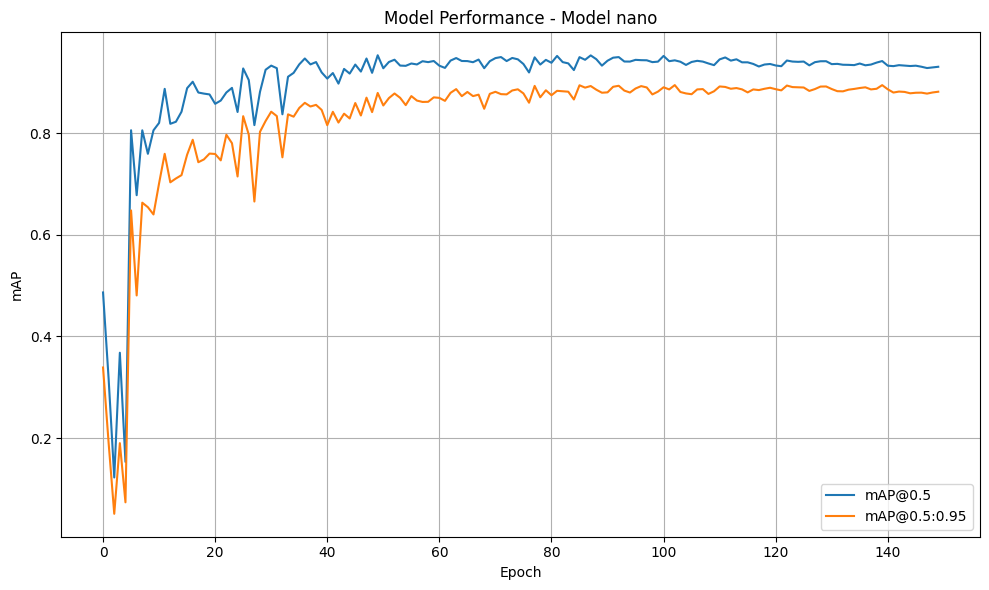

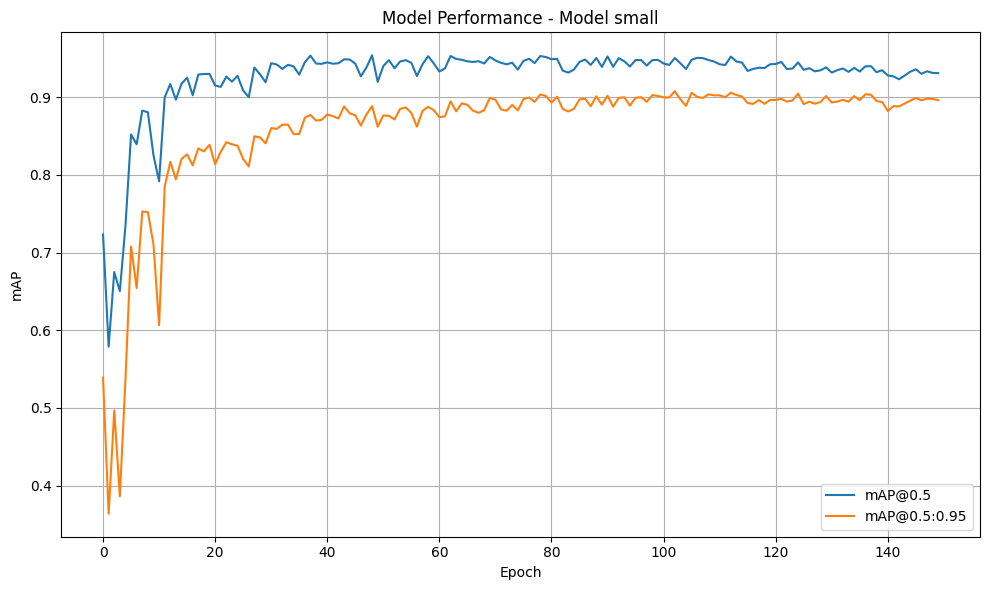

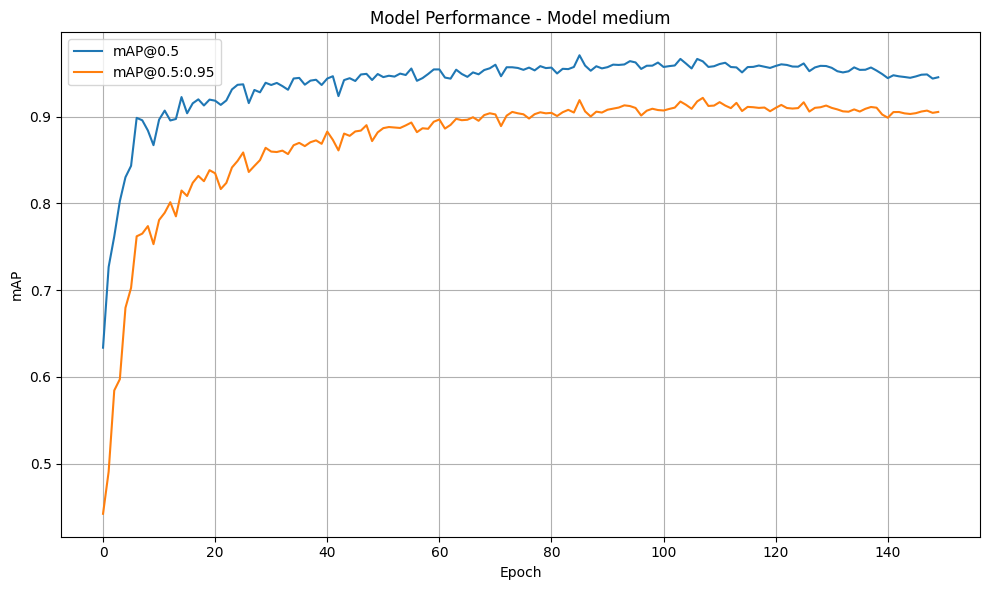

All mAP plots have been generated and saved.


In [ ]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_objectDetection}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_objectDetection}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

## Semi Auto Annotate Mask Daun

In [29]:
splits = ["train","valid",'test']
sam2_model = "sam2.1_b.pt"
project_base_maskDaun = "results/mask_daun"
data_path_maskDaun = "dataset/mask_daun"
best_objectDetection_model_size = "medium"
best_objectDetection_model_path = f"{project_base_objectDetection}/training/{best_objectDetection_model_size}/weights/best.pt"

In [ ]:
# Pindahkan original images ke mask daun
for split in splits:
    shutil.copytree(src=f"{data_path_objectDetection}/{split}/images", dst=f"{data_path_maskDaun}/{split}/images", dirs_exist_ok=True)

shutil.copy(src=f"{data_path_objectDetection}/data.yaml", dst=f"{data_path_maskDaun}/data.yaml")

'dataset/mask_daun/data.yaml'

In [ ]:
for split in splits:
    auto_annotate(data=f"{data_path_maskDaun}/{split}/images/", det_model=best_objectDetection_model_path, sam_model=sam2_model, output_dir=f"{data_path_maskDaun}/{split}/labels/")


image 1/1557 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection/train/images/healthy_train_100_jpg.rf.bdfd5f52dcc990d68b565386b316d332.jpg: 448x640 4 leaf_healthys, 15.1ms
image 2/1557 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection/train/images/healthy_train_101_jpg.rf.2b49bbc7e88b65507a42edc2a191f165.jpg: 448x640 9 leaf_healthys, 12.8ms
image 3/1557 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection/train/images/healthy_train_102_jpg.rf.d8ebf20fa7a1b5cb95ea1dc4007397fc.jpg: 448x640 3 leaf_healthys, 13.0ms
image 4/1557 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection/train/images/healthy_train_103_jpg.rf.fb3756f134d0972adf94ff298075dfa2.jpg: 448x640 3 leaf_healthys, 12.1ms
image 5/1557 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection/train/images/healthy_train_105_jpg.rf.45f3bb8c5b779d2803b4a228684d4c7e.jpg: 448x640 4 leaf_h

## Training Mask Daun

In [ ]:
# Variabel Global
models = ['yolo11n-seg.pt', 'yolo11s-seg.pt', 'yolo11m-seg.pt']
sizes = ['nano', 'small', 'medium']
epochs = 100
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_maskDaun = "dataset/mask_daun"
project_base_maskDaun = "results/mask_daun"

In [5]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    training = model.train(
        data=f"{data_path_maskDaun}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_maskDaun}/training", 
        name=f"{size}",
        exist_ok=True
    )

    csv_filename = f"{project_base_maskDaun}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_maskDaun}/data.yaml", 
        imgsz=640,
        project=f"{project_base_maskDaun}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_maskDaun}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training small model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_daun/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=small, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.14G reserved, 0.12G allocated, 11.74G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    10083449        35.6         0.960         87.67           nan        (1, 3, 640, 640)                    list
    10083449       71.19         1.986         65.56           nan        (2, 3, 640, 640)                    list
    10083449       142.4         3.314         50.32           nan        (4, 3, 640, 640)                    list
    10083449       284.8         6.216         78.47           nan        (8, 3, 640, 640)                    list
    10083449       569.5        11.629         111.5           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 9 for CUDA:0 7.05G/12.00G (59%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 343.6±51.9 MB/s, size: 204.6 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 206.0±116.9 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/mask_daun/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0004921875), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun/training/small
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.97G      0.544     0.9643      1.442      1.041         44        640: 100%|██████████| 173/173 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]

                   all        173        325      0.701       0.86      0.829      0.674      0.701       0.86      0.825      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.28G     0.6208     0.9473      1.101      1.061         38        640: 100%|██████████| 173/173 [00:33<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        173        325      0.641      0.775      0.742      0.567      0.636      0.768      0.729      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.32G     0.6375     0.9555      1.083      1.075         50        640: 100%|██████████| 173/173 [00:32<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]

                   all        173        325      0.765      0.769      0.852      0.704      0.766       0.77      0.853      0.742



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.32G     0.5978     0.9341     0.9763      1.055         37        640: 100%|██████████| 173/173 [00:33<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        173        325      0.758      0.776      0.858      0.714      0.755      0.774      0.852      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.32G     0.5734     0.8693     0.9246      1.038         49        640: 100%|██████████| 173/173 [00:32<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]

                   all        173        325      0.867      0.854      0.913      0.811      0.866      0.852      0.911      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.36G     0.5487     0.7919     0.8749      1.031         37        640: 100%|██████████| 173/173 [00:32<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        173        325      0.747       0.82      0.856      0.761      0.744      0.813      0.849      0.761



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.41G      0.543     0.7871     0.8704       1.02         41        640: 100%|██████████| 173/173 [00:33<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.17it/s]

                   all        173        325      0.831      0.867       0.93      0.824       0.83      0.864      0.924      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.44G     0.5143     0.7382     0.8321      1.012         52        640: 100%|██████████| 173/173 [00:32<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.18it/s]

                   all        173        325      0.825      0.901      0.929      0.834      0.833      0.901      0.927      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.44G     0.4995      0.752     0.8205     0.9999         44        640: 100%|██████████| 173/173 [00:32<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]

                   all        173        325      0.901      0.849      0.928      0.847      0.901      0.849      0.923      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.44G     0.4722     0.6866     0.7828     0.9877         50        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]

                   all        173        325      0.847      0.878      0.923      0.831      0.844      0.877      0.919      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.44G       0.48     0.7075     0.7823     0.9888         38        640: 100%|██████████| 173/173 [00:32<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]

                   all        173        325      0.894      0.862      0.933      0.853      0.893      0.857      0.929      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.44G      0.465     0.6518     0.7507     0.9872         48        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.91it/s]

                   all        173        325      0.865       0.86      0.919      0.839      0.866       0.86      0.919      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.44G     0.4837     0.6658     0.7753     0.9891         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.01it/s]

                   all        173        325      0.889      0.908      0.942      0.867      0.889      0.908      0.941      0.878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.44G      0.452     0.6453     0.7497     0.9784         41        640: 100%|██████████| 173/173 [00:32<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]

                   all        173        325      0.881       0.88      0.932      0.854      0.881      0.878       0.93      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.44G     0.4432     0.6402     0.7244      0.979         28        640: 100%|██████████| 173/173 [00:32<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]

                   all        173        325      0.899      0.882       0.94      0.872      0.899       0.88      0.939      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.44G     0.4373     0.6194     0.7095     0.9667         47        640: 100%|██████████| 173/173 [00:33<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]

                   all        173        325      0.929      0.866      0.951      0.883      0.929      0.866       0.95      0.894



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.44G      0.427      0.637     0.7127     0.9658         39        640: 100%|██████████| 173/173 [00:32<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.01it/s]

                   all        173        325      0.876      0.863      0.929      0.872      0.876      0.863      0.928      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.44G      0.418     0.6027     0.6885     0.9603         48        640: 100%|██████████| 173/173 [00:33<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.05it/s]

                   all        173        325      0.859      0.888      0.925       0.86      0.856      0.884      0.922      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.44G     0.4178      0.594     0.6739     0.9603         51        640: 100%|██████████| 173/173 [00:33<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]

                   all        173        325      0.868      0.901       0.95      0.881      0.864      0.896      0.946      0.891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.44G     0.4094     0.5697     0.6595     0.9571         50        640: 100%|██████████| 173/173 [00:33<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.01it/s]

                   all        173        325      0.861      0.914      0.942      0.875      0.861      0.914       0.94      0.885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.45G     0.4022     0.5687     0.6542     0.9532         33        640: 100%|██████████| 173/173 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.98it/s]

                   all        173        325        0.9      0.855      0.945      0.884        0.9      0.855      0.944      0.888



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.45G     0.4002     0.5333     0.6615     0.9482         33        640: 100%|██████████| 173/173 [00:33<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.96it/s]

                   all        173        325      0.906      0.884      0.944      0.882      0.901      0.878      0.938      0.886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.45G     0.3945      0.543     0.6467     0.9509         35        640: 100%|██████████| 173/173 [00:33<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.96it/s]

                   all        173        325        0.9      0.907      0.961      0.905      0.884      0.926       0.96      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.45G     0.3929     0.5452     0.6428     0.9424         49        640: 100%|██████████| 173/173 [00:32<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]

                   all        173        325      0.929      0.895       0.96      0.901      0.929      0.895      0.959      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.45G     0.3972     0.5241     0.6325     0.9434         57        640: 100%|██████████| 173/173 [00:33<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        173        325      0.894       0.88      0.942      0.894      0.889      0.877      0.939      0.893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.45G     0.3848     0.5449     0.6312     0.9408         44        640: 100%|██████████| 173/173 [00:35<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.28it/s]

                   all        173        325      0.916      0.876      0.954      0.906      0.915      0.874       0.95      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.45G     0.3854     0.5334     0.6315     0.9465         37        640: 100%|██████████| 173/173 [00:35<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]

                   all        173        325      0.901      0.873      0.942      0.885      0.901      0.873      0.941      0.885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.45G     0.3795     0.5296      0.616     0.9421         48        640: 100%|██████████| 173/173 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]

                   all        173        325      0.913      0.884      0.951      0.898      0.913      0.884      0.948      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.45G     0.3684      0.506     0.5931     0.9403         48        640: 100%|██████████| 173/173 [00:32<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        173        325      0.934      0.877      0.961      0.908      0.929      0.871      0.954      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.45G     0.3572     0.4895     0.5885     0.9322         45        640: 100%|██████████| 173/173 [00:33<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        173        325      0.882      0.935      0.963      0.907      0.882      0.932      0.959      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.45G      0.361     0.5022     0.5826     0.9318         41        640: 100%|██████████| 173/173 [00:32<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.11it/s]

                   all        173        325      0.922       0.87      0.953      0.898       0.92      0.869      0.951      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.45G     0.3554     0.5042     0.6084     0.9261         48        640: 100%|██████████| 173/173 [00:33<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.15it/s]

                   all        173        325      0.919      0.915      0.964      0.912      0.919      0.915      0.963      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.45G     0.3565     0.4906     0.5918     0.9228         37        640: 100%|██████████| 173/173 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]

                   all        173        325       0.87      0.912      0.956      0.903      0.868       0.91      0.954      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.45G     0.3512     0.4628     0.5879     0.9311         51        640: 100%|██████████| 173/173 [00:33<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        173        325      0.915      0.903      0.957      0.912      0.914      0.901      0.955      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.45G     0.3539     0.4809     0.5803     0.9293         53        640: 100%|██████████| 173/173 [00:32<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.91it/s]

                   all        173        325      0.886      0.887      0.931      0.883      0.886      0.887      0.928      0.883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.45G     0.3491     0.5017     0.5789      0.928         47        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.26it/s]

                   all        173        325      0.899      0.911       0.96      0.907      0.903      0.907      0.958      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.45G     0.3389     0.4628     0.5477      0.924         26        640: 100%|██████████| 173/173 [00:32<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.36it/s]

                   all        173        325      0.897      0.906      0.961      0.916      0.897      0.906      0.961      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.45G     0.3421     0.4643     0.5568     0.9264         43        640: 100%|██████████| 173/173 [00:32<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]

                   all        173        325      0.925      0.907      0.958      0.913      0.923      0.905      0.956      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.45G      0.343     0.4617     0.5658     0.9243         38        640: 100%|██████████| 173/173 [00:34<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        173        325      0.915      0.911      0.967      0.915      0.913       0.91      0.963      0.917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.45G     0.3354     0.4715     0.5524     0.9222         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        173        325      0.924      0.872      0.956      0.903       0.92      0.869      0.952      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.45G     0.3397     0.4635     0.5462     0.9197         44        640: 100%|██████████| 173/173 [00:34<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        173        325      0.876      0.912      0.961      0.915      0.874       0.91      0.959      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.45G     0.3268     0.4538     0.5382     0.9174         35        640: 100%|██████████| 173/173 [00:33<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.25it/s]

                   all        173        325      0.934      0.886      0.967       0.92      0.932      0.886      0.965      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.45G     0.3192     0.4215     0.5457     0.9128         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        173        325      0.914      0.927      0.969      0.918      0.912      0.926      0.966      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.45G     0.3202     0.4567     0.5277     0.9148         40        640: 100%|██████████| 173/173 [00:33<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]

                   all        173        325      0.887      0.883      0.964      0.914      0.897      0.871      0.961       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.45G     0.3335     0.4509      0.523     0.9191         47        640: 100%|██████████| 173/173 [00:32<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        173        325      0.927      0.913      0.968      0.927      0.927      0.913      0.966      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.45G      0.321     0.4315     0.5162      0.912         52        640: 100%|██████████| 173/173 [00:32<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        173        325      0.938      0.904      0.973      0.932      0.936      0.902       0.97      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.45G     0.3125     0.4006     0.5048       0.91         42        640: 100%|██████████| 173/173 [00:33<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.09it/s]

                   all        173        325      0.939      0.877      0.967      0.924      0.937      0.876      0.965      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.45G     0.3223     0.4144     0.5028     0.9154         51        640: 100%|██████████| 173/173 [00:33<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.11it/s]

                   all        173        325      0.935      0.895      0.963      0.921      0.934      0.893      0.961      0.919



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.45G     0.3168     0.4279     0.5189     0.9127         51        640: 100%|██████████| 173/173 [00:33<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        173        325      0.942      0.898       0.97      0.923       0.94      0.896      0.967      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.45G     0.3123     0.4087     0.5103     0.9085         47        640: 100%|██████████| 173/173 [00:33<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.89it/s]

                   all        173        325      0.902      0.923      0.969      0.929        0.9      0.921      0.967      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.45G     0.3122     0.4059     0.4899     0.9109         46        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.30it/s]

                   all        173        325      0.913      0.901      0.956      0.912      0.913      0.901      0.954      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.45G     0.3077     0.3835     0.5021     0.9103         44        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.11it/s]

                   all        173        325      0.935      0.877      0.964      0.924      0.931      0.874      0.961      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.45G     0.3027     0.4053     0.4808     0.9056         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]

                   all        173        325      0.934      0.883      0.966       0.93      0.932      0.881      0.965      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.45G     0.2984     0.3873      0.487     0.9035         41        640: 100%|██████████| 173/173 [00:33<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.98it/s]

                   all        173        325      0.918      0.912      0.967      0.932      0.918      0.912      0.964      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.45G     0.2968     0.3935     0.4736     0.8963         40        640: 100%|██████████| 173/173 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]

                   all        173        325      0.881      0.925      0.968      0.931      0.879      0.923      0.965      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.45G     0.2901      0.378      0.482     0.9023         45        640: 100%|██████████| 173/173 [00:33<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.24it/s]

                   all        173        325      0.891      0.913      0.965       0.93      0.893      0.915      0.964      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.45G     0.2958     0.3893     0.4779     0.9026         48        640: 100%|██████████| 173/173 [00:32<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]

                   all        173        325      0.889       0.94      0.971      0.932      0.887      0.937      0.968      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.45G     0.2914     0.3802     0.4597     0.9042         33        640: 100%|██████████| 173/173 [00:32<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.21it/s]

                   all        173        325      0.912      0.934      0.968      0.931       0.91      0.931      0.967      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.45G     0.2945     0.3865     0.4702     0.9001         45        640: 100%|██████████| 173/173 [00:34<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.27it/s]

                   all        173        325      0.953      0.899      0.974      0.934      0.953      0.899      0.973      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.45G     0.2944     0.3869     0.4725     0.9026         59        640: 100%|██████████| 173/173 [00:32<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        173        325      0.924      0.918      0.974      0.946      0.921      0.916      0.972      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.45G     0.2799      0.366     0.4534     0.8938         42        640: 100%|██████████| 173/173 [00:33<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        173        325      0.913      0.901       0.97      0.938      0.911      0.899      0.969      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.45G     0.2818     0.3526     0.4553     0.8968         45        640: 100%|██████████| 173/173 [00:34<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.31it/s]

                   all        173        325      0.931       0.89      0.972       0.94      0.931       0.89      0.971      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.45G      0.277     0.3594     0.4588     0.8953         44        640: 100%|██████████| 173/173 [00:33<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.70it/s]

                   all        173        325      0.922      0.929      0.971      0.935       0.92      0.927      0.969      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.45G     0.2849     0.3696      0.457     0.8957         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]

                   all        173        325      0.943       0.87      0.964      0.927      0.941      0.868      0.961      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.45G     0.2726     0.3502     0.4394      0.894         40        640: 100%|██████████| 173/173 [00:33<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]

                   all        173        325      0.932      0.886      0.963      0.927      0.945      0.886      0.963      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.45G     0.2826     0.3686      0.444     0.8935         36        640: 100%|██████████| 173/173 [00:33<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.06it/s]

                   all        173        325      0.941      0.922      0.973      0.941      0.939       0.92      0.971      0.937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.45G     0.2707     0.3543     0.4299     0.8921         33        640: 100%|██████████| 173/173 [00:33<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.98it/s]

                   all        173        325      0.915      0.914      0.967      0.933      0.913      0.912      0.964      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.45G     0.2849     0.3658     0.4433     0.8984         33        640: 100%|██████████| 173/173 [00:33<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        173        325      0.935        0.9      0.972      0.939      0.935      0.903       0.97      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.45G     0.2698     0.3413     0.4255     0.8938         42        640: 100%|██████████| 173/173 [00:33<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.91it/s]

                   all        173        325      0.959       0.89      0.974      0.945      0.963       0.89      0.974      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.45G     0.2661     0.3372      0.408     0.8891         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.50it/s]

                   all        173        325      0.962      0.888      0.974      0.946       0.96      0.886      0.972      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.45G     0.2679     0.3357     0.4143     0.8928         39        640: 100%|██████████| 173/173 [00:33<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.04it/s]

                   all        173        325      0.941      0.922      0.974      0.941       0.94       0.92      0.971      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.45G     0.2605     0.3289     0.4036     0.8807         35        640: 100%|██████████| 173/173 [00:33<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.88it/s]

                   all        173        325      0.953      0.872      0.967      0.937      0.953      0.872      0.965      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.45G     0.2608     0.3229     0.4178     0.8873         50        640: 100%|██████████| 173/173 [00:33<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.30it/s]

                   all        173        325      0.931      0.893      0.971      0.939      0.929      0.892      0.969      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.45G     0.2556     0.3383     0.3945     0.8828         32        640: 100%|██████████| 173/173 [00:33<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]

                   all        173        325       0.94       0.93      0.973      0.942       0.94       0.93      0.971      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.45G     0.2579     0.3263     0.4009     0.8881         43        640: 100%|██████████| 173/173 [00:32<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]

                   all        173        325      0.946      0.893      0.971      0.936      0.944      0.891      0.969      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.45G      0.255      0.326     0.3849     0.8821         25        640: 100%|██████████| 173/173 [00:33<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]

                   all        173        325       0.93      0.896      0.968      0.939       0.93      0.896      0.965      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.45G     0.2551     0.3293     0.4047     0.8876         46        640: 100%|██████████| 173/173 [00:34<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.26it/s]

                   all        173        325      0.939      0.877      0.968      0.934      0.937      0.875      0.966      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.45G     0.2499     0.3235     0.3953      0.882         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.11it/s]

                   all        173        325       0.94      0.923      0.973      0.938      0.938      0.922      0.969      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.45G     0.2546     0.3191     0.3955     0.8874         41        640: 100%|██████████| 173/173 [00:33<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        173        325      0.934      0.922       0.97      0.936      0.927      0.921      0.967      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.45G     0.2515     0.3092      0.394     0.8813         43        640: 100%|██████████| 173/173 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        173        325      0.931      0.939      0.975      0.941      0.929      0.937      0.971      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.45G     0.2467      0.309     0.3823     0.8799         41        640: 100%|██████████| 173/173 [00:33<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.53it/s]

                   all        173        325      0.936      0.902      0.969      0.938      0.936      0.902      0.968       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.45G     0.2471     0.3121     0.3805     0.8759         37        640: 100%|██████████| 173/173 [00:33<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]

                   all        173        325      0.926      0.924      0.971      0.938      0.925      0.922      0.967      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.45G     0.2404     0.3112     0.3731     0.8784         52        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.30it/s]

                   all        173        325      0.923      0.925      0.971      0.944      0.921      0.924      0.967      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.45G     0.2417     0.3149     0.3685     0.8816         37        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.32it/s]

                   all        173        325      0.931      0.896      0.969      0.936      0.903       0.92      0.965      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.45G     0.2392     0.3121      0.368     0.8774         41        640: 100%|██████████| 173/173 [00:33<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.29it/s]

                   all        173        325      0.934        0.9      0.971       0.94      0.934        0.9      0.968      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.45G     0.2412      0.309     0.3639     0.8779         52        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.15it/s]

                   all        173        325      0.935      0.899      0.971      0.944      0.935      0.899      0.969      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.45G     0.2323     0.2916      0.354     0.8775         34        640: 100%|██████████| 173/173 [00:33<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]

                   all        173        325      0.909      0.936       0.97      0.939      0.908      0.934      0.967      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.45G     0.2324     0.2986     0.3548      0.872         40        640: 100%|██████████| 173/173 [00:34<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        173        325      0.927      0.899      0.969      0.938      0.925      0.897      0.966      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.45G     0.2362     0.2989     0.3458     0.8811         50        640: 100%|██████████| 173/173 [00:33<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.24it/s]

                   all        173        325      0.909      0.929      0.972       0.94      0.909      0.929       0.97      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.45G     0.2372     0.2954     0.3458     0.8734         30        640: 100%|██████████| 173/173 [00:33<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

                   all        173        325      0.934      0.931      0.975      0.946      0.932      0.929      0.972      0.936


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.46G     0.1899      0.239     0.2431      0.838         14        640: 100%|██████████| 173/173 [00:33<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]

                   all        173        325      0.903      0.965       0.97      0.941      0.902      0.963      0.966      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.46G     0.1837     0.2229     0.2285     0.8315         11        640: 100%|██████████| 173/173 [00:33<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]

                   all        173        325       0.93      0.923      0.973      0.943      0.928      0.921      0.971      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.46G     0.1805     0.2266     0.2181     0.8377         16        640: 100%|██████████| 173/173 [00:33<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.37it/s]

                   all        173        325      0.907      0.918      0.967      0.935      0.905      0.916      0.966      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.46G     0.1845     0.2262     0.2106     0.8295         15        640: 100%|██████████| 173/173 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.52it/s]

                   all        173        325      0.904      0.944      0.973      0.945      0.916      0.929      0.969      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.46G     0.1752     0.2222     0.2021     0.8228         16        640: 100%|██████████| 173/173 [00:33<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.45it/s]

                   all        173        325      0.919      0.913       0.97      0.944      0.917      0.911      0.969      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.46G     0.1727     0.2063     0.2058     0.8247         12        640: 100%|██████████| 173/173 [00:33<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        173        325      0.931       0.93      0.971      0.944      0.929      0.929       0.97      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.46G     0.1747     0.2167     0.2026     0.8307         18        640: 100%|██████████| 173/173 [00:32<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.94it/s]

                   all        173        325      0.911      0.935      0.973      0.946      0.911      0.935      0.971      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.46G     0.1718     0.2147     0.1954     0.8263         24        640: 100%|██████████| 173/173 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]

                   all        173        325      0.923      0.926      0.971      0.942      0.921      0.924       0.97      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.46G     0.1685     0.2114     0.1951     0.8279         24        640: 100%|██████████| 173/173 [00:33<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.66it/s]

                   all        173        325      0.941      0.924       0.97      0.942      0.939      0.923      0.969      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.46G     0.1645     0.2104     0.1881     0.8251         11        640: 100%|██████████| 173/173 [00:33<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.32it/s]

                   all        173        325       0.93      0.915      0.972      0.944      0.928      0.914       0.97      0.935



100 epochs completed in 0.988 hours.
Optimizer stripped from results/mask_daun/training/small/weights/last.pt, 20.5MB
Optimizer stripped from results/mask_daun/training/small/weights/best.pt, 20.5MB

Validating results/mask_daun/training/small/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


                   all        173        325       0.96       0.89      0.974      0.945      0.963       0.89      0.974      0.939
          leaf_healthy         55        180      0.954      0.811      0.949      0.895      0.959      0.811      0.949      0.872
             leaf_rust         64         79       0.96      0.921      0.985      0.971       0.96      0.919      0.985      0.965
             leaf_scab         57         66      0.966      0.939      0.988      0.969      0.969      0.939      0.988      0.981
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to results/mask_daun/training/small
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 350.0±79.3 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/test/labels.cache... 1737 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:18<00:00, 10.66it/s]


                   all       1739       3196      0.888      0.857      0.941      0.894      0.889      0.857      0.939      0.882
          leaf_healthy        383       1230      0.877      0.826      0.927      0.873      0.882      0.829       0.93      0.844
             leaf_rust        784       1188      0.863      0.862      0.936      0.871      0.864      0.861      0.933      0.872
             leaf_scab        624        778      0.925      0.883       0.96      0.939      0.922      0.881      0.953      0.931
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/mask_daun/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.39G reserved, 0.23G allocated, 10.38G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    22361529       123.6         1.988         78.03           nan        (1, 3, 640, 640)                    list
    22361529       247.2         4.152         76.65           nan        (2, 3, 640, 640)                    list
    22361529       494.4         6.776          87.5           nan        (4, 3, 640, 640)                    list
    22361529       988.7        12.512         126.7           nan        (8, 3, 640, 640)                    list
    22361529        1977        23.188          1308           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 3 for CUDA:0 6.97G/12.00G (58%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3776.

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1560.8±703.7 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/mask_daun/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0004921875), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun/training/medium
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.25G     0.6342      1.083      1.567      1.124         13        640: 100%|██████████| 519/519 [01:26<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.66it/s]

                   all        173        325      0.694      0.659      0.716      0.533      0.672      0.669       0.71      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.48G     0.7573       1.22      1.333      1.176         13        640: 100%|██████████| 519/519 [01:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]

                   all        173        325      0.614      0.687      0.698      0.563      0.603      0.704      0.708       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.48G      0.768      1.222      1.281       1.19         13        640: 100%|██████████| 519/519 [01:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.79it/s]

                   all        173        325      0.729      0.788      0.841      0.702      0.728      0.789       0.84      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.55G     0.7175      1.091      1.192      1.149         15        640: 100%|██████████| 519/519 [01:22<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.73it/s]

                   all        173        325      0.809      0.686      0.801      0.686      0.814       0.69      0.803      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.62G     0.6481      1.052      1.134      1.108         11        640: 100%|██████████| 519/519 [01:21<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.40it/s]

                   all        173        325      0.847        0.8      0.867      0.761      0.846      0.806      0.872      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.62G     0.6247      1.001      1.055      1.095          7        640: 100%|██████████| 519/519 [01:19<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.86it/s]

                   all        173        325       0.79      0.782      0.873      0.772        0.8      0.772      0.877      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.62G     0.5852     0.9344      1.039      1.074         18        640: 100%|██████████| 519/519 [01:19<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.43it/s]

                   all        173        325      0.863      0.784      0.886      0.798      0.861      0.783      0.883      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.62G     0.5839     0.9089      1.032      1.077         14        640: 100%|██████████| 519/519 [01:21<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.70it/s]

                   all        173        325      0.834      0.824      0.893      0.801      0.834      0.824      0.892      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.63G     0.5659     0.9043     0.9672      1.064         12        640: 100%|██████████| 519/519 [01:21<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.50it/s]

                   all        173        325      0.827      0.849      0.889      0.811      0.827      0.849      0.889      0.818



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.63G     0.5253     0.8213     0.9432      1.039         21        640: 100%|██████████| 519/519 [01:20<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.64it/s]

                   all        173        325      0.794      0.827      0.876      0.799      0.793      0.825      0.873      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.63G     0.5271     0.7984     0.9298      1.039         22        640: 100%|██████████| 519/519 [01:21<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.59it/s]

                   all        173        325      0.873      0.828      0.898       0.82      0.871      0.826      0.896      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.73G     0.5033     0.7672     0.8872      1.027         18        640: 100%|██████████| 519/519 [01:21<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.21it/s]

                   all        173        325       0.87      0.832      0.904      0.827      0.866      0.828      0.899       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.73G     0.4884     0.7745     0.8795      1.022         23        640: 100%|██████████| 519/519 [01:21<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.49it/s]


                   all        173        325      0.863      0.849      0.914      0.847      0.863      0.849      0.912      0.854

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.73G     0.4712     0.7047     0.8389      1.013         16        640: 100%|██████████| 519/519 [01:20<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.17it/s]

                   all        173        325      0.898      0.859      0.937      0.865      0.894      0.856      0.932      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.73G     0.4702     0.7069     0.8598      1.004         17        640: 100%|██████████| 519/519 [01:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.12it/s]

                   all        173        325      0.835      0.883      0.928      0.862      0.834      0.883      0.926       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.73G     0.4658     0.7174     0.8722      1.002         27        640: 100%|██████████| 519/519 [01:20<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.76it/s]

                   all        173        325      0.855      0.858      0.917      0.859      0.851      0.856      0.913      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.73G     0.4707     0.6728     0.8403      1.012         10        640: 100%|██████████| 519/519 [01:20<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.95it/s]

                   all        173        325      0.884      0.832      0.914      0.848      0.888      0.824      0.911      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.73G     0.4441     0.7051     0.7877      1.002         11        640: 100%|██████████| 519/519 [01:22<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.14it/s]

                   all        173        325      0.846      0.875      0.933      0.876      0.847      0.866      0.928      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.73G     0.4445     0.6985     0.7939     0.9977         18        640: 100%|██████████| 519/519 [01:20<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.74it/s]

                   all        173        325      0.887      0.872       0.94      0.875      0.885       0.87      0.936      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.73G     0.4401     0.6439       0.77     0.9958         33        640: 100%|██████████| 519/519 [01:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.93it/s]

                   all        173        325       0.88      0.871       0.94      0.879       0.88      0.871      0.938      0.883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.73G     0.4203     0.6397     0.7636     0.9829         20        640: 100%|██████████| 519/519 [01:20<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.81it/s]

                   all        173        325      0.851        0.9      0.945      0.879      0.853      0.901      0.943      0.889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.73G      0.406     0.5654     0.7583     0.9733         11        640: 100%|██████████| 519/519 [01:20<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.68it/s]

                   all        173        325      0.873      0.891      0.943      0.879      0.877      0.887      0.941       0.89



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.73G     0.4068      0.613     0.7365     0.9731         12        640: 100%|██████████| 519/519 [01:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.46it/s]

                   all        173        325        0.9      0.908       0.95      0.901      0.898      0.906      0.948      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.73G     0.4115     0.5835     0.7355     0.9753         26        640: 100%|██████████| 519/519 [01:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.17it/s]

                   all        173        325      0.893      0.893      0.949      0.888      0.893      0.893      0.948      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.73G     0.4038      0.595     0.7303     0.9767         15        640: 100%|██████████| 519/519 [01:20<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.67it/s]

                   all        173        325      0.918      0.894      0.958      0.904      0.917      0.888      0.955       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.73G     0.3903     0.5715     0.6986      0.968          8        640: 100%|██████████| 519/519 [01:20<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.94it/s]

                   all        173        325      0.893      0.902      0.948      0.898       0.89      0.895      0.946      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.73G     0.4012     0.5757     0.7087      0.976         10        640: 100%|██████████| 519/519 [01:21<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.73it/s]

                   all        173        325      0.921      0.873       0.95      0.901      0.917      0.869      0.947      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.73G     0.3946     0.5952     0.6926     0.9712         14        640: 100%|██████████| 519/519 [01:21<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:01<00:00, 15.46it/s]

                   all        173        325      0.902      0.876      0.948      0.893        0.9      0.876      0.946      0.886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.73G     0.3858     0.5543     0.6872     0.9639         17        640: 100%|██████████| 519/519 [01:20<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.95it/s]

                   all        173        325      0.917      0.852      0.948      0.899      0.915      0.851      0.945      0.893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.73G      0.391     0.5676     0.7237     0.9717         18        640: 100%|██████████| 519/519 [01:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.92it/s]

                   all        173        325       0.84      0.881      0.936      0.891       0.84      0.881      0.934      0.884



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.73G     0.3793     0.5505     0.7131     0.9596         18        640: 100%|██████████| 519/519 [01:19<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.28it/s]

                   all        173        325      0.899      0.875      0.951        0.9      0.899      0.875       0.95      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.73G     0.3722     0.5157     0.6702     0.9552         18        640: 100%|██████████| 519/519 [01:21<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.53it/s]

                   all        173        325      0.923      0.864      0.958      0.907      0.919      0.861      0.955      0.912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.73G     0.3762     0.5157     0.6595     0.9548          7        640: 100%|██████████| 519/519 [01:19<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.79it/s]

                   all        173        325      0.918      0.872      0.953      0.907      0.929       0.87      0.951      0.907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.73G      0.367     0.5159     0.6734     0.9604         19        640: 100%|██████████| 519/519 [01:20<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.67it/s]

                   all        173        325      0.897      0.884      0.955      0.903      0.896      0.884      0.954      0.907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.73G     0.3658     0.4944     0.6438     0.9549         35        640: 100%|██████████| 519/519 [01:21<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 13.54it/s]

                   all        173        325      0.907      0.871      0.941      0.895      0.905       0.87      0.939      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.73G     0.3509     0.4809     0.6261      0.949         21        640: 100%|██████████| 519/519 [01:21<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]

                   all        173        325      0.908      0.863       0.94      0.894      0.909      0.863      0.939      0.893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.73G     0.3556     0.4885     0.6312     0.9503         15        640: 100%|██████████| 519/519 [01:19<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.34it/s]

                   all        173        325      0.922      0.874      0.953      0.908       0.92      0.872      0.949      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.73G     0.3458     0.4851     0.6407     0.9464         12        640: 100%|██████████| 519/519 [01:20<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.36it/s]

                   all        173        325      0.861      0.921      0.954      0.913       0.86      0.919      0.953      0.917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.73G     0.3525     0.5064     0.6292     0.9515          8        640: 100%|██████████| 519/519 [01:21<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.35it/s]

                   all        173        325      0.909      0.903      0.956      0.916      0.907      0.902      0.954       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.73G      0.336      0.478     0.6099      0.941         13        640: 100%|██████████| 519/519 [01:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.91it/s]

                   all        173        325      0.907      0.889      0.952       0.91      0.905      0.887      0.948      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.73G     0.3403     0.4801     0.5999     0.9413         13        640: 100%|██████████| 519/519 [01:18<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.52it/s]

                   all        173        325      0.845      0.913       0.95      0.912      0.901      0.859      0.947       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.73G     0.3385     0.4664     0.6004     0.9427         12        640: 100%|██████████| 519/519 [01:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.29it/s]

                   all        173        325      0.921      0.891       0.96      0.928      0.919      0.889      0.957      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.75G      0.337     0.4706     0.6055     0.9378         11        640: 100%|██████████| 519/519 [01:21<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.36it/s]

                   all        173        325      0.868       0.94      0.954      0.909      0.866      0.939      0.954      0.905



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.75G     0.3336     0.4597     0.6087     0.9377         13        640: 100%|██████████| 519/519 [01:20<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.69it/s]

                   all        173        325      0.943      0.903      0.966      0.929      0.941      0.901      0.965      0.924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.75G     0.3374     0.4744      0.603     0.9372         13        640: 100%|██████████| 519/519 [01:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.70it/s]

                   all        173        325      0.922      0.919      0.966      0.926      0.918      0.917      0.964      0.919



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.75G     0.3231     0.4542     0.5838      0.929          8        640: 100%|██████████| 519/519 [01:21<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.05it/s]

                   all        173        325       0.91      0.907      0.966      0.925      0.908      0.906      0.964       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.75G     0.3212     0.4398     0.5907      0.933         18        640: 100%|██████████| 519/519 [01:20<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.04it/s]

                   all        173        325      0.931      0.882      0.966      0.926      0.931      0.882      0.965      0.924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.75G     0.3195     0.4603     0.5635     0.9331         17        640: 100%|██████████| 519/519 [01:19<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.04it/s]

                   all        173        325      0.937      0.877      0.965      0.925      0.935      0.876      0.961      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.75G     0.3251       0.43     0.5769     0.9375         16        640: 100%|██████████| 519/519 [01:22<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 14.19it/s]

                   all        173        325      0.937      0.889      0.965      0.918      0.933      0.885      0.962       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.75G     0.3199     0.4425     0.5693     0.9301         17        640: 100%|██████████| 519/519 [01:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.85it/s]

                   all        173        325      0.912       0.91      0.965      0.928      0.908      0.906      0.961       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.75G     0.3139     0.4269     0.5612     0.9309         17        640: 100%|██████████| 519/519 [01:20<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.61it/s]

                   all        173        325      0.949      0.897      0.974      0.933      0.946      0.895      0.972      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.75G     0.3117     0.4314     0.5493     0.9228         19        640: 100%|██████████| 519/519 [01:19<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.81it/s]

                   all        173        325      0.892      0.935      0.968      0.932      0.903      0.927      0.967      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.75G     0.3072     0.4339     0.5524      0.927         14        640: 100%|██████████| 519/519 [01:21<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:01<00:00, 14.84it/s]

                   all        173        325      0.924      0.913      0.962      0.925      0.922      0.911      0.958      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.75G     0.3063     0.4167     0.5521     0.9255          6        640: 100%|██████████| 519/519 [01:22<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.37it/s]

                   all        173        325       0.89      0.906      0.956      0.918      0.888      0.904      0.952      0.907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.75G     0.3076     0.4017      0.559       0.92         15        640: 100%|██████████| 519/519 [01:19<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.69it/s]

                   all        173        325      0.929      0.924      0.973      0.932      0.926       0.92      0.968      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.75G     0.2992     0.4081     0.5344     0.9222         16        640: 100%|██████████| 519/519 [01:17<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.49it/s]

                   all        173        325       0.91      0.947      0.972      0.937      0.908      0.946       0.97      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.75G     0.3034     0.3953     0.5498     0.9234         13        640: 100%|██████████| 519/519 [01:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.72it/s]

                   all        173        325      0.895      0.927      0.963      0.923      0.893      0.925       0.96       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.75G     0.2974     0.3938     0.5235     0.9203         15        640: 100%|██████████| 519/519 [01:19<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.42it/s]

                   all        173        325      0.931      0.884      0.961      0.923       0.93      0.882       0.96       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.75G      0.292     0.3941      0.519     0.9172          9        640: 100%|██████████| 519/519 [01:19<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.17it/s]

                   all        173        325       0.88      0.908      0.958       0.92      0.876      0.905      0.954      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.75G     0.2879     0.3835     0.5183     0.9169         13        640: 100%|██████████| 519/519 [01:16<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.32it/s]

                   all        173        325      0.915      0.923       0.97      0.939      0.913      0.921      0.968      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.75G     0.2892     0.3722     0.5084     0.9158         11        640: 100%|██████████| 519/519 [01:19<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.73it/s]

                   all        173        325      0.949      0.911      0.972      0.936      0.949      0.911      0.971       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.75G     0.2862     0.3896     0.5334     0.9187         13        640: 100%|██████████| 519/519 [01:18<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.55it/s]

                   all        173        325      0.918      0.891      0.962      0.924      0.918      0.891      0.959      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.75G      0.291     0.3762      0.507     0.9144          8        640: 100%|██████████| 519/519 [01:18<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.19it/s]

                   all        173        325      0.931      0.911      0.967      0.928      0.935      0.899      0.964       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.75G     0.2844     0.4071     0.5154     0.9168         14        640: 100%|██████████| 519/519 [01:19<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.35it/s]

                   all        173        325      0.894      0.925      0.967      0.932      0.892      0.923      0.965      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.75G     0.2725     0.3989     0.5143     0.9004          8        640: 100%|██████████| 519/519 [01:19<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.62it/s]

                   all        173        325      0.928      0.889      0.964      0.933      0.928      0.889      0.961      0.924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.75G      0.289     0.3662     0.4949     0.9187         12        640: 100%|██████████| 519/519 [01:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.23it/s]

                   all        173        325      0.907       0.92      0.968      0.933      0.905      0.918      0.965      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.75G     0.2692     0.3412     0.4953     0.9085          7        640: 100%|██████████| 519/519 [01:19<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.66it/s]

                   all        173        325      0.927      0.923      0.974      0.936      0.923      0.919       0.97      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.75G      0.269     0.3588     0.4861     0.9065         12        640: 100%|██████████| 519/519 [01:18<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.97it/s]

                   all        173        325      0.875      0.926      0.969      0.933      0.873      0.924      0.966       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.75G     0.2716     0.3782     0.5039     0.9104         19        640: 100%|██████████| 519/519 [01:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.59it/s]

                   all        173        325      0.938      0.919      0.972      0.941      0.936      0.917      0.969      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.75G     0.2656     0.3648     0.4738     0.9012         24        640: 100%|██████████| 519/519 [01:20<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:01<00:00, 18.88it/s]

                   all        173        325      0.895      0.915      0.964      0.925      0.893      0.914      0.962      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.75G     0.2728     0.3728     0.4954     0.9054          9        640: 100%|██████████| 519/519 [01:20<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.46it/s]

                   all        173        325      0.926        0.9      0.963      0.932      0.924      0.898      0.959      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.75G     0.2641     0.3633     0.4677     0.9035         15        640: 100%|██████████| 519/519 [01:18<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.98it/s]

                   all        173        325      0.906       0.92      0.968       0.93      0.906       0.92      0.964      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.75G     0.2657     0.3521      0.477     0.9042         21        640: 100%|██████████| 519/519 [01:17<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.27it/s]

                   all        173        325      0.949      0.874      0.968      0.931      0.947      0.872      0.964      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.75G     0.2576     0.3524     0.4665     0.8994         15        640: 100%|██████████| 519/519 [01:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.35it/s]

                   all        173        325      0.945      0.915      0.972       0.94      0.943      0.913      0.968      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.75G     0.2545     0.3286     0.4487     0.8969         13        640: 100%|██████████| 519/519 [01:18<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.87it/s]

                   all        173        325      0.948      0.878      0.969      0.937      0.947      0.876      0.963      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.75G     0.2533     0.3251     0.4507     0.9026         22        640: 100%|██████████| 519/519 [01:18<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.09it/s]

                   all        173        325      0.927      0.883      0.965      0.929      0.925      0.881      0.961      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.75G     0.2601     0.3492       0.45     0.9041         11        640: 100%|██████████| 519/519 [01:21<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.87it/s]

                   all        173        325      0.924      0.913      0.971       0.94      0.922      0.912      0.967      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.75G     0.2509     0.3418     0.4334     0.8978          9        640: 100%|██████████| 519/519 [01:19<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.58it/s]

                   all        173        325       0.93      0.912      0.972      0.939      0.929       0.91      0.969      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.75G     0.2474      0.358     0.4357        0.9         22        640: 100%|██████████| 519/519 [01:17<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.92it/s]

                   all        173        325      0.932      0.901      0.968      0.935      0.929      0.899      0.965       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.75G      0.246     0.3281     0.4312     0.8966         12        640: 100%|██████████| 519/519 [01:20<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:01<00:00, 18.88it/s]

                   all        173        325      0.936      0.901      0.971      0.941      0.936      0.901      0.969      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.75G     0.2549     0.3341     0.4357     0.9026         15        640: 100%|██████████| 519/519 [01:21<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.56it/s]

                   all        173        325      0.923      0.932      0.977      0.944      0.925      0.926      0.975      0.937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.75G      0.245     0.3264     0.4299      0.894         17        640: 100%|██████████| 519/519 [01:18<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.10it/s]

                   all        173        325      0.893      0.941      0.973      0.938      0.893      0.941      0.971      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.75G     0.2388      0.316     0.4203     0.8879         21        640: 100%|██████████| 519/519 [01:18<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.44it/s]

                   all        173        325      0.917      0.917      0.972       0.94      0.917      0.917      0.971      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.75G     0.2408     0.3274     0.4336      0.894         18        640: 100%|██████████| 519/519 [01:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.16it/s]

                   all        173        325      0.911      0.923      0.968      0.936      0.909      0.921      0.965      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.75G     0.2372     0.2937     0.4193      0.889          9        640: 100%|██████████| 519/519 [01:19<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.15it/s]

                   all        173        325      0.916      0.913      0.971      0.938      0.915      0.912      0.968      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.75G     0.2362     0.3044     0.4137     0.8922         14        640: 100%|██████████| 519/519 [01:19<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.05it/s]

                   all        173        325      0.919      0.947      0.975      0.943      0.916      0.943      0.972      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.75G       0.23      0.291     0.3964     0.8892          8        640: 100%|██████████| 519/519 [01:20<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:01<00:00, 20.47it/s]

                   all        173        325      0.904      0.937      0.971      0.938      0.903      0.936      0.967      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.75G     0.2311     0.3114     0.4018     0.8859         11        640: 100%|██████████| 519/519 [01:19<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.04it/s]

                   all        173        325       0.91      0.927      0.972      0.937      0.909      0.926      0.969      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.75G     0.2298     0.3015     0.4059     0.8934         21        640: 100%|██████████| 519/519 [01:19<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.65it/s]

                   all        173        325      0.922      0.894      0.972       0.94      0.922      0.891      0.969      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.75G     0.2309     0.2944      0.382     0.8878         10        640: 100%|██████████| 519/519 [01:17<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.72it/s]

                   all        173        325      0.902      0.938      0.974      0.943      0.898      0.933      0.972      0.936


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.75G     0.1718     0.2307     0.2427     0.8399          7        640: 100%|██████████| 519/519 [01:16<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.57it/s]

                   all        173        325      0.896      0.943      0.972      0.939      0.892      0.939      0.968      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.75G     0.1707     0.2203     0.2223     0.8399          4        640: 100%|██████████| 519/519 [01:21<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:01<00:00, 18.60it/s]

                   all        173        325      0.925       0.92      0.974      0.939      0.924      0.917       0.97      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.75G     0.1666     0.2078     0.2172     0.8388          9        640: 100%|██████████| 519/519 [01:19<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.18it/s]

                   all        173        325      0.913      0.938      0.972      0.943      0.911      0.936       0.97      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.75G     0.1624     0.2082     0.2102     0.8297          7        640: 100%|██████████| 519/519 [01:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.66it/s]

                   all        173        325      0.948      0.898      0.972      0.945      0.946      0.896       0.97      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.75G     0.1605     0.2016     0.2029     0.8341          5        640: 100%|██████████| 519/519 [01:18<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.61it/s]

                   all        173        325      0.923      0.928      0.975      0.947       0.92      0.926      0.973       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.75G     0.1586     0.2003     0.2053     0.8351          3        640: 100%|██████████| 519/519 [01:18<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00,  9.86it/s]

                   all        173        325      0.925      0.925      0.975      0.946      0.923      0.923      0.973      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.75G     0.1531     0.1967     0.2032     0.8302          7        640: 100%|██████████| 519/519 [01:16<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.49it/s]

                   all        173        325      0.907       0.93      0.973      0.946      0.898      0.935       0.97      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.75G     0.1528     0.1991     0.1942     0.8267          5        640: 100%|██████████| 519/519 [01:18<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.28it/s]

                   all        173        325      0.925      0.913      0.974      0.944      0.927      0.909      0.971      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.75G     0.1494     0.2003     0.1952     0.8262         13        640: 100%|██████████| 519/519 [01:18<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.58it/s]

                   all        173        325      0.944      0.913      0.975      0.947      0.943      0.911      0.973       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.75G     0.1536     0.1881     0.1937     0.8309          4        640: 100%|██████████| 519/519 [01:18<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.66it/s]

                   all        173        325      0.922      0.934      0.976      0.948      0.918      0.931      0.974      0.942



100 epochs completed in 2.332 hours.
Optimizer stripped from results/mask_daun/training/medium/weights/last.pt, 45.1MB
Optimizer stripped from results/mask_daun/training/medium/weights/best.pt, 45.1MB

Validating results/mask_daun/training/medium/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m-seg summary (fused): 138 layers, 22,337,625 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.30it/s]


                   all        173        325      0.924      0.933      0.976      0.948      0.924      0.927      0.974      0.942
          leaf_healthy         55        180      0.881      0.911      0.958      0.899       0.88      0.898      0.951      0.884
             leaf_rust         64         79      0.938      0.954      0.985      0.976      0.938      0.952      0.985      0.964
             leaf_scab         57         66      0.954      0.934      0.985      0.968      0.953      0.931      0.985      0.978
Speed: 0.2ms preprocess, 8.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to results/mask_daun/training/medium
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m-seg summary (fused): 138 layers, 22,337,625 parameters, 0 gradients, 123.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4637.3±2162.3 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/test/labels.cache... 1737 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 580/580 [00:33<00:00, 17.15it/s]


                   all       1739       3196      0.895      0.843       0.94      0.901      0.903      0.832      0.937      0.887
          leaf_healthy        383       1230      0.859      0.842      0.925      0.875      0.874      0.832      0.927      0.849
             leaf_rust        784       1188      0.914      0.808      0.934      0.887      0.924      0.798      0.933      0.882
             leaf_scab        624        778       0.91      0.879      0.963      0.942      0.912      0.866      0.952      0.931
Speed: 0.3ms preprocess, 14.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to results/mask_daun/validation/medium
Finished training and validating medium model.


In [ ]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/mask_daun/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/mask_daun/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_maskDaun}/test/images", 
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/test/images/healthy_test_100_jpg.rf.c5341eb7ffccbd563a1c86c30173c3b5.jpg: 448x640 2 leaf_healthys, 1 leaf_rust, 1 leaf_scab, 34.7ms
image 2/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/test/images/healthy_test_101_jpg.rf.30b021ed2cccf999aa7a0192899f556d.jpg: 448x640 3 leaf_healthys, 8.4ms
image 3/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/test/images/healthy_test_102_jpg.rf.9eae658eafc53bdcc7a178798b9a77fa.jpg: 448x640 2 leaf_healthys, 8.3ms
image 4/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/test/images/healthy_test_103_jpg.rf.938229767f64838575711524f79dfb2f.jpg: 448x640 5 leaf_healthys, 8.7ms
image 5/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_daun/test/images/healthy_test_104_jpg.rf.538d1fbaa1fe98a9ae64b6a51c54ca83.jpg: 4

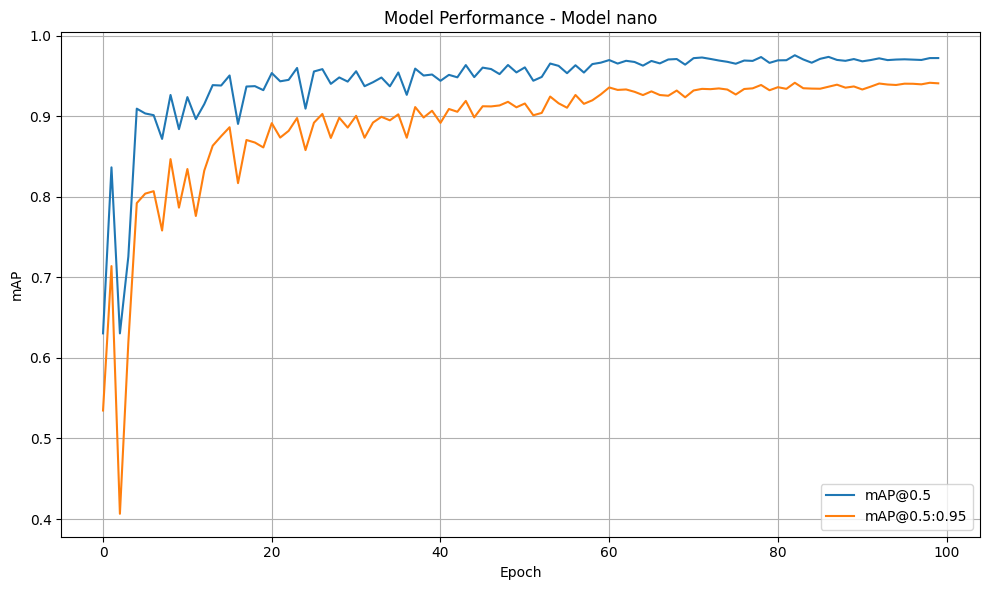

In [12]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_maskDaun}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_maskDaun}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

## Training Mask Lesi

In [8]:
# Variabel Global
models = ['yolo11n-seg.pt', 'yolo11s-seg.pt', 'yolo11m-seg.pt']
sizes = ['nano', 'small', 'medium']
epochs = 150
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_maskLesi = "dataset/mask_lesi"
project_base_maskLesi = "results/mask_lesi"

In [9]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    training = model.train(
        data=f"{data_path_maskLesi}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_maskLesi}/training", 
        name=f"{size}",
        exist_ok=True
    )

    csv_filename = f"{project_base_maskLesi}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_maskLesi}/data.yaml", 
        imgsz=640,
        project=f"{project_base_maskLesi}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_maskLesi}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.68G reserved, 0.11G allocated, 10.21G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     2842998       10.36         0.617         23.91           nan        (1, 3, 640, 640)                    list
     2842998       20.71         1.116            52           nan        (2, 3, 640, 640)                    list
     2842998       41.43         1.919         45.43           nan        (4, 3, 640, 640)                    list
     2842998       82.85         3.485         57.38           nan        (8, 3, 640, 640)                    list
     2842998       165.7         6.552         72.55           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 14 for CUDA:0 7.58G/12.00G (63%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3108.6±677.2 MB/s, size: 160.2 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1555.2±1023.3 MB/s, size: 227.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_lesi/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.000546875), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi/training/nano
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.52G      1.315      1.915      4.252     0.9236         26        640: 100%|██████████| 6/6 [00:00<00:00, -41.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         75        460   0.000186     0.0517   0.000114   8.13e-05   0.000248      0.069   0.000164   0.000101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.64G      1.356      1.587       3.96     0.8795         49        640: 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75        460    0.00845      0.269    0.00556    0.00334     0.0155      0.455     0.0347     0.0178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.66G      1.393      1.522      3.067     0.8412         74        640: 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]


                   all         75        460     0.0117      0.428      0.011    0.00558     0.0152      0.569     0.0386     0.0197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.68G      1.333      1.337      2.412     0.8385         34        640: 100%|██████████| 6/6 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]


                   all         75        460    0.00612      0.274    0.00574    0.00257     0.0137      0.572      0.055       0.03

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.69G      1.305       1.33      1.991     0.8479         70        640: 100%|██████████| 6/6 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]


                   all         75        460    0.00615      0.266    0.00406    0.00233     0.0115      0.489     0.0222      0.012

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.71G      1.307      1.174       1.77     0.8455         71        640: 100%|██████████| 6/6 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all         75        460    0.00844      0.356     0.0112    0.00702      0.011      0.473     0.0141     0.0102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.71G      1.272      1.245      1.609     0.8504         61        640: 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         75        460     0.0104      0.388     0.0107    0.00699     0.0112      0.462     0.0113    0.00764



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.71G      1.163      1.192      1.801      0.858         31        640: 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]


                   all         75        460      0.007      0.243    0.00728    0.00518    0.00954       0.36    0.00968    0.00628

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.71G      1.117      1.113      1.493     0.8592         45        640: 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         75        460    0.00281     0.0771    0.00867    0.00688    0.00627      0.269     0.0143    0.00931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.71G      1.241      1.321      1.652     0.8635         39        640: 100%|██████████| 6/6 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]


                   all         75        460    0.00479      0.129      0.042     0.0298    0.00798      0.312     0.0511     0.0347

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.71G      1.219      1.163      1.603     0.8559         28        640: 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]


                   all         75        460    0.00669      0.182      0.069     0.0431    0.00936      0.351     0.0729     0.0411

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.73G      1.121      1.152      1.384     0.8433         23        640: 100%|██████████| 6/6 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


                   all         75        460    0.00834      0.234        0.1     0.0658     0.0105      0.373      0.102     0.0656

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.74G      1.174      1.247      1.428     0.8542         30        640: 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


                   all         75        460      0.217     0.0258     0.0788     0.0527      0.217     0.0258     0.0806     0.0562

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.76G      1.126      1.159      1.428     0.8606         38        640: 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         75        460      0.168     0.0621     0.0782     0.0534      0.164     0.0684     0.0812     0.0534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.76G      1.179      1.163       1.41     0.8524         24        640: 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all         75        460     0.0414      0.049     0.0329     0.0196     0.0414      0.049     0.0334     0.0181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.76G      1.141      1.102      1.233     0.8577         29        640: 100%|██████████| 6/6 [00:00<00:00, -8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all         75        460      0.093     0.0896     0.0498     0.0298     0.0943     0.0908     0.0491     0.0247

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.76G      1.192      1.264      1.346     0.8436         50        640: 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75        460      0.453      0.205      0.257      0.149      0.422      0.209      0.251      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.76G      1.159      1.202      1.394     0.8673         66        640: 100%|██████████| 6/6 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]


                   all         75        460      0.987     0.0457      0.277      0.175      0.987     0.0457      0.279      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.76G      1.091      1.102      1.146     0.8453         76        640: 100%|██████████| 6/6 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


                   all         75        460      0.938     0.0962      0.279      0.178      0.932      0.095      0.271      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.76G      1.105      1.223      1.124     0.8331         31        640: 100%|██████████| 6/6 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]


                   all         75        460      0.939      0.153      0.331      0.213      0.939      0.153      0.335      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.76G      1.159      1.157       1.12      0.844         92        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         75        460      0.955      0.194      0.386      0.243      0.955      0.194      0.371      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.76G      1.196      1.237      1.151     0.8634         74        640: 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]


                   all         75        460      0.435       0.29       0.43      0.266      0.413      0.275      0.383      0.197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.76G      1.117      1.143      1.083     0.8589         38        640: 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         75        460       0.93      0.311      0.447      0.276      0.909      0.296      0.406       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.76G      1.112      1.158      1.079      0.835         62        640: 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         75        460      0.903      0.275      0.428      0.264      0.885       0.26      0.375      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.76G      1.188      1.165      1.133     0.8531         50        640: 100%|██████████| 6/6 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]


                   all         75        460      0.645      0.292      0.448      0.266      0.618      0.266      0.371      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.76G      1.102       1.03      1.119      0.861         45        640: 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]


                   all         75        460      0.761      0.412      0.553      0.347      0.732      0.383       0.51      0.259

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.76G      1.146       1.16       1.06     0.8416         55        640: 100%|██████████| 6/6 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         75        460      0.829      0.506       0.66      0.435      0.785      0.461      0.596      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.76G      1.158      1.004      1.097      0.837         53        640: 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         75        460      0.848        0.5      0.635      0.408      0.787      0.441      0.545      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.76G      1.041     0.9963      1.071     0.8454         35        640: 100%|██████████| 6/6 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all         75        460      0.772      0.537      0.664       0.43      0.724       0.49      0.599      0.315

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.76G      1.166      1.098      1.028     0.8412         98        640: 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]


                   all         75        460      0.748       0.58      0.691      0.455       0.73       0.54      0.643      0.335

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.76G      1.082      1.043     0.9976     0.8462         58        640: 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         75        460      0.735      0.657      0.732      0.484      0.674      0.583      0.655      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.76G      1.139      1.037      1.115     0.8391         21        640: 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


                   all         75        460      0.608      0.755      0.743      0.492      0.567      0.701      0.662       0.32

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.76G       1.12      1.117      1.045      0.846         73        640: 100%|██████████| 6/6 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         75        460       0.79      0.674      0.756      0.487      0.692      0.578      0.636      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.76G      1.037     0.9577     0.9375     0.8434         42        640: 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all         75        460      0.801      0.634      0.745      0.487      0.791      0.531      0.649      0.308

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.76G      1.012      1.024     0.9435     0.8403         58        640: 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         75        460      0.754       0.65      0.741      0.486      0.697      0.578      0.646      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.76G      1.079      1.043     0.9182     0.8419         54        640: 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         75        460      0.804      0.674      0.748      0.485      0.736      0.575      0.643      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.76G      1.058       1.17      0.882     0.8363         67        640: 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]


                   all         75        460      0.733      0.685      0.768      0.488      0.878      0.558       0.68       0.34

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.76G      1.003     0.9904     0.8564     0.8249         59        640: 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]


                   all         75        460      0.714      0.746      0.771      0.508      0.835      0.595      0.709      0.349

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.76G      1.059       1.09     0.8648     0.8233         59        640: 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         75        460      0.723      0.739      0.775      0.505      0.649      0.662      0.671      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.76G     0.9803     0.9839     0.9529     0.8436         37        640: 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75        460      0.703       0.76      0.768       0.48      0.591      0.643      0.602      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.76G      1.061      1.084     0.9312     0.8323         66        640: 100%|██████████| 6/6 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]


                   all         75        460       0.75      0.737      0.774      0.507      0.648      0.677      0.643      0.287

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.76G     0.9581       1.03     0.8749      0.841         49        640: 100%|██████████| 6/6 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all         75        460      0.814       0.79      0.822      0.566      0.783      0.759      0.793      0.431

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.76G     0.9326     0.8873     0.8709     0.8259         53        640: 100%|██████████| 6/6 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]


                   all         75        460      0.854      0.732      0.832       0.57      0.812      0.681      0.772      0.385

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.76G     0.9722       0.95     0.8952     0.8386         84        640: 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75        460      0.855      0.769      0.848      0.587      0.827      0.723      0.787      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.76G     0.9014     0.8686     0.8021     0.8231         47        640: 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:59<00:00, -2.33it/s]

                   all         75        460      0.886      0.779      0.851      0.594      0.874      0.721      0.818       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.76G     0.9495     0.9046     0.8004     0.8104         43        640: 100%|██████████| 6/6 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         75        460       0.93      0.767      0.859      0.583      0.861      0.708      0.796      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.76G     0.8529     0.8771     0.7923     0.8194         30        640: 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         75        460       0.83      0.834      0.858      0.593      0.756      0.764      0.775      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.76G      1.014     0.9426     0.9125     0.8088         27        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         75        460      0.838      0.811      0.856      0.606      0.793      0.743      0.793      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.76G     0.9734     0.9217     0.8351      0.826         37        640: 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]


                   all         75        460      0.871      0.741      0.849      0.599      0.826      0.703      0.791      0.424

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.76G      0.944     0.9498     0.8166     0.8151         46        640: 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         75        460      0.806      0.791      0.833      0.578      0.771      0.747       0.79      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.76G      0.903     0.9317     0.7916     0.8264         49        640: 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]


                   all         75        460      0.751      0.811      0.828      0.578      0.715      0.763      0.756      0.383

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.76G     0.9536      0.968     0.8168     0.8148         35        640: 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         75        460      0.858      0.758      0.844      0.592      0.811      0.714      0.788      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.76G     0.9439     0.9453     0.8073     0.8244         52        640: 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         75        460      0.859      0.795      0.846      0.608      0.811       0.75      0.797      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.76G     0.9001     0.8849     0.7802     0.8319         57        640: 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         75        460      0.872      0.783      0.839      0.616      0.826      0.741      0.794      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.76G     0.9857     0.9682     0.7886     0.8265         61        640: 100%|██████████| 6/6 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]


                   all         75        460      0.899      0.781      0.849      0.618      0.843      0.732       0.78        0.4

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.76G     0.9367     0.9416     0.8004     0.8223         30        640: 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         75        460        0.9      0.764      0.842      0.598      0.856      0.724      0.788      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.76G     0.9131     0.8938     0.7925     0.8466         40        640: 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]


                   all         75        460      0.885      0.741      0.828      0.592      0.801       0.66      0.724      0.362

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.76G     0.8843     0.8804     0.7559     0.8332         45        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         75        460      0.918      0.729      0.843      0.599      0.828      0.647      0.743      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.76G     0.8394     0.8752     0.7373     0.8126         20        640: 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         75        460      0.935      0.738      0.853      0.604      0.862       0.67      0.768      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.76G     0.8613     0.8869      0.715     0.8088         69        640: 100%|██████████| 6/6 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:59<00:00, -2.15it/s]

                   all         75        460      0.863      0.785      0.858      0.585      0.784       0.71      0.772      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.76G     0.9449     0.9167      0.859     0.8609         19        640: 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]


                   all         75        460      0.846      0.779       0.86        0.6      0.763        0.7      0.768      0.348

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.76G      0.946     0.9277     0.7578     0.8354         46        640: 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]


                   all         75        460      0.849      0.796      0.859      0.619      0.794      0.742      0.797      0.408

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.76G     0.9185     0.9211     0.7239     0.8387         83        640: 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         75        460      0.863      0.787      0.843        0.6      0.805      0.724      0.763      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.76G     0.9259     0.8386     0.7274     0.8334         65        640: 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        460       0.87      0.816      0.852      0.607      0.842      0.758      0.783      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.76G     0.8199     0.8956     0.7522     0.8246         22        640: 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         75        460       0.87      0.838      0.862      0.621      0.816      0.787      0.814      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.76G     0.8866     0.9787     0.7845     0.8206         72        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         75        460      0.899      0.827      0.874      0.633       0.84      0.779      0.821      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.76G     0.8846     0.9857     0.7715     0.8182         38        640: 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         75        460      0.848       0.82      0.874      0.617      0.789       0.74      0.794      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.76G     0.9043      0.828     0.7863     0.8127         37        640: 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         75        460      0.837      0.807      0.878      0.625      0.795      0.756      0.815      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.76G      0.889     0.8241     0.7379     0.8193         68        640: 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         75        460      0.826      0.833       0.88      0.624      0.798      0.807       0.85      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.76G      0.902     0.8549     0.7021     0.8311         45        640: 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         75        460       0.88      0.824      0.884      0.651      0.849      0.774      0.855       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.76G     0.8547      0.821     0.6985     0.8212         50        640: 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         75        460      0.892      0.825      0.892      0.626      0.849      0.754      0.822      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.76G     0.8505     0.8168     0.6803     0.8149         21        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        460      0.911      0.793      0.888      0.646      0.865      0.739      0.832      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.76G     0.8913     0.8961     0.7014     0.8229         76        640: 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         75        460      0.887      0.816       0.89      0.644      0.831      0.762      0.834      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.76G      0.944      0.917     0.7522     0.8452        110        640: 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75        460      0.852      0.816      0.887      0.639      0.802      0.765      0.828      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.76G     0.8726      0.875     0.6874     0.8026         51        640: 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        460      0.799      0.854       0.89      0.648        0.8      0.766      0.826      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.76G     0.9355     0.9725     0.7588     0.8216        101        640: 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         75        460      0.829      0.835      0.877      0.641      0.781       0.77      0.815      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.76G     0.8268     0.8526     0.6713     0.8198         29        640: 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         75        460      0.897       0.81      0.897      0.646      0.782      0.706      0.773      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.76G     0.8499     0.8108      0.654     0.8089         43        640: 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         75        460      0.918      0.822        0.9      0.656      0.802      0.724      0.792      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.76G     0.8326     0.8314     0.6582     0.7977         58        640: 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75        460      0.922      0.816      0.898      0.651      0.852      0.743      0.834      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.76G     0.9051     0.9445     0.7075      0.824        100        640: 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         75        460      0.916      0.815      0.898      0.647      0.847       0.75      0.838      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.76G     0.7972     0.7988     0.6318      0.815         49        640: 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         75        460      0.913      0.818        0.9      0.644       0.86      0.748      0.829      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.76G     0.8962     0.8781     0.6835     0.8168         29        640: 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75        460      0.911      0.826      0.897      0.643      0.866      0.773      0.841      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.76G     0.8928     0.8146     0.6672     0.8155         53        640: 100%|██████████| 6/6 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75        460      0.902      0.843      0.897      0.649      0.833      0.768      0.823      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.76G     0.8237     0.8023      0.635     0.8127         56        640: 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         75        460      0.926      0.812      0.899      0.659      0.856      0.745      0.823      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.76G     0.8947     0.8605     0.6807     0.8256         88        640: 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         75        460       0.88      0.854      0.897      0.653      0.842      0.741      0.816      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.76G     0.8872      0.821     0.6584     0.8184         71        640: 100%|██████████| 6/6 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         75        460      0.915      0.812       0.89      0.636       0.84      0.735      0.803      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.78G     0.8809     0.8838     0.7039     0.8262         25        640: 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75        460      0.865      0.819      0.883       0.65      0.802      0.757      0.801      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.78G     0.8921      0.861     0.6683      0.811         64        640: 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75        460      0.858      0.808      0.873       0.64      0.785      0.771      0.805      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.78G     0.8126     0.7778     0.6283     0.8212         53        640: 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         75        460      0.855      0.796      0.871      0.644      0.801      0.742      0.794      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.78G      0.806     0.8425     0.6338     0.8184         28        640: 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        460      0.879      0.804      0.874      0.633      0.814      0.733      0.786        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.78G      0.861     0.8773     0.6574     0.8035         41        640: 100%|██████████| 6/6 [-1:59:59<00:00, -5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         75        460       0.92      0.806      0.884      0.642      0.859      0.732       0.81      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.78G     0.8434     0.7736     0.6198     0.8115         53        640: 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75        460      0.919       0.81      0.897      0.649       0.89      0.726      0.835      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.78G     0.8726     0.8563      0.634     0.8132         79        640: 100%|██████████| 6/6 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         75        460       0.94      0.817      0.901      0.662      0.853      0.737      0.804      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.78G     0.7957     0.8042     0.6104     0.8153         51        640: 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        460      0.928      0.821      0.903      0.663      0.842      0.744      0.816      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.78G     0.8598     0.9078     0.6344     0.8009         99        640: 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75        460      0.904      0.844      0.897      0.661      0.823      0.769      0.822      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.78G     0.8035      0.822     0.6359     0.8072         76        640: 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         75        460      0.961       0.81        0.9      0.657      0.881      0.735       0.83       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.91G     0.8186     0.8545     0.6672     0.8097         23        640: 100%|██████████| 6/6 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         75        460      0.952      0.829      0.903      0.671      0.885      0.768       0.84       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.91G     0.8179     0.8236     0.5924     0.8086         56        640: 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        460      0.954      0.826      0.901      0.674      0.891      0.767       0.84      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.91G     0.8325     0.8701     0.6228     0.8099         50        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        460       0.95       0.83      0.911      0.678      0.897      0.779      0.854      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.91G     0.8639     0.8564     0.6039     0.8143         78        640: 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        460      0.946      0.842      0.915      0.687      0.889      0.786      0.852      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.91G      0.805     0.7734      0.602     0.8061         78        640: 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        460      0.944      0.853      0.919       0.68      0.876      0.779      0.835      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.91G     0.7772     0.8104     0.5982     0.8099         98        640: 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75        460      0.967      0.853      0.918      0.686      0.893      0.783      0.849      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.91G     0.7627     0.7225     0.5577      0.818         43        640: 100%|██████████| 6/6 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         75        460      0.964      0.852      0.921      0.697       0.89      0.773       0.85      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.91G     0.7744     0.7757     0.5709     0.8008         51        640: 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75        460      0.956      0.841       0.92      0.699      0.894      0.758      0.836      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.91G     0.7804     0.7899     0.5813     0.8002         65        640: 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        460      0.949      0.863      0.928      0.691       0.85      0.773      0.829      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.91G     0.7573     0.7643      0.601     0.7909         52        640: 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         75        460      0.971      0.833      0.929      0.696      0.893      0.763       0.85      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.91G     0.7978     0.7732      0.596     0.8022         36        640: 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75        460      0.967      0.843      0.931      0.705      0.906      0.782      0.868      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.91G     0.8034     0.8355     0.6343      0.812         25        640: 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         75        460      0.963      0.843      0.931      0.708      0.905      0.784      0.871      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.91G     0.7902      0.716     0.5891     0.8052         31        640: 100%|██████████| 6/6 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

                   all         75        460       0.96      0.842       0.93      0.704      0.894      0.781      0.868      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.91G     0.8272     0.7809     0.6432     0.8258         45        640: 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]

                   all         75        460      0.961      0.843      0.928      0.702      0.902      0.782      0.869      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.91G     0.7809     0.7679     0.6035     0.8076         60        640: 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         75        460      0.964      0.838      0.925      0.698      0.903      0.779      0.868      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.91G     0.7582     0.7482     0.5865     0.8063         44        640: 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75        460      0.948      0.839      0.922      0.697      0.895      0.727      0.826      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.91G     0.7357      0.746     0.5526     0.7919         63        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         75        460      0.981      0.821      0.922      0.699      0.894      0.742      0.839      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.91G     0.8121     0.8138     0.5874     0.8025         60        640: 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         75        460      0.981      0.824      0.926        0.7      0.916      0.767      0.859      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.91G     0.7651     0.7934      0.583     0.8088         42        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         75        460      0.963       0.83      0.925      0.699      0.894      0.769      0.861      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.91G     0.7314      0.777     0.5763     0.7983         29        640: 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


                   all         75        460      0.945      0.848      0.929      0.704      0.881      0.789      0.859      0.459

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.91G     0.7601     0.7906     0.5432      0.791         43        640: 100%|██████████| 6/6 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         75        460      0.961      0.838       0.93      0.707      0.885      0.769      0.845      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.91G     0.7123      0.785     0.5566      0.813         30        640: 100%|██████████| 6/6 [00:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         75        460      0.948      0.847      0.931      0.705      0.873      0.776      0.844      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.91G     0.7244     0.7421     0.5449     0.8152         41        640: 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75        460      0.949      0.846       0.93      0.705      0.874      0.778      0.851      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.91G     0.7992     0.7661      0.576     0.8002         52        640: 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         75        460      0.904      0.877      0.931      0.709      0.844      0.785      0.842      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.91G     0.7318     0.7179     0.5524     0.8131         35        640: 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         75        460      0.914      0.874      0.931      0.707      0.835      0.795      0.847      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.91G     0.7307      0.659     0.5987      0.808         26        640: 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:59<00:00, -1.93it/s]

                   all         75        460      0.972      0.825      0.931      0.704      0.887      0.746      0.835      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.91G     0.6989     0.6554     0.5207     0.7934         32        640: 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         75        460      0.978      0.827      0.933      0.711      0.892      0.747      0.839      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.91G     0.7449     0.7318     0.5732     0.7994         17        640: 100%|██████████| 6/6 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         75        460      0.972      0.837      0.938      0.715      0.894      0.751      0.838       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.91G     0.7033     0.7075     0.5434     0.7883         88        640: 100%|██████████| 6/6 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         75        460      0.945      0.868      0.939      0.714      0.862      0.793       0.86      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.91G     0.7681     0.7443      0.535     0.8006         38        640: 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         75        460      0.961      0.874      0.943      0.712      0.863      0.769      0.837      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.91G     0.7799     0.8463     0.5781     0.8059         68        640: 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]

                   all         75        460      0.936      0.878      0.942      0.696      0.878      0.744      0.822      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.91G     0.7328     0.7418       0.53      0.799         49        640: 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75        460      0.932      0.877      0.941      0.697      0.863      0.812      0.848      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.91G     0.7664     0.7571     0.5524     0.8053         60        640: 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        460      0.942      0.867      0.939      0.705      0.868      0.808      0.861       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.91G       0.73     0.7564     0.5614     0.8171         21        640: 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        460      0.947      0.862       0.94      0.711      0.864      0.797      0.856       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.91G     0.7696      0.702     0.5588      0.798         38        640: 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         75        460      0.922      0.871      0.941      0.712      0.869      0.789       0.85      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.91G     0.6937     0.7392     0.5404     0.8013         33        640: 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         75        460      0.929      0.882      0.944       0.72      0.862        0.8      0.855      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.91G     0.7442     0.7225     0.5533     0.8062         38        640: 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        460      0.949      0.881      0.945      0.727      0.881      0.807      0.857      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.91G     0.7018      0.713     0.5357     0.8026         32        640: 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         75        460      0.945      0.891      0.946      0.723      0.866      0.816      0.857      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.91G     0.7355     0.7299     0.5391     0.8181         40        640: 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         75        460      0.951      0.875      0.946      0.723      0.866      0.823      0.857      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.91G     0.7141     0.7593     0.5508     0.8088         38        640: 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75        460      0.981      0.857      0.943      0.722      0.865      0.835      0.868      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.91G     0.7405     0.7413     0.5339      0.791         77        640: 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         75        460      0.935      0.885      0.941      0.722      0.913      0.806      0.875      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.91G     0.7001     0.6891     0.5332     0.8037         44        640: 100%|██████████| 6/6 [00:00<00:00, -6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         75        460      0.933      0.887      0.941      0.724      0.913      0.806      0.875      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.91G     0.6874     0.7327     0.5349     0.8023         18        640: 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         75        460       0.97      0.857       0.94      0.729      0.906      0.797      0.866      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.91G     0.7025     0.7158     0.5083     0.7908         47        640: 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         75        460      0.973      0.859      0.941      0.726      0.913       0.79       0.86      0.456


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.91G     0.6913     0.7257     0.5757     0.7783         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         75        460      0.976      0.859      0.941      0.723      0.911      0.792      0.854      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.91G     0.7616     0.6979     0.6344     0.7824         46        640: 100%|██████████| 6/6 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         75        460       0.97      0.859      0.939      0.714      0.892      0.773      0.837      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.91G     0.6865      0.679     0.5713     0.7989         44        640: 100%|██████████| 6/6 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         75        460      0.966      0.858      0.938      0.715      0.888      0.756      0.829      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.91G      0.668     0.6498     0.5457     0.7809         22        640: 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        460      0.956      0.861      0.937      0.715      0.875      0.755      0.819      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.91G     0.6897     0.6736     0.5495      0.785         27        640: 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         75        460      0.965      0.866      0.938      0.716      0.873      0.774      0.829      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.91G     0.7026     0.7169     0.5476     0.7944         33        640: 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         75        460      0.948      0.872      0.938      0.718      0.883      0.774      0.833      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.91G     0.6473     0.6415     0.5282     0.7972         24        640: 100%|██████████| 6/6 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         75        460      0.939      0.886      0.939      0.724      0.897      0.785      0.851      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.91G     0.7181     0.7661     0.5618      0.803         46        640: 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         75        460       0.94      0.888      0.939      0.724      0.891      0.793      0.854       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.91G     0.6832      0.755     0.5519     0.7837         25        640: 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         75        460      0.937      0.891      0.938      0.721      0.879        0.8      0.857      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.91G     0.6576      0.746     0.5215     0.7848         16        640: 100%|██████████| 6/6 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75        460      0.942       0.88      0.939      0.723      0.894      0.788      0.854       0.45



150 epochs completed in 0.083 hours.
Optimizer stripped from results/mask_lesi/training/nano/weights/last.pt, 6.0MB
Optimizer stripped from results/mask_lesi/training/nano/weights/best.pt, 6.0MB

Validating results/mask_lesi/training/nano/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:00,  4.50it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:00<00:00,  2.16it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


                   all         75        460      0.967      0.862      0.941      0.723      0.911      0.805      0.874      0.475
           lesion_rust         62        402      0.984      0.932      0.988      0.777      0.889      0.833      0.882      0.473
           lesion_scab         13         58       0.95      0.793      0.894      0.669      0.934      0.776      0.866      0.478
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to results/mask_lesi/training/nano
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3527.2±1451.0 MB/s, size: 219.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:00<00:02,  2.05it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 2/6 [00:01<00:02,  1.97it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]


                   all         75        460      0.935      0.889      0.944       0.73      0.901      0.795      0.859      0.435
           lesion_rust         62        402      0.964       0.95      0.988      0.783      0.868      0.813      0.851      0.436
           lesion_scab         13         58      0.906      0.827      0.899      0.677      0.934      0.776      0.866      0.434
Speed: 2.0ms preprocess, 5.4ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to results/mask_lesi/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi/data.yaml, degrees=0.0, d

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.70G reserved, 0.24G allocated, 11.07G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    10083062       35.59         1.074         53.03           nan        (1, 3, 640, 640)                    list
    10083062       71.19         2.110         54.58           nan        (2, 3, 640, 640)                    list
    10083062       142.4         3.456         44.44           nan        (4, 3, 640, 640)                    list
    10083062       284.8         6.356          81.5           nan        (8, 3, 640, 640)                    list
    10083062       569.5        11.763         127.3           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 9 for CUDA:0 7.85G/12.00G (65%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3591.8±505.7 MB/s, size: 160.2 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1111.9±666.1 MB/s, size: 227.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_lesi/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0004921875), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi/training/small
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.95G       1.43      1.939       4.39     0.9215         14        640: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all         75        460      0.876       0.34      0.375      0.249      0.867      0.313      0.353      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.24G      1.079      1.327      2.138     0.8373         27        640: 100%|██████████| 9/9 [00:01<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all         75        460      0.562      0.455      0.476       0.31      0.548      0.438      0.453      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.28G      1.199      1.285      1.572     0.8744         41        640: 100%|██████████| 9/9 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]

                   all         75        460      0.515      0.631      0.619      0.372      0.665       0.52      0.592      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.33G      1.143      1.296      1.494      0.876         28        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]

                   all         75        460      0.673      0.541      0.602      0.407       0.66      0.502      0.554      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.37G      1.141      1.221      1.394     0.8935         11        640: 100%|██████████| 9/9 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all         75        460      0.601      0.578      0.571      0.367      0.589      0.567       0.55      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.42G      1.123      1.236      1.029      0.862         35        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]

                   all         75        460      0.392      0.569      0.421      0.283      0.382      0.568      0.397      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.42G      1.105      1.138      1.054     0.8582         24        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [-1:59:59<00:00, -4.27it/s]

                   all         75        460      0.702      0.627      0.698      0.427      0.639      0.562      0.598      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.42G      1.038      1.115     0.9397     0.8626         19        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]

                   all         75        460      0.455      0.497      0.461      0.299      0.529      0.403      0.415      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.42G      1.059      1.026     0.9442     0.8719         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all         75        460      0.225      0.271      0.208      0.122      0.197      0.234      0.164     0.0699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.42G      1.099      1.157     0.9117     0.8754         43        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.78it/s]

                   all         75        460     0.0219      0.398     0.0187     0.0108       0.02      0.362     0.0166    0.00817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.42G      1.093      1.268     0.9066     0.8565         33        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all         75        460     0.0188      0.473     0.0164    0.00956     0.0156      0.381     0.0131    0.00613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.46G      1.108      1.277      1.034     0.8837         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         75        460     0.0151      0.516     0.0126    0.00762     0.0126      0.449     0.0104    0.00489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150       3.5G      1.098       1.16     0.8596     0.8697         25        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all         75        460      0.274      0.415        0.2      0.117      0.238       0.36      0.156      0.067



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.54G      1.132      1.251      1.142     0.8626         21        640: 100%|██████████| 9/9 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]

                   all         75        460      0.321      0.614      0.224       0.14      0.322      0.548      0.205        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.54G      1.155      1.251     0.8701     0.8987         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

                   all         75        460      0.206      0.579      0.138     0.0901      0.212      0.533      0.134     0.0642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.54G      1.126      1.187     0.8821     0.8615         25        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all         75        460      0.252      0.585       0.15     0.0941      0.248      0.535      0.141     0.0674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.54G      1.111      1.166     0.7573     0.8485         69        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         75        460      0.681      0.645      0.654      0.448      0.673      0.624      0.635      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.54G      1.087      1.083      0.874     0.8685         15        640: 100%|██████████| 9/9 [00:00<00:00, -20.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]

                   all         75        460       0.73      0.641      0.708      0.466      0.749       0.61      0.684      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.54G      1.034      1.019     0.7873     0.8629         28        640: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all         75        460      0.571      0.605      0.557      0.375       0.54      0.566      0.509       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.54G     0.9788     0.9632     0.7806     0.8127         28        640: 100%|██████████| 9/9 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

                   all         75        460       0.55      0.604      0.544       0.35      0.505      0.549      0.491      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.54G      1.065     0.9739     0.7863     0.8318         29        640: 100%|██████████| 9/9 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.87it/s]

                   all         75        460      0.538       0.63      0.498      0.329      0.513      0.599      0.451      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.55G      1.076      1.068      0.925     0.8467         38        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.87it/s]

                   all         75        460      0.756      0.636      0.723      0.509      0.744      0.604      0.674      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.55G     0.9592     0.9243     0.7313     0.8297         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.47it/s]

                   all         75        460      0.691      0.758      0.778      0.552      0.665      0.673      0.704      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.55G      1.056      1.071     0.7183     0.8325         27        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]

                   all         75        460       0.77      0.698      0.769      0.546      0.727      0.648      0.688       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.55G      1.019     0.9641     0.7317     0.8292         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]

                   all         75        460      0.757      0.727      0.798      0.538       0.68      0.636      0.664      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.55G      1.003      0.904     0.7079     0.8373         67        640: 100%|██████████| 9/9 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]

                   all         75        460      0.679      0.741      0.807      0.551      0.625      0.665       0.68      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.55G       1.02     0.9877     0.6784     0.8367         35        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]

                   all         75        460      0.791      0.768      0.805      0.577      0.749      0.727      0.764       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.55G     0.9453     0.9588     0.6286     0.8385         45        640: 100%|██████████| 9/9 [00:00<00:00, -33.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]

                   all         75        460      0.809      0.727      0.796      0.557      0.753      0.677      0.712      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.55G      1.104       1.06     0.6767     0.8477         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         75        460      0.853      0.705      0.798      0.559       0.79      0.646      0.711      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.55G     0.9901     0.8932     0.6278     0.8578         45        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]

                   all         75        460      0.843      0.757      0.812      0.571      0.815      0.706      0.761       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.55G      0.984     0.9008     0.6249     0.8282         25        640: 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]

                   all         75        460      0.863      0.725      0.829       0.56      0.834      0.666      0.724      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.55G     0.9042     0.8271     0.6185     0.8371         26        640: 100%|██████████| 9/9 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]

                   all         75        460      0.821      0.736      0.819      0.553      0.793      0.648      0.721      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.55G      1.146      1.091     0.6747     0.8375         22        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        460      0.813      0.756      0.812      0.543      0.776      0.708      0.751      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.55G     0.9863      0.947     0.6706     0.8234         19        640: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]

                   all         75        460      0.831      0.743      0.824      0.568      0.791      0.693      0.765      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.55G      1.029      1.005     0.6436     0.8653         29        640: 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]

                   all         75        460      0.846      0.784      0.843      0.573      0.808      0.711      0.773      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.55G     0.9738     0.8769     0.6054      0.828         50        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]

                   all         75        460      0.847      0.822      0.855      0.565      0.798      0.732      0.784      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.55G     0.9897     0.9836     0.6313     0.8231         45        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.20it/s]

                   all         75        460      0.831      0.837      0.858      0.569      0.864      0.743      0.812      0.422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.55G      1.016      1.054     0.6344     0.8359         52        640: 100%|██████████| 9/9 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.21it/s]

                   all         75        460       0.88      0.742      0.852      0.609      0.869      0.695      0.798      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.55G     0.9256     0.8997     0.5858     0.8142         42        640: 100%|██████████| 9/9 [00:00<00:00, -20.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.30it/s]

                   all         75        460      0.836      0.773      0.845      0.592      0.833        0.7      0.796      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.55G     0.9991     0.9466     0.6041     0.8198         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.35it/s]

                   all         75        460      0.822      0.761      0.841      0.602      0.856      0.695      0.802      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.55G     0.9031     0.9156     0.5739     0.8284         30        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        460      0.855      0.779      0.867      0.613      0.834      0.717      0.806      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.55G     0.9106      1.059     0.5878     0.8168         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]

                   all         75        460      0.869        0.8      0.874      0.625      0.867      0.697      0.801      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.55G     0.8266     0.8509     0.5456     0.8237         56        640: 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        460      0.912      0.807      0.881      0.637      0.852       0.75      0.821      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.55G     0.9111     0.8252     0.5964      0.826         22        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.92it/s]

                   all         75        460      0.912      0.799      0.882      0.645      0.824      0.795      0.838      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.55G     0.8909     0.8732     0.5808     0.8272         14        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         75        460      0.904      0.837      0.892      0.657      0.823      0.783      0.823      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.55G     0.8481     0.7774     0.5534     0.8227         49        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        460      0.884      0.836      0.891      0.636      0.821      0.779      0.825      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.55G     0.8433     0.8128     0.5449     0.8026         19        640: 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]

                   all         75        460      0.881       0.81      0.876      0.636      0.836      0.753      0.806      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.55G     0.8914     0.8732     0.5544     0.8265         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all         75        460      0.872      0.789      0.847      0.635      0.854      0.759      0.808      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.55G     0.8861     0.8689     0.5634     0.8327         40        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [-1:59:59<00:00, -4.07it/s]

                   all         75        460      0.863      0.784      0.846      0.621      0.857      0.763      0.813      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.55G     0.9219     0.8653     0.5631     0.8218         21        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.19it/s]

                   all         75        460      0.858      0.802      0.866      0.634      0.845      0.738        0.8      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.55G     0.8432     0.7815      0.549     0.8089         17        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         75        460      0.868      0.824      0.884      0.655      0.874      0.724      0.815      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.55G     0.8194     0.7997      0.558     0.8438         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]

                   all         75        460      0.915      0.811      0.886      0.667      0.858      0.759      0.811      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.55G     0.8134     0.8355     0.5096     0.8179         32        640: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        460      0.887      0.803      0.886       0.65      0.829       0.75        0.8      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.55G     0.8287      0.763     0.5088     0.8069         25        640: 100%|██████████| 9/9 [00:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.18it/s]

                   all         75        460      0.933      0.793      0.899       0.66       0.86      0.726      0.806        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.55G     0.8804     0.8944     0.5325     0.8298         44        640: 100%|██████████| 9/9 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.91it/s]

                   all         75        460      0.907      0.831      0.893      0.676      0.836      0.761      0.811      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      3.55G     0.8841     0.8787      0.564     0.8373         27        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         75        460      0.923      0.779      0.881      0.662      0.865      0.712      0.788      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.55G     0.8522     0.8224      0.535     0.8126         20        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.05it/s]

                   all         75        460      0.923       0.75       0.87      0.653      0.865      0.676      0.759      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      3.55G     0.8042     0.7898     0.5375     0.8232         53        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]

                   all         75        460      0.822      0.844      0.879      0.674      0.866      0.688      0.777      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.55G     0.8372     0.7488     0.5037     0.8149         17        640: 100%|██████████| 9/9 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]

                   all         75        460      0.936      0.828      0.893      0.668      0.855      0.747      0.802      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      3.55G     0.8833     0.8757     0.5554     0.8129         51        640: 100%|██████████| 9/9 [00:00<00:00, -17.80it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.58it/s]

                   all         75        460      0.891      0.841      0.886       0.66       0.87      0.686      0.775      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.55G     0.8591     0.7866     0.5206     0.8244         21        640: 100%|██████████| 9/9 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.28it/s]

                   all         75        460      0.847      0.825      0.878      0.651      0.867      0.673      0.768      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      3.55G     0.8476     0.8206     0.5143     0.8085         52        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.25it/s]

                   all         75        460      0.833      0.806      0.868       0.64      0.835      0.708      0.806      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      3.55G     0.8087      0.771     0.5234     0.8186         35        640: 100%|██████████| 9/9 [00:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.26it/s]

                   all         75        460      0.908      0.783      0.871      0.652      0.861      0.734      0.809      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      3.55G     0.8467     0.7888     0.5154     0.8152         27        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460       0.94      0.783      0.879      0.661      0.879      0.711      0.802      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      3.55G     0.8304     0.8323     0.5134     0.8078          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all         75        460       0.93      0.811      0.888      0.664      0.897      0.704       0.81      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      3.55G     0.8377     0.8568     0.5282     0.7968         19        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460      0.934      0.839      0.901      0.663      0.872       0.78      0.828      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.55G     0.7833     0.8326      0.496       0.82         39        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]

                   all         75        460      0.949      0.831      0.901      0.667      0.886      0.779      0.814      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      3.55G     0.7689     0.8218     0.4829     0.8005         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]

                   all         75        460      0.922      0.798      0.896      0.645      0.882       0.73      0.796      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      3.55G     0.8194     0.7779     0.5047     0.8081         24        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]

                   all         75        460      0.831      0.846      0.874      0.637      0.809      0.763      0.793        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      3.55G     0.8126     0.8175     0.5046     0.8198         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        460      0.876      0.824      0.895      0.661      0.842      0.774      0.827      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      3.55G     0.7784     0.7588      0.506     0.8194         12        640: 100%|██████████| 9/9 [00:00<00:00, -43.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460      0.904      0.807      0.905      0.685      0.879      0.752      0.834      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      3.55G     0.8186     0.8993      0.495     0.8103         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]

                   all         75        460      0.913      0.818       0.91      0.696      0.902      0.752      0.838      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      3.55G     0.7962     0.7873     0.4872     0.8087         47        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        460      0.849      0.848      0.871      0.664      0.785      0.773      0.809      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      3.55G     0.8418     0.7526     0.5078       0.83         32        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.17it/s]

                   all         75        460      0.811      0.845      0.819      0.624      0.793       0.76      0.758      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      3.55G     0.8011     0.7341      0.498     0.8096         34        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]

                   all         75        460      0.859      0.834      0.846      0.647      0.799      0.779      0.784      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.55G      0.781     0.7606     0.4863     0.8087         52        640: 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.97it/s]

                   all         75        460      0.938        0.8      0.911      0.697      0.857      0.733      0.821      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      3.55G     0.8156     0.7383     0.5086     0.8247         49        640: 100%|██████████| 9/9 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]

                   all         75        460      0.943      0.808      0.907      0.697       0.87      0.728      0.825      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      3.55G     0.7973     0.8102      0.481     0.8224         44        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]

                   all         75        460      0.947      0.819      0.912       0.69      0.895      0.733      0.826      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      3.55G     0.7663     0.7229     0.4949     0.8195         19        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]

                   all         75        460      0.923      0.837      0.914      0.696      0.882      0.733      0.833      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      3.55G     0.7871     0.8179     0.4856     0.8041         13        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        460      0.948      0.826      0.924      0.708       0.88      0.745      0.838      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      3.55G     0.7251     0.8237     0.4773     0.8068         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [-1:59:59<00:00, -3.34it/s]

                   all         75        460      0.967      0.835      0.923      0.715      0.893      0.742      0.832      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      3.55G      0.818     0.7714     0.5077     0.8003         56        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.14it/s]

                   all         75        460      0.971      0.827       0.92      0.706      0.906       0.74      0.833      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      3.55G     0.7618     0.7595     0.4843     0.8104         22        640: 100%|██████████| 9/9 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.18it/s]

                   all         75        460      0.973      0.788      0.914      0.705       0.89      0.706      0.825      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      3.55G     0.7136     0.7258     0.4421     0.8024         19        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         75        460      0.964      0.807      0.916      0.706      0.893      0.742      0.845      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      3.55G     0.7864     0.7262     0.4875      0.807         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.15it/s]

                   all         75        460      0.985      0.795      0.914      0.702      0.891      0.756      0.852      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      3.59G     0.7468     0.7573     0.4627     0.8092         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.17it/s]

                   all         75        460      0.941      0.817      0.911      0.706      0.907      0.726       0.83      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      3.59G     0.7573     0.8167     0.4704     0.8027         17        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]

                   all         75        460      0.881      0.806      0.899      0.694       0.87       0.68      0.797      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      3.59G     0.7968     0.7922     0.4728     0.7978         69        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.50it/s]

                   all         75        460      0.853      0.826      0.904      0.698      0.916      0.648      0.803      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      3.59G     0.7679      0.724     0.4661     0.7999         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        460      0.858      0.837      0.908      0.701      0.944      0.652      0.827      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      3.59G     0.8106     0.7102     0.4893     0.8217          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all         75        460      0.978      0.789      0.911      0.709       0.91       0.72      0.824      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      3.59G     0.7457     0.7493      0.456     0.7963         35        640: 100%|██████████| 9/9 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.20it/s]

                   all         75        460      0.954      0.809      0.911      0.705      0.904      0.723      0.824      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      3.59G     0.7461     0.7412     0.4462     0.8126         27        640: 100%|██████████| 9/9 [00:00<00:00, -26.07it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460      0.971      0.794       0.91      0.705      0.905      0.731      0.829      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      3.59G     0.7653     0.8172     0.4567     0.8037         48        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all         75        460      0.922      0.794      0.904      0.701      0.856      0.732      0.826      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      3.59G      0.761     0.7718     0.4525     0.8218         51        640: 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.73it/s]

                   all         75        460      0.826      0.868      0.908      0.707      0.879      0.686      0.823      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      3.59G     0.7655     0.7407     0.4895     0.8192         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.16it/s]

                   all         75        460       0.86      0.866       0.91      0.693      0.788      0.774      0.819      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      3.59G     0.7968      0.727     0.4701      0.805         35        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460      0.896      0.837      0.906      0.698      0.784      0.797      0.829      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      3.59G     0.6938     0.6802     0.4273     0.8041         22        640: 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.22it/s]

                   all         75        460      0.851      0.889      0.924      0.695      0.778      0.813      0.837      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      3.59G     0.6988     0.6814     0.4293      0.809         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.87it/s]

                   all         75        460      0.892      0.833      0.922      0.697      0.837      0.734       0.82      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      3.59G     0.7679     0.7789     0.4535     0.8084         27        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.93it/s]

                   all         75        460      0.915      0.821      0.921      0.701       0.84      0.748      0.827      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      3.59G     0.7203     0.7862     0.4411     0.7938         43        640: 100%|██████████| 9/9 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         75        460      0.947      0.824      0.923      0.716      0.864      0.761      0.825      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      3.59G     0.7174     0.7093     0.4339     0.8072         29        640: 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]

                   all         75        460      0.935      0.858       0.93       0.72      0.865      0.791       0.85      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      3.59G     0.6957     0.6916     0.4148      0.805         22        640: 100%|██████████| 9/9 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.52it/s]

                   all         75        460      0.989      0.805      0.926      0.727      0.907      0.736      0.843      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      3.59G     0.6581     0.6807     0.4288     0.7959         24        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]

                   all         75        460      0.945      0.827      0.921      0.723      0.876      0.715      0.817      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      3.59G     0.6898     0.6331     0.4145      0.799         28        640: 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]

                   all         75        460       0.95      0.846      0.923      0.738      0.924       0.73       0.84      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      3.59G     0.6572     0.7085     0.4159     0.8027         13        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]

                   all         75        460      0.936      0.872      0.926      0.739      0.904      0.751      0.844      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      3.59G     0.7012     0.7468     0.4185     0.8034         35        640: 100%|██████████| 9/9 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         75        460      0.959      0.866      0.928      0.733      0.916      0.743      0.839      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      3.59G     0.7181     0.7303     0.4341     0.8045         28        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]

                   all         75        460      0.941      0.858      0.929       0.73      0.911      0.734      0.836      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      3.59G     0.7309     0.7318     0.4322     0.8025         45        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.16it/s]

                   all         75        460      0.972      0.839      0.935      0.751      0.914      0.783      0.869      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      3.59G     0.7078     0.6675      0.431     0.7942         29        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460       0.96      0.841      0.934      0.747      0.906      0.791      0.885      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      3.59G     0.7601     0.7169     0.4366     0.8121         42        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.05it/s]

                   all         75        460      0.952      0.841      0.935      0.736      0.898      0.796      0.888      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      3.59G     0.7158     0.7299     0.4087     0.8006         28        640: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]

                   all         75        460      0.969      0.835      0.935      0.745      0.916      0.783      0.876      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      3.59G     0.7159     0.6916     0.4413     0.8161         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.20it/s]

                   all         75        460      0.966      0.854       0.94      0.741      0.899      0.786      0.861      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      3.59G     0.6916     0.6881     0.4087     0.7892         13        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.27it/s]

                   all         75        460       0.97      0.853      0.939      0.741      0.895      0.784      0.855      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      3.59G     0.6798      0.625     0.4063     0.8008         30        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        460      0.976      0.855      0.938      0.738      0.905       0.79       0.86      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      3.59G     0.6873     0.7117     0.4069     0.8042         23        640: 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         75        460       0.95      0.864      0.942      0.752      0.892      0.787      0.877      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      3.59G      0.685     0.6538     0.4129     0.7949         32        640: 100%|██████████| 9/9 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         75        460      0.949      0.864      0.944      0.755      0.876      0.788      0.863       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      3.59G     0.6466      0.672     0.4019     0.7951         57        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]

                   all         75        460      0.945      0.862      0.944      0.758      0.852      0.796      0.857      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      3.59G     0.6663     0.6753     0.3953     0.8018         27        640: 100%|██████████| 9/9 [-1:59:59<00:00, -6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]

                   all         75        460       0.93      0.876      0.947       0.76      0.858      0.794      0.876      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      3.59G     0.6325     0.6497     0.3881     0.7951          9        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.17it/s]

                   all         75        460      0.897      0.909      0.948      0.765      0.823      0.836       0.88      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      3.59G     0.6687     0.6301     0.3991     0.8049         22        640: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460      0.895      0.912      0.946      0.763      0.825      0.842      0.881      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      3.59G     0.6781     0.7071     0.4076     0.8028         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]

                   all         75        460      0.884      0.915      0.945      0.767      0.893      0.781      0.887      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      3.59G      0.633     0.6287     0.3778        0.8         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.16it/s]

                   all         75        460      0.885      0.922      0.952      0.757      0.894      0.765      0.868      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      3.59G     0.6862     0.6541     0.4046     0.7915         69        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         75        460      0.891      0.915      0.953      0.743       0.89      0.751      0.852      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      3.59G     0.7119     0.6546     0.4033     0.7819         27        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         75        460      0.886      0.911      0.953      0.746      0.881      0.746      0.844      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      3.59G     0.6385     0.6749     0.4076     0.7989         21        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.97it/s]

                   all         75        460      0.981      0.836      0.945      0.755      0.905      0.755      0.857       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      3.59G     0.6757     0.6942     0.3934     0.7984         21        640: 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         75        460      0.976      0.837      0.943      0.755      0.896      0.752      0.855      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      3.59G     0.6449     0.6277     0.3771     0.7919         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.75it/s]

                   all         75        460      0.976      0.839      0.934      0.752      0.913      0.749      0.857      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      3.59G      0.676     0.6915     0.4003      0.799          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.19it/s]

                   all         75        460      0.979      0.854      0.931      0.749      0.874      0.762      0.834      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      3.59G     0.6743     0.6947     0.3867     0.8021         30        640: 100%|██████████| 9/9 [00:00<00:00, -22.22it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]

                   all         75        460      0.969      0.843      0.932       0.75      0.893      0.776      0.852      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      3.59G      0.631     0.6699     0.3767     0.7971         25        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]

                   all         75        460      0.963      0.833      0.927      0.755      0.888      0.771      0.855      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      3.59G     0.6662     0.6346      0.381     0.7923         31        640: 100%|██████████| 9/9 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.69it/s]

                   all         75        460      0.961      0.834      0.926      0.753      0.882      0.763      0.853      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      3.59G     0.6391     0.6474     0.3922      0.795         19        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.88it/s]

                   all         75        460      0.919      0.862      0.925      0.748      0.854      0.797      0.854      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      3.59G     0.7033     0.6773     0.3952     0.7928         22        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         75        460      0.928      0.862      0.928      0.753      0.895      0.772      0.858      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      3.59G     0.6561     0.6172       0.39     0.7983         27        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all         75        460      0.922      0.866       0.93      0.751      0.917      0.764      0.865      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      3.59G     0.6074     0.5964     0.3689     0.7997         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]

                   all         75        460       0.96      0.848      0.934      0.751      0.925       0.78      0.866       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      3.59G     0.5953     0.5988     0.3625     0.7847         32        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.17it/s]

                   all         75        460      0.959      0.845      0.937      0.767      0.942      0.765      0.865      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      3.59G     0.6388     0.6356     0.3834     0.7769         42        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]

                   all         75        460      0.981      0.846      0.939      0.772      0.918      0.774       0.87      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      3.59G     0.5887     0.5989     0.3541     0.7863         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        460      0.979      0.847      0.939      0.779      0.908      0.783       0.87      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      3.59G     0.6281     0.6419      0.379     0.7983          4        640: 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all         75        460      0.985      0.847      0.946      0.775       0.91      0.777      0.865      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      3.59G      0.705     0.7619     0.4153     0.7999         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]

                   all         75        460      0.988      0.844      0.946      0.771      0.909      0.774      0.865      0.469


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      3.59G     0.5625       0.62     0.3609     0.7781          7        640: 100%|██████████| 9/9 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]

                   all         75        460      0.981      0.846      0.946      0.771      0.904      0.775      0.868      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      3.59G      0.573     0.6286     0.3657     0.8087         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]

                   all         75        460      0.975      0.842      0.944      0.774      0.907      0.777      0.871      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      3.59G     0.6123     0.6496     0.3606     0.7895         22        640: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.14it/s]

                   all         75        460      0.937      0.842      0.939      0.769      0.896      0.754      0.862      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      3.59G     0.5928     0.5817     0.3695     0.7711         29        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]

                   all         75        460      0.902      0.863      0.936      0.774      0.887       0.75       0.86      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      3.59G     0.6145     0.6287     0.3716     0.7822         19        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]

                   all         75        460      0.899      0.857      0.934      0.774      0.865      0.766      0.862       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      3.59G     0.5836      0.665     0.3604     0.7803         14        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.16it/s]

                   all         75        460      0.862      0.893      0.934      0.774      0.877      0.752      0.875      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      3.59G     0.5578      0.633     0.3526      0.778         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.97it/s]

                   all         75        460      0.884      0.865      0.934      0.775      0.864       0.77      0.875      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      3.59G     0.5854     0.5436     0.3491     0.7808         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]

                   all         75        460       0.89      0.866      0.934      0.772      0.875      0.769      0.878      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      3.59G      0.599     0.6717     0.3637      0.798         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]

                   all         75        460      0.889      0.862      0.939      0.772      0.876      0.772      0.879      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      3.59G     0.5792     0.6181     0.3693     0.7998          9        640: 100%|██████████| 9/9 [00:00<00:00, -22.76it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.00it/s]

                   all         75        460      0.897      0.865      0.939       0.77      0.876      0.766      0.877      0.481



150 epochs completed in 0.119 hours.
Optimizer stripped from results/mask_lesi/training/small/weights/last.pt, 20.5MB
Optimizer stripped from results/mask_lesi/training/small/weights/best.pt, 20.5MB

Validating results/mask_lesi/training/small/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:00<00:01,  2.42it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


                   all         75        460      0.884      0.915      0.945      0.768      0.893      0.781      0.887      0.491
           lesion_rust         62        402      0.952       0.95      0.983      0.818      0.897      0.803      0.881       0.48
           lesion_scab         13         58      0.817      0.879      0.907      0.718      0.889      0.759      0.893      0.503
Speed: 0.2ms preprocess, 3.7ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to results/mask_lesi/training/small
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4355.8±363.9 MB/s, size: 219.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.87it/s]


                   all         75        460      0.884      0.915      0.945      0.771      0.797      0.826      0.853      0.458
           lesion_rust         62        402      0.952       0.95      0.983      0.822      0.842      0.841       0.86      0.451
           lesion_scab         13         58      0.817      0.879      0.907       0.72      0.753       0.81      0.846      0.465
Speed: 1.7ms preprocess, 6.6ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to results/mask_lesi/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi/data.yaml, degrees=0.0

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.97G reserved, 0.52G allocated, 10.51G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    22360758       123.6         2.026         77.16           nan        (1, 3, 640, 640)                    list
    22360758       247.2         4.198         83.04           nan        (2, 3, 640, 640)                    list
    22360758       494.3         6.910         80.08           nan        (4, 3, 640, 640)                    list
    22360758       988.7        12.587         134.6           nan        (8, 3, 640, 640)                    list
    22360758        1977        23.337         969.4           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 3 for CUDA:0 6.93G/12.00G (58%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3738.5±616.4 MB/s, size: 160.2 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1471.3±1340.6 MB/s, size: 227.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_lesi/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0004921875), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi/training/medium
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.25G      1.558      2.816      4.146     0.8999         11        640: 100%|██████████| 25/25 [00:05<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.78it/s]


                   all         75        460      0.284      0.308      0.219      0.143      0.248      0.236       0.16     0.0452

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.46G      1.469      2.238      3.378     0.9478         19        640: 100%|██████████| 25/25 [00:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, -14.15it/s]

                   all         75        460      0.246      0.373      0.214      0.105      0.176      0.277      0.123     0.0299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.54G      1.907      3.858      2.333     0.9964         28        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.12it/s]


                   all         75        460    0.00371     0.0683    0.00204    0.00109    0.00371     0.0683    0.00204      0.001

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.61G      1.693      4.046      2.145     0.9268         35        640: 100%|██████████| 25/25 [00:04<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.05it/s]

                   all         75        460     0.0388      0.384     0.0355     0.0157     0.0251      0.244     0.0169    0.00605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.68G      1.608      3.378      2.559      1.005         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.73it/s]

                   all         75        460    0.00022     0.0283   0.000118   2.71e-05    0.00022     0.0283   0.000114    2.2e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.68G       1.88      1.997      2.853      1.073         36        640: 100%|██████████| 25/25 [00:04<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.02it/s]


                   all         75        460   0.000775     0.0161   0.000393   0.000251   0.000775     0.0161   0.000393   0.000201

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.68G      2.091      1.808      2.192      1.146         31        640: 100%|██████████| 25/25 [00:04<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, -21.24it/s]

                   all         75        460   0.000432     0.0124   0.000221   0.000119   0.000432     0.0124   0.000221   0.000137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.68G      1.831      1.672      2.525      1.056         35        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.17it/s]

                   all         75        460      0.574      0.329       0.37        0.2      0.557      0.316      0.346      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.69G      1.391      1.699      1.757     0.9729         48        640: 100%|██████████| 25/25 [00:04<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.96it/s]

                   all         75        460      0.302      0.361      0.277      0.125      0.286      0.345      0.258      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.79G      1.654      2.019      1.955     0.9678         35        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.52it/s]

                   all         75        460    0.00802      0.223     0.0058    0.00292    0.00758       0.21    0.00549    0.00305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.92G      1.621      1.739       1.42     0.9851         30        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.08it/s]

                   all         75        460     0.0428      0.452     0.0386     0.0199     0.0386      0.446     0.0336     0.0163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.92G      1.499      1.377      1.274     0.9387         26        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, -16.89it/s]

                   all         75        460     0.0425       0.49     0.0617     0.0342     0.0401      0.386     0.0584     0.0252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.92G      1.421      1.352      1.339     0.9505         46        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.14it/s]

                   all         75        460     0.0704      0.362     0.0529     0.0292     0.0745      0.355     0.0521     0.0249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.92G      1.478      1.491      1.417     0.9601         23        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.43it/s]

                   all         75        460      0.592      0.272     0.0931     0.0488       0.58      0.238     0.0814     0.0297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.92G      1.351      1.493      1.262       0.94         28        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.39it/s]

                   all         75        460      0.585      0.294     0.0854     0.0483      0.579      0.274      0.079      0.039



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.92G      1.259      1.173      1.094     0.9262         51        640: 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.05it/s]

                   all         75        460      0.739       0.33      0.252      0.151      0.729      0.279      0.215      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.92G      1.278      1.208       1.07     0.8854         49        640: 100%|██████████| 25/25 [00:04<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.43it/s]

                   all         75        460      0.345      0.418      0.359      0.222      0.286      0.374      0.301      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.94G       1.34      1.097      1.052     0.8834         22        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.25it/s]


                   all         75        460      0.447      0.363      0.384      0.238      0.556      0.345      0.375      0.205

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.94G      1.309      1.213       1.11     0.8992         54        640: 100%|██████████| 25/25 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.40it/s]

                   all         75        460       0.51      0.587      0.559      0.359      0.483      0.546      0.514      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.94G      1.185      1.107     0.9482     0.8838         24        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.44it/s]

                   all         75        460      0.466      0.595       0.56      0.368      0.439      0.548      0.506      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.94G      1.204      1.138     0.8581     0.8838         30        640: 100%|██████████| 25/25 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.23it/s]

                   all         75        460       0.57      0.562      0.553      0.361      0.538      0.506      0.498      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.94G       1.15      1.134     0.8644     0.8551         30        640: 100%|██████████| 25/25 [00:04<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.39it/s]

                   all         75        460      0.541      0.683       0.62      0.418      0.493      0.629      0.555      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.96G      1.186      1.086     0.8675     0.8815         41        640: 100%|██████████| 25/25 [00:04<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.33it/s]

                   all         75        460      0.585      0.662      0.626      0.411      0.553      0.625       0.58      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.96G      1.169      1.229      0.881     0.8718         25        640: 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.35it/s]

                   all         75        460      0.545      0.625      0.617      0.418      0.664      0.481       0.54      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.96G      1.146      1.075     0.8381     0.8699          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.55it/s]

                   all         75        460      0.619      0.579      0.639      0.434      0.633      0.526      0.582      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.96G      1.182      1.241     0.8462      0.873         41        640: 100%|██████████| 25/25 [00:04<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.30it/s]

                   all         75        460      0.731      0.604       0.68      0.476      0.696      0.567      0.613      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.96G      1.045      1.136     0.7804     0.8536         55        640: 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.42it/s]

                   all         75        460      0.733      0.628      0.724      0.509      0.752      0.565      0.654      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.96G      1.135      1.251     0.8457     0.8846         46        640: 100%|██████████| 25/25 [00:04<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.49it/s]


                   all         75        460      0.666       0.73      0.719      0.506      0.708      0.614      0.657      0.351

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.96G      1.097      1.087     0.8111     0.8546         21        640: 100%|██████████| 25/25 [00:04<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.58it/s]

                   all         75        460      0.663      0.719      0.718       0.49      0.608      0.655      0.637      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.96G      1.034     0.9614     0.8108     0.8667         31        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.23it/s]

                   all         75        460      0.701      0.724      0.738      0.508      0.719      0.626      0.674      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.96G      1.047      1.022     0.7284     0.8391         29        640: 100%|██████████| 25/25 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.40it/s]

                   all         75        460      0.768      0.702      0.754      0.511      0.736      0.662      0.691      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.96G      1.069      1.013     0.7384     0.8517         27        640: 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.51it/s]

                   all         75        460      0.735      0.722      0.758      0.515      0.701      0.682      0.707      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.96G      1.103      1.044     0.6866     0.8371         15        640: 100%|██████████| 25/25 [00:01<00:00, 12.80it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.62it/s]

                   all         75        460      0.724      0.729      0.758      0.536      0.703      0.686      0.703      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.96G      1.075      1.081      0.821     0.8994         26        640: 100%|██████████| 25/25 [00:04<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.60it/s]

                   all         75        460      0.689       0.73      0.737      0.516      0.695      0.624       0.66      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.96G     0.9403     0.9126     0.6521     0.8583         34        640: 100%|██████████| 25/25 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.37it/s]

                   all         75        460      0.715      0.712      0.739      0.508      0.688      0.695        0.7       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.96G      1.078      1.085     0.7708     0.8554         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.31it/s]

                   all         75        460      0.739      0.688       0.73      0.502      0.684      0.633       0.66      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.96G       1.11      1.038      0.769     0.8547         36        640: 100%|██████████| 25/25 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.41it/s]

                   all         75        460      0.701      0.662       0.73      0.488      0.786      0.548      0.654      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.96G      1.121      1.116     0.7174     0.8601         43        640: 100%|██████████| 25/25 [00:01<00:00, 15.15it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.18it/s]

                   all         75        460      0.693      0.736       0.74      0.512      0.693      0.672      0.691      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.96G      1.005      1.051     0.7705     0.8464          9        640: 100%|██████████| 25/25 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.57it/s]

                   all         75        460      0.699      0.779      0.752      0.529      0.681      0.725      0.723      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.96G     0.9933      1.012     0.7082      0.849         14        640: 100%|██████████| 25/25 [00:04<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.46it/s]

                   all         75        460      0.761      0.703      0.755      0.549      0.685      0.632       0.68      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.96G      1.026      1.028     0.6966     0.8418         31        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.51it/s]

                   all         75        460      0.715      0.729      0.755      0.561      0.721      0.655      0.696      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.96G     0.9843     0.9123     0.6785      0.836         12        640: 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.57it/s]

                   all         75        460      0.726      0.773      0.778      0.562      0.748      0.669      0.711       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.96G     0.9278     0.9243     0.6311     0.8302         35        640: 100%|██████████| 25/25 [00:01<00:00, 13.77it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.30it/s]

                   all         75        460      0.795      0.698      0.786      0.565       0.74      0.647      0.696      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.96G     0.9285     0.9117     0.7234     0.8476         24        640: 100%|██████████| 25/25 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.42it/s]

                   all         75        460      0.797      0.709      0.778      0.553      0.712      0.657       0.69       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.96G     0.9563      1.027      0.735     0.8525         11        640: 100%|██████████| 25/25 [00:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.29it/s]

                   all         75        460      0.724      0.773       0.79      0.569      0.681      0.721      0.729      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.96G     0.9449     0.9109     0.6605     0.8433         35        640: 100%|██████████| 25/25 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.29it/s]

                   all         75        460      0.798      0.694      0.777      0.563       0.76      0.648      0.712      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.96G     0.9525      1.054     0.6929     0.8354         28        640: 100%|██████████| 25/25 [00:04<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.57it/s]

                   all         75        460      0.742      0.798      0.802      0.582      0.785      0.681      0.737      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.96G     0.9931       1.05     0.7287     0.8434         27        640: 100%|██████████| 25/25 [00:01<00:00, 15.13it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.36it/s]

                   all         75        460      0.854      0.695      0.797      0.581      0.821      0.668      0.741      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.96G     0.8819     0.8513     0.6982     0.8368         29        640: 100%|██████████| 25/25 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.31it/s]

                   all         75        460       0.76      0.774      0.805        0.6      0.721      0.712      0.744      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.96G     0.9298     0.9532     0.6567     0.8344         21        640: 100%|██████████| 25/25 [00:04<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.42it/s]

                   all         75        460      0.826      0.735      0.811      0.604      0.768      0.669      0.721      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.96G     0.8951     0.9147     0.5759     0.8364          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.31it/s]

                   all         75        460      0.808       0.77      0.805      0.614      0.758      0.718      0.735      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.96G     0.8936     0.9124     0.6121     0.8223         13        640: 100%|██████████| 25/25 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.65it/s]

                   all         75        460       0.81       0.77      0.812      0.624      0.795      0.684      0.745      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.96G     0.8513     0.9382     0.5681     0.8263         39        640: 100%|██████████| 25/25 [00:01<00:00, 15.76it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.61it/s]

                   all         75        460      0.846      0.758      0.823      0.634      0.809      0.694      0.746      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.96G     0.8941     0.9857     0.5866     0.8449         25        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.52it/s]

                   all         75        460       0.84      0.773      0.834      0.624      0.748      0.682      0.712      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.96G     0.8983      0.981     0.5868     0.8248         40        640: 100%|██████████| 25/25 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.40it/s]

                   all         75        460      0.808      0.803       0.84      0.636      0.797      0.647      0.714      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.96G     0.9703     0.9219     0.6515     0.8378         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.53it/s]

                   all         75        460      0.868      0.765      0.834      0.625      0.852      0.742      0.776      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.96G     0.8698     0.8659     0.6007     0.8401          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.15it/s]

                   all         75        460      0.886       0.73      0.837      0.602      0.822      0.669      0.734      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.96G     0.8519     0.8005     0.5564      0.829         32        640: 100%|██████████| 25/25 [00:01<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.53it/s]

                   all         75        460       0.88      0.758      0.848      0.624      0.836      0.675      0.745      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.96G     0.8785     0.8285     0.5417     0.8156         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.37it/s]

                   all         75        460      0.886      0.791      0.855      0.645      0.859      0.719      0.784      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.96G     0.9175     0.9309     0.5893     0.8202         51        640: 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.49it/s]

                   all         75        460      0.879      0.803      0.858      0.654      0.816       0.74      0.785      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.96G     0.8603     0.8537     0.5706     0.8266         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.48it/s]

                   all         75        460      0.903      0.773      0.862      0.624        0.8      0.681      0.733      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.96G     0.9199     0.8579     0.5736     0.8459         42        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.46it/s]

                   all         75        460      0.857      0.781      0.835       0.61       0.78      0.705      0.728      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.96G       0.91      0.897     0.5883     0.8298         18        640: 100%|██████████| 25/25 [00:01<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.42it/s]

                   all         75        460      0.858      0.801      0.845      0.649      0.848      0.715      0.766      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.96G     0.8309     0.8266     0.5405     0.8029         20        640: 100%|██████████| 25/25 [00:04<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.32it/s]

                   all         75        460       0.88      0.798       0.85      0.643      0.835      0.743      0.769      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.96G     0.8132     0.8233     0.5704     0.8197         25        640: 100%|██████████| 25/25 [00:04<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.27it/s]

                   all         75        460      0.878      0.816      0.864      0.659      0.854      0.721      0.767      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.96G     0.8456     0.8837     0.5423     0.8256         26        640: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.43it/s]

                   all         75        460      0.891      0.753      0.857      0.658       0.86      0.706      0.796      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.96G     0.7923     0.8787     0.5671     0.8263         12        640: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.52it/s]

                   all         75        460      0.901      0.763      0.867      0.667      0.863       0.71      0.784      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.96G     0.8744      1.001     0.6148     0.8217         13        640: 100%|██████████| 25/25 [00:01<00:00, 14.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.51it/s]

                   all         75        460      0.902      0.768      0.867      0.675      0.849      0.719      0.788      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.96G     0.8486     0.9067     0.5899     0.8277         44        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.24it/s]

                   all         75        460      0.899      0.803      0.866      0.656      0.833       0.73      0.777      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.96G     0.8118     0.8312     0.5453     0.8188          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.48it/s]

                   all         75        460      0.885      0.801      0.856      0.646      0.829      0.712      0.762      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      3.07G     0.7921     0.8206     0.5406     0.8091         23        640: 100%|██████████| 25/25 [00:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.32it/s]

                   all         75        460      0.868      0.784      0.841      0.671      0.863      0.705      0.763      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      3.07G     0.8984     0.8318     0.6856     0.8738         27        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.37it/s]

                   all         75        460      0.877      0.792      0.855      0.677       0.86      0.719      0.777      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      3.07G     0.8124     0.8316     0.5235     0.8128         47        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, -14.27it/s]

                   all         75        460      0.892      0.801      0.857      0.681      0.896      0.697      0.777      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      3.07G     0.8442     0.8582     0.5468     0.8109         41        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.38it/s]

                   all         75        460      0.934      0.772      0.856      0.671      0.886      0.708      0.772      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      3.07G      0.849     0.8365     0.5505     0.8312         37        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.55it/s]

                   all         75        460      0.883      0.801      0.858      0.676       0.89      0.714      0.779       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.07G     0.8173     0.7392     0.5693     0.8068         49        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.25it/s]

                   all         75        460      0.877      0.795      0.861      0.669      0.866      0.724      0.792      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      3.07G       0.86     0.8906     0.5597     0.8198         38        640: 100%|██████████| 25/25 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.48it/s]

                   all         75        460      0.874        0.8      0.866       0.68      0.832      0.724      0.782      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      3.07G     0.8064     0.8523     0.5006     0.8184         48        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [-1:59:59<00:00, -12.38it/s]

                   all         75        460      0.889       0.79       0.87      0.683      0.849      0.717      0.787      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      3.07G     0.8586     0.8098     0.5119     0.8024         47        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.56it/s]

                   all         75        460       0.91      0.784      0.873       0.69      0.877      0.714      0.797      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      3.07G     0.8025     0.8302     0.5245      0.828         55        640: 100%|██████████| 25/25 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.37it/s]

                   all         75        460      0.911      0.799      0.876      0.704      0.898      0.717      0.794      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      3.07G     0.7453     0.7502     0.4871     0.7919         22        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.19it/s]

                   all         75        460      0.923      0.805      0.882      0.693      0.905      0.724      0.787      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      3.07G     0.7945     0.7968     0.5157     0.8064         60        640: 100%|██████████| 25/25 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.40it/s]

                   all         75        460       0.95      0.798      0.883        0.7       0.92      0.726      0.793      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      3.07G     0.7911     0.8463     0.5151     0.8194         12        640: 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.53it/s]

                   all         75        460      0.936      0.815      0.888      0.707      0.873      0.756      0.806      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      3.07G     0.7609     0.7631     0.4987      0.814         21        640: 100%|██████████| 25/25 [00:04<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.29it/s]

                   all         75        460      0.908      0.783      0.888      0.698      0.867       0.71      0.788      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      3.07G     0.8416     0.8389     0.4882     0.8221         47        640: 100%|██████████| 25/25 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.09it/s]

                   all         75        460      0.857      0.792      0.879      0.689       0.81      0.736      0.783      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      3.07G     0.7778     0.7986     0.4739     0.8137         20        640: 100%|██████████| 25/25 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.20it/s]

                   all         75        460      0.823      0.833      0.872      0.679      0.844      0.704      0.791      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      3.07G     0.7743      0.853     0.4731      0.815         22        640: 100%|██████████| 25/25 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.03it/s]

                   all         75        460      0.953      0.799      0.884      0.712      0.884      0.737       0.79      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      3.07G     0.7731     0.8022     0.4572     0.8062         40        640: 100%|██████████| 25/25 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.14it/s]

                   all         75        460      0.939      0.805      0.884      0.704      0.887      0.746      0.795      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      3.07G     0.7419     0.8072     0.4776     0.8154         12        640: 100%|██████████| 25/25 [00:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.19it/s]

                   all         75        460      0.935      0.807      0.884      0.701      0.877      0.749      0.791      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      3.07G     0.7712     0.8113     0.4925     0.7958         24        640: 100%|██████████| 25/25 [00:04<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.46it/s]

                   all         75        460      0.952      0.789      0.882      0.697      0.889      0.726      0.785      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      3.07G     0.7359     0.7184     0.4763     0.7945         30        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.31it/s]

                   all         75        460      0.916      0.802       0.88      0.689        0.9      0.703      0.774      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      3.07G      0.812     0.7507     0.4748     0.8184         33        640: 100%|██████████| 25/25 [00:04<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.34it/s]


                   all         75        460       0.91      0.786      0.878      0.709      0.865      0.725      0.784      0.436

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      3.07G     0.8037     0.8353     0.4698     0.8107         42        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.44it/s]

                   all         75        460      0.907      0.796      0.878      0.706      0.853      0.733      0.782      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      3.07G     0.7643     0.8488     0.5138     0.8158         40        640: 100%|██████████| 25/25 [00:01<00:00, 15.02it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.47it/s]

                   all         75        460      0.932       0.79       0.88      0.693      0.873      0.734      0.792       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      3.07G     0.7781      0.841      0.497     0.8147         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.46it/s]

                   all         75        460      0.962      0.784      0.884      0.695      0.901      0.732      0.804       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      3.07G      0.716     0.7137     0.4515     0.8121         43        640: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.56it/s]

                   all         75        460      0.942      0.809      0.889      0.714      0.891       0.74      0.809      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      3.07G     0.7418     0.7032     0.4476     0.8222         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.24it/s]

                   all         75        460      0.952      0.807      0.899      0.716      0.901      0.734      0.805      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      3.07G      0.737     0.7749     0.4514     0.8068         23        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.46it/s]

                   all         75        460      0.945      0.791      0.888       0.72      0.896      0.736      0.807      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      3.07G     0.7747     0.7283     0.4965     0.8112         28        640: 100%|██████████| 25/25 [00:01<00:00, 14.46it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.38it/s]

                   all         75        460       0.91      0.798      0.881      0.695      0.887      0.733      0.812      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      3.07G     0.7627     0.7869      0.469     0.8185         36        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.28it/s]

                   all         75        460      0.887      0.786      0.877      0.696      0.895      0.714      0.801      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      3.07G     0.7465     0.8647     0.4953     0.8142         13        640: 100%|██████████| 25/25 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.48it/s]

                   all         75        460      0.924      0.759      0.878      0.704      0.887      0.684      0.776       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      3.07G     0.7278      0.749     0.4735      0.803         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.32it/s]

                   all         75        460      0.892      0.821      0.884      0.712      0.812      0.741      0.789      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      3.07G     0.6609     0.7438     0.4447     0.8141         28        640: 100%|██████████| 25/25 [00:04<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.46it/s]

                   all         75        460      0.958      0.782      0.898      0.725      0.924      0.728      0.815      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      3.07G     0.6814     0.7442     0.4375     0.8038         29        640: 100%|██████████| 25/25 [00:01<00:00, 15.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.28it/s]

                   all         75        460      0.937      0.809      0.898      0.732      0.937      0.748      0.832      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      3.07G     0.7092     0.7346     0.4812     0.8076         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.51it/s]

                   all         75        460      0.954      0.817      0.895      0.733      0.919      0.759      0.825      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      3.07G     0.7424     0.7649       0.46     0.7977         34        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.20it/s]

                   all         75        460      0.962      0.812      0.895      0.732      0.906      0.756      0.819       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      3.07G     0.6682     0.7177      0.429      0.797         21        640: 100%|██████████| 25/25 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.40it/s]

                   all         75        460      0.962      0.812      0.895      0.724      0.902      0.739      0.808      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      3.07G     0.7357     0.7102      0.473     0.8009         43        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.36it/s]

                   all         75        460      0.979      0.777      0.896      0.707      0.915      0.716      0.811      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      3.07G     0.7482      0.687     0.4829     0.8127         20        640: 100%|██████████| 25/25 [00:01<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.42it/s]

                   all         75        460      0.936      0.773      0.895       0.72      0.919      0.719      0.826      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      3.07G     0.7216     0.7371     0.4555     0.8121         36        640: 100%|██████████| 25/25 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.39it/s]

                   all         75        460      0.911      0.806      0.897      0.738      0.918       0.73      0.835      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      3.07G     0.7309     0.7029     0.4249     0.8001         29        640: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.06it/s]

                   all         75        460      0.976       0.78      0.897      0.738      0.931      0.739      0.834      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      3.07G     0.7998     0.7728     0.4743      0.827         22        640: 100%|██████████| 25/25 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.24it/s]

                   all         75        460      0.971      0.803        0.9      0.737      0.907      0.745      0.828      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      3.07G      0.711     0.7044     0.4504     0.8098         16        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.31it/s]

                   all         75        460      0.974      0.812      0.905       0.74      0.914      0.719      0.812      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      3.07G     0.7069     0.7401     0.4372     0.7934         28        640: 100%|██████████| 25/25 [00:01<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.44it/s]

                   all         75        460      0.967      0.811      0.905      0.742       0.92      0.727      0.827      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      3.07G     0.6805      0.752     0.4325     0.8006         25        640: 100%|██████████| 25/25 [00:04<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.32it/s]

                   all         75        460      0.957      0.812      0.904       0.74       0.92      0.727      0.835      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      3.07G     0.6856      0.627     0.4229       0.79         42        640: 100%|██████████| 25/25 [00:04<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.23it/s]

                   all         75        460      0.958      0.811      0.903      0.743      0.885      0.738      0.815      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      3.07G     0.7058     0.6914     0.4103     0.8015         70        640: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.18it/s]

                   all         75        460      0.954      0.807      0.899      0.738      0.892       0.72      0.812      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      3.07G     0.7106      0.747     0.4524      0.805         68        640: 100%|██████████| 25/25 [00:04<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.58it/s]

                   all         75        460      0.966       0.79      0.896      0.727      0.898      0.714      0.796      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      3.07G     0.6486     0.6654     0.4127     0.8038         19        640: 100%|██████████| 25/25 [00:01<00:00, 14.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.29it/s]

                   all         75        460      0.929      0.802      0.889      0.728      0.898      0.709      0.793      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      3.07G     0.6706     0.6785     0.4033     0.8105         20        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.57it/s]

                   all         75        460      0.958      0.804      0.892       0.74      0.904      0.724      0.803      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      3.07G     0.6779     0.6693     0.4075      0.803         32        640: 100%|██████████| 25/25 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.31it/s]

                   all         75        460      0.963      0.809      0.893      0.739      0.913      0.749      0.826       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      3.07G     0.7096     0.6995     0.4191     0.8079         40        640: 100%|██████████| 25/25 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.36it/s]

                   all         75        460      0.958      0.816      0.894      0.742      0.899      0.762      0.825      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      3.07G       0.66     0.7146     0.4247     0.8243         22        640: 100%|██████████| 25/25 [00:04<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.24it/s]

                   all         75        460      0.953      0.823      0.893       0.74      0.892      0.757      0.818      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      3.07G     0.6809     0.7424     0.4201     0.8036         33        640: 100%|██████████| 25/25 [00:01<00:00, 14.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.46it/s]

                   all         75        460      0.952       0.82        0.9      0.738      0.882      0.724      0.802      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      3.07G     0.6778      0.742     0.4225     0.8111         38        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.51it/s]

                   all         75        460      0.951      0.816      0.904      0.739      0.876      0.733       0.81      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      3.07G     0.6792     0.7785     0.4562     0.8066         61        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.41it/s]

                   all         75        460      0.948       0.81      0.905      0.745      0.877       0.74      0.822      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      3.07G     0.6512     0.6668     0.4003     0.7951         11        640: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.10it/s]


                   all         75        460      0.946      0.814      0.905      0.743      0.885      0.751      0.829       0.49

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      3.07G      0.715     0.7356     0.4313     0.7929         11        640: 100%|██████████| 25/25 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.11it/s]

                   all         75        460      0.932      0.825      0.904      0.744      0.887      0.747      0.823      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      3.07G      0.685     0.7521      0.425     0.8057         21        640: 100%|██████████| 25/25 [00:01<00:00, 14.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.44it/s]

                   all         75        460       0.95      0.817      0.895      0.738      0.884      0.758      0.815      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      3.07G     0.5961     0.7034     0.3705     0.7808         15        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.17it/s]

                   all         75        460      0.967      0.798      0.892      0.736      0.925      0.741      0.815      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      3.07G     0.7119     0.7112     0.4434     0.7946         44        640: 100%|██████████| 25/25 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.55it/s]

                   all         75        460      0.949      0.831      0.892      0.732      0.888      0.773      0.817      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      3.07G     0.6455     0.7462     0.3968     0.8135         30        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.19it/s]

                   all         75        460      0.967      0.809      0.896      0.737      0.895      0.741      0.806      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      3.07G     0.6344     0.6596      0.368     0.8044         39        640: 100%|██████████| 25/25 [00:04<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.35it/s]

                   all         75        460       0.96      0.806      0.897       0.75      0.892      0.737      0.809      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      3.07G     0.6455     0.6546     0.3891     0.7897         28        640: 100%|██████████| 25/25 [00:04<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [-1:59:59<00:00, -11.44it/s]

                   all         75        460      0.915      0.833        0.9      0.755      0.914      0.744      0.834      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      3.07G     0.6461     0.6854     0.4103     0.8155         12        640: 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.32it/s]

                   all         75        460      0.945      0.799      0.901       0.75       0.89      0.739      0.824      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      3.07G     0.6292     0.6169     0.3893     0.8146         24        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.30it/s]

                   all         75        460      0.932       0.81      0.901       0.75      0.881      0.724       0.81      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      3.07G     0.6613     0.6455     0.3913     0.7829         56        640: 100%|██████████| 25/25 [00:04<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.33it/s]

                   all         75        460      0.928      0.818      0.905      0.752      0.906      0.725      0.817      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      3.07G     0.6009     0.6434     0.3466     0.7942         27        640: 100%|██████████| 25/25 [00:04<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.30it/s]

                   all         75        460      0.935      0.829      0.907      0.755      0.899      0.725      0.819      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      3.07G      0.618     0.7014     0.3769     0.7845         25        640: 100%|██████████| 25/25 [00:04<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [-1:59:59<00:00, -10.23it/s]

                   all         75        460      0.921      0.835      0.909      0.758      0.898      0.725       0.82      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      3.07G     0.6749     0.7155     0.3941      0.785         55        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.41it/s]


                   all         75        460      0.919      0.854      0.912      0.758      0.871      0.737      0.816      0.461
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      3.07G     0.5986     0.6742     0.3779     0.8111         22        640: 100%|██████████| 25/25 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.36it/s]

                   all         75        460      0.916      0.851      0.913      0.752      0.898      0.711      0.811      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      3.07G     0.6391     0.7672     0.4039     0.7862          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.38it/s]

                   all         75        460      0.913      0.849      0.912      0.747      0.901      0.708      0.806      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      3.07G     0.6311     0.6944     0.3789     0.7821         12        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.19it/s]

                   all         75        460      0.956      0.818      0.912      0.749      0.919      0.725      0.828      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      3.07G     0.6115     0.7156       0.39     0.7892         22        640: 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [-1:59:59<00:00, -10.78it/s]

                   all         75        460      0.962      0.812      0.913       0.75      0.894      0.728      0.821      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      3.07G     0.5979     0.6872     0.3817     0.8035         29        640: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.40it/s]

                   all         75        460      0.944      0.829      0.906      0.756      0.904      0.719      0.815      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      3.07G     0.5876     0.6625     0.3764     0.7835         18        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.47it/s]

                   all         75        460      0.935      0.842      0.915      0.755      0.905      0.724      0.814      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      3.07G     0.6278      0.697     0.3981     0.7923         14        640: 100%|██████████| 25/25 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.23it/s]

                   all         75        460      0.896      0.872      0.916      0.753      0.904      0.725      0.814      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      3.07G     0.5783     0.6228     0.3686     0.7875         15        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.38it/s]

                   all         75        460      0.898       0.86      0.916      0.753      0.903      0.723      0.813      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      3.07G     0.5929     0.7544     0.3755     0.7985         11        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.42it/s]

                   all         75        460      0.914      0.857      0.916      0.754       0.91      0.723      0.813      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      3.07G     0.5621     0.6537     0.3916      0.805         12        640: 100%|██████████| 25/25 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  9.34it/s]

                   all         75        460      0.913      0.862      0.915      0.758      0.908      0.719      0.811      0.475



150 epochs completed in 0.246 hours.
Optimizer stripped from results/mask_lesi/training/medium/weights/last.pt, 45.2MB
Optimizer stripped from results/mask_lesi/training/medium/weights/best.pt, 45.2MB

Validating results/mask_lesi/training/medium/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.43it/s]


                   all         75        460      0.946      0.814      0.905      0.743      0.885      0.753      0.828       0.49
           lesion_rust         62        402      0.965      0.886      0.971      0.803      0.901      0.816      0.877      0.471
           lesion_scab         13         58      0.927      0.741      0.839      0.683      0.869       0.69       0.78       0.51
Speed: 0.5ms preprocess, 10.0ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to results/mask_lesi/training/medium
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3437.8±1467.0 MB/s, size: 219.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/25 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:01<00:00, 12.63it/s]


                   all         75        460      0.946      0.814      0.905      0.749      0.873       0.74      0.814      0.464
           lesion_rust         62        402      0.965      0.888      0.971      0.814      0.876      0.789      0.849      0.426
           lesion_scab         13         58      0.926      0.741      0.839      0.685       0.87       0.69       0.78      0.503
Speed: 0.8ms preprocess, 17.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to results/mask_lesi/validation/medium
Finished training and validating medium model.


In [ ]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/mask_lesi/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/mask_lesi/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_maskLesi}/valid/images", # Kedepannya ubah menjadi /test jika sudah ada test yang di anotasi
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_107_jpg.rf.821279d0eeebaa128f102c616b8c8ce0.jpg: 448x640 10 lesion_rusts, 9.3ms
image 2/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_109_jpg.rf.558999982ac9086463d7204d0a2fa363.jpg: 448x640 11 lesion_rusts, 8.0ms
image 3/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_125_jpg.rf.8718bdbec90b36689290307651991291.jpg: 448x640 20 lesion_rusts, 7.9ms
image 4/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_128_jpg.rf.426d24400d4c25fa743804e00968997a.jpg: 448x640 17 lesion_rusts, 8.3ms
image 5/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_148_jpg.rf.50901c02699570ed964f95989d3f53b1.jpg: 448x640 2 lesion_rusts, 8.0ms
image 6/75 /h

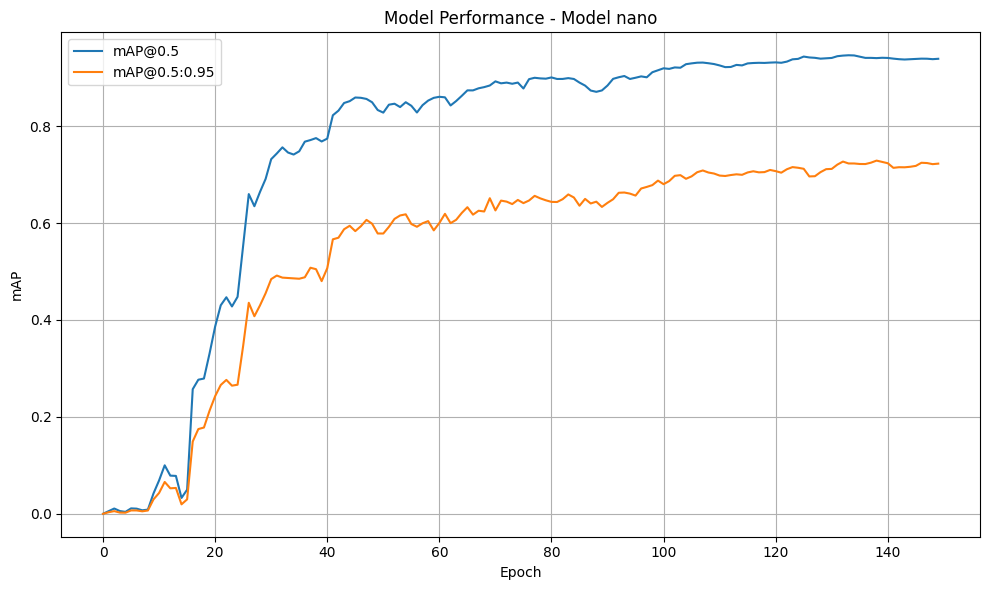

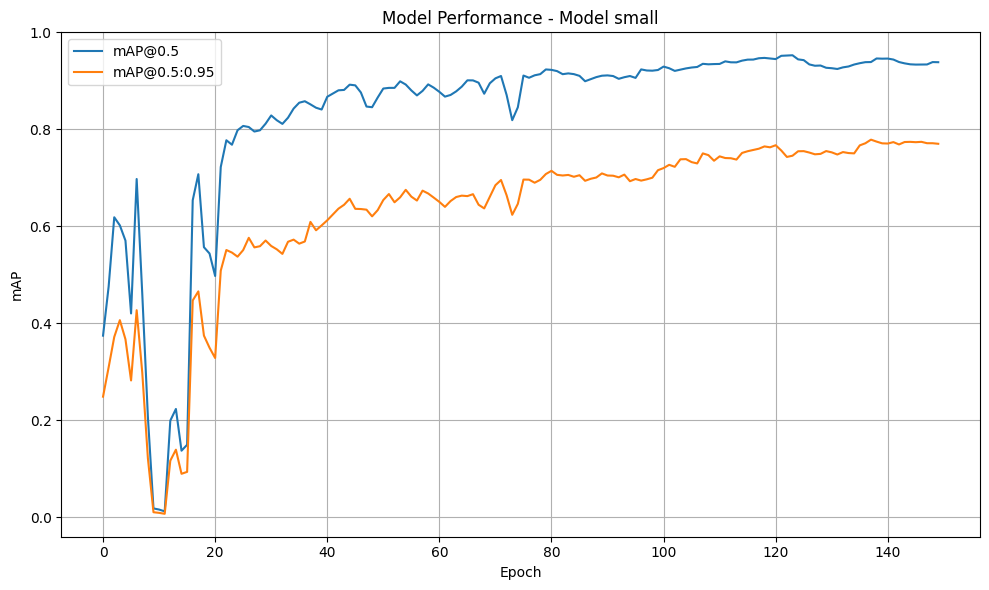

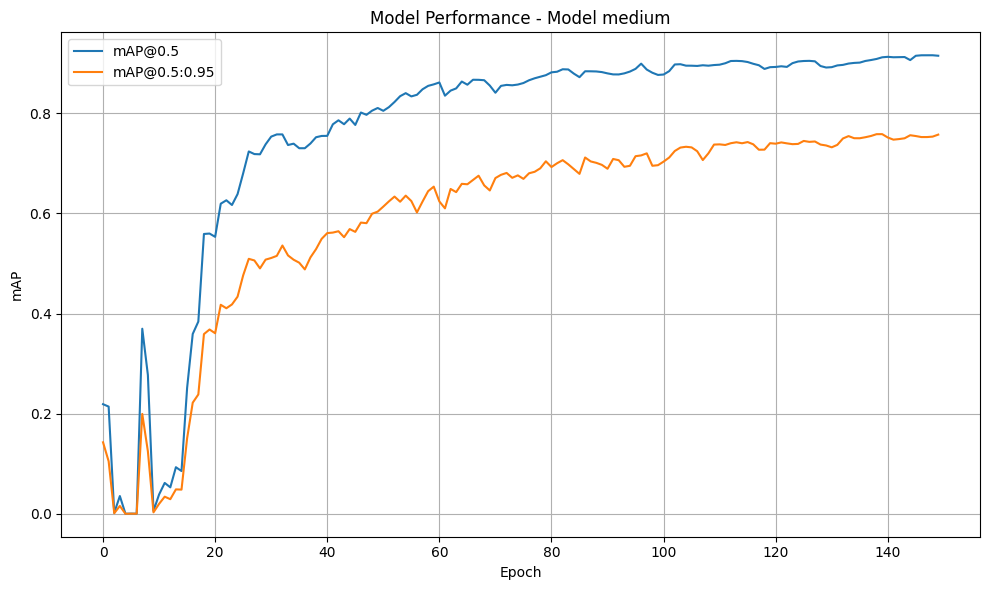

In [11]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_maskLesi}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_maskLesi}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

## Training Mask Daun dan Mask Lesi (Masih gagal karena harus menyatukan segmentasi daun dan segmentasi penyakit menjadi satu)

In [1]:
# Variabel Global
models = ['results/mask_daun/training/nano/weights/best.pt', 'results/mask_daun/training/small/weights/best.pt', 'results/mask_daun/training/medium/weights/best.pt']
sizes = ['nano', 'small', 'medium']
epochs = 5
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_maskDaun_dan_maskLesi = "dataset/mask_lesi"
project_base_maskDaun_dan_maskLesi = "results/mask_daun_dan_mask_lesi"

In [4]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    training = model.train(
        data=f"{data_path_maskDaun_dan_maskLesi}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_maskDaun_dan_maskLesi}/training", 
        name=f"{size}",
        exist_ok=True
    )

    csv_filename = f"{project_base_maskDaun_dan_maskLesi}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_maskDaun_dan_maskLesi}/data.yaml", 
        imgsz=640,
        project=f"{project_base_maskDaun_dan_maskLesi}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_maskDaun_dan_maskLesi}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=results/mask_daun/training/nano/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.10G reserved, 0.06G allocated, 11.84G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     2842998       10.36         0.466         63.92           nan        (1, 3, 640, 640)                    list
     2842998       20.71         1.011         47.25           nan        (2, 3, 640, 640)                    list
     2842998       41.43         1.825         45.85           nan        (4, 3, 640, 640)                    list
     2842998       82.85         3.393            54           nan        (8, 3, 640, 640)                    list
     2842998       165.7         6.432         67.85           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 17 for CUDA:0 7.03G/12.00G (59%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 299.6±43.8 MB/s, size: 160.2 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 280.7±144.6 MB/s, size: 227.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_daun_dan_mask_lesi/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.00053125), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun_dan_mask_lesi/training/nano
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.91G      3.671      7.229      7.153      2.331         63        640: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         75        460          0          0          0          0   5.97e-05    0.00124   2.99e-05   8.98e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.06G      3.786      7.086      7.949      2.421         99        640: 100%|██████████| 5/5 [-1:59:59<00:00, -2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         75        460   0.000119    0.00249   5.99e-05   4.19e-05   0.000119    0.00249   5.99e-05   4.49e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.06G      2.599      4.456      5.509      1.532         81        640: 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         75        460   0.000538     0.0112   0.000288   0.000192   0.000418    0.00871   0.000226   0.000176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.06G      1.838      2.933      4.329      1.126         79        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         75        460    0.00569      0.151    0.00534    0.00386    0.00575      0.153    0.00518    0.00347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.07G      1.677      2.588      3.847      1.051         76        640: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         75        460    0.00909      0.226     0.0398     0.0271    0.00938      0.232       0.04     0.0236



5 epochs completed in 0.003 hours.
Optimizer stripped from results/mask_daun_dan_mask_lesi/training/nano/weights/last.pt, 6.0MB
Optimizer stripped from results/mask_daun_dan_mask_lesi/training/nano/weights/best.pt, 6.0MB

Validating results/mask_daun_dan_mask_lesi/training/nano/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:00,  2.64it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:00<00:00,  1.97it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]


                   all         75        460    0.00907      0.226     0.0397     0.0271    0.00936      0.232       0.04     0.0235
           lesion_rust         62        402     0.0178      0.383     0.0793     0.0542     0.0184      0.396     0.0797     0.0468
           lesion_scab         13         58   0.000288      0.069   0.000173   0.000115   0.000288      0.069   0.000173   9.99e-05
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to results/mask_daun_dan_mask_lesi/training/nano
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2712.3±2433.9 MB/s, size: 219.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:02,  1.47it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:01,  1.78it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]


                   all         75        460    0.00915      0.227     0.0398      0.027    0.00938      0.232       0.04      0.022
           lesion_rust         62        402      0.018      0.386     0.0794      0.054     0.0185      0.396     0.0798     0.0439
           lesion_scab         13         58   0.000288      0.069   0.000172   0.000111   0.000288      0.069   0.000172   9.96e-05
Speed: 2.4ms preprocess, 6.4ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to results/mask_daun_dan_mask_lesi/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi/data.yaml, 

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.88G reserved, 0.21G allocated, 10.92G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    10083062       35.59         1.015         50.76           nan        (1, 3, 640, 640)                    list
    10083062       71.19         2.045         57.89           nan        (2, 3, 640, 640)                    list
    10083062       142.4         3.433         66.17           nan        (4, 3, 640, 640)                    list
    10083062       284.8         6.319         77.42           nan        (8, 3, 640, 640)                    list
    10083062       569.5        11.740         128.9           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 9 for CUDA:0 7.97G/12.00G (66%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6379.4±1636.9 MB/s, size: 160.2 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1719.3±1435.7 MB/s, size: 227.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_daun_dan_mask_lesi/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0004921875), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun_dan_mask_lesi/training/small
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.91G      3.379      9.651      26.35      1.948         14        640: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all         75        460          0          0          0          0   4.84e-05    0.00249   2.46e-05   1.23e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/5       3.2G      3.336      10.11      37.49      1.841         27        640: 100%|██████████| 9/9 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all         75        460          0          0          0          0   4.77e-05    0.00249   2.43e-05   1.21e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/5       3.2G      2.951      5.825       9.13      1.623         41        640: 100%|██████████| 9/9 [00:00<00:00, -9.01it/s]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]

                   all         75        460    0.00125     0.0684    0.00078   0.000339    0.00125     0.0684   0.000755   0.000273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.24G       2.11      3.991      4.626      1.212         28        640: 100%|██████████| 9/9 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]

                   all         75        460      0.114     0.0473     0.0411     0.0201      0.118      0.051     0.0457     0.0194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.29G      1.755      2.975      3.355      1.077         11        640: 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]

                   all         75        460      0.878      0.172      0.209      0.116      0.862      0.185      0.232      0.113



5 epochs completed in 0.004 hours.
Optimizer stripped from results/mask_daun_dan_mask_lesi/training/small/weights/last.pt, 20.5MB
Optimizer stripped from results/mask_daun_dan_mask_lesi/training/small/weights/best.pt, 20.5MB

Validating results/mask_daun_dan_mask_lesi/training/small/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:01,  3.75it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:00<00:01,  2.39it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]


                   all         75        460      0.877      0.172      0.209      0.116      0.854      0.185      0.232      0.114
           lesion_rust         62        402      0.755      0.345      0.416      0.231      0.708      0.371      0.463      0.227
           lesion_scab         13         58          1          0    0.00114   0.000689          1          0    0.00114   0.000631
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 12.6ms postprocess per image
Results saved to results/mask_daun_dan_mask_lesi/training/small
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2894.7±2688.5 MB/s, size: 219.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:00<00:03,  2.40it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:00<00:02,  2.46it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.66it/s]


                   all         75        460      0.888      0.172      0.209      0.116      0.856      0.188      0.232      0.111
           lesion_rust         62        402      0.776      0.345      0.417      0.232      0.712      0.375      0.463      0.221
           lesion_scab         13         58          1          0    0.00114   0.000689          1          0    0.00114    0.00063
Speed: 1.7ms preprocess, 9.8ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to results/mask_daun_dan_mask_lesi/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi/data.yam

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.25G reserved, 0.50G allocated, 10.24G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    22360758       123.6         1.988         65.96           nan        (1, 3, 640, 640)                    list
    22360758       247.2         4.129         81.21           nan        (2, 3, 640, 640)                    list
    22360758       494.3         6.881         100.2           nan        (4, 3, 640, 640)                    list
    22360758       988.7        12.507         139.5           nan        (8, 3, 640, 640)                    list
    22360758        1977        23.337          3078           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 3 for CUDA:0 7.15G/12.00G (60%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4865.9±1970.5 MB/s, size: 160.2 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1748.7±1533.4 MB/s, size: 227.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_daun_dan_mask_lesi/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0004921875), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun_dan_mask_lesi/training/medium
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.09G      4.543      7.373      21.83       2.59         11        640: 100%|██████████| 25/25 [00:04<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [-1:59:59<00:00, -9.95it/s]

                   all         75        460          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.28G      3.287       5.57      8.713      1.965         19        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.90it/s]

                   all         75        460      0.795     0.0833     0.0868     0.0534      0.787     0.0823     0.0838     0.0447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.33G      1.803      2.662      2.329      1.028         28        640: 100%|██████████| 25/25 [00:04<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.68it/s]

                   all         75        460      0.883      0.334      0.358      0.203      0.885      0.343      0.368      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.48G      1.555      1.708      1.611     0.9227         35        640: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.86it/s]

                   all         75        460      0.839      0.374      0.357      0.205      0.841      0.364      0.364      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.58G      1.363      1.457      1.461     0.9262         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.93it/s]

                   all         75        460      0.815      0.371      0.325      0.193      0.816      0.372      0.338       0.16



5 epochs completed in 0.009 hours.
Optimizer stripped from results/mask_daun_dan_mask_lesi/training/medium/weights/last.pt, 45.1MB
Optimizer stripped from results/mask_daun_dan_mask_lesi/training/medium/weights/best.pt, 45.1MB

Validating results/mask_daun_dan_mask_lesi/training/medium/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/13 [00:00<00:01,  8.53it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:00<00:02,  4.90it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.99it/s]


                   all         75        460      0.882      0.334      0.358      0.203      0.884      0.343      0.368      0.174
           lesion_rust         62        402      0.764      0.669       0.68      0.385      0.767      0.687        0.7      0.326
           lesion_scab         13         58          1          0     0.0361     0.0225          1          0     0.0363     0.0232
Speed: 0.3ms preprocess, 9.9ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to results/mask_daun_dan_mask_lesi/training/medium
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1869.1±2325.2 MB/s, size: 219.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/25 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 1/25 [00:00<00:03,  6.06it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 2/25 [00:00<00:03,  5.76it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 12.27it/s]


                   all         75        460      0.883      0.334      0.359      0.205      0.883      0.339      0.363      0.167
           lesion_rust         62        402      0.766      0.669      0.681      0.388      0.767      0.678       0.69      0.311
           lesion_scab         13         58          1          0      0.036     0.0225          1          0     0.0362      0.023
Speed: 1.3ms preprocess, 17.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to results/mask_daun_dan_mask_lesi/validation/medium
Finished training and validating medium model.


In [ ]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/mask_daun_dan_mask_lesi/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/mask_daun_dan_mask_lesi/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_maskDaun_dan_maskLesi}/valid/images", # Kedepannya ubah menjadi /test jika sudah ada test yang di anotasi
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_107_jpg.rf.821279d0eeebaa128f102c616b8c8ce0.jpg: 448x640 (no detections), 62.9ms
image 2/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_109_jpg.rf.558999982ac9086463d7204d0a2fa363.jpg: 448x640 (no detections), 8.4ms
image 3/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_125_jpg.rf.8718bdbec90b36689290307651991291.jpg: 448x640 (no detections), 9.0ms
image 4/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_128_jpg.rf.426d24400d4c25fa743804e00968997a.jpg: 448x640 (no detections), 9.3ms
image 5/75 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/mask_lesi/valid/images/rust_train_148_jpg.rf.50901c02699570ed964f95989d3f53b1.jpg: 448x640 (no detections), 11.1ms
image 6/75

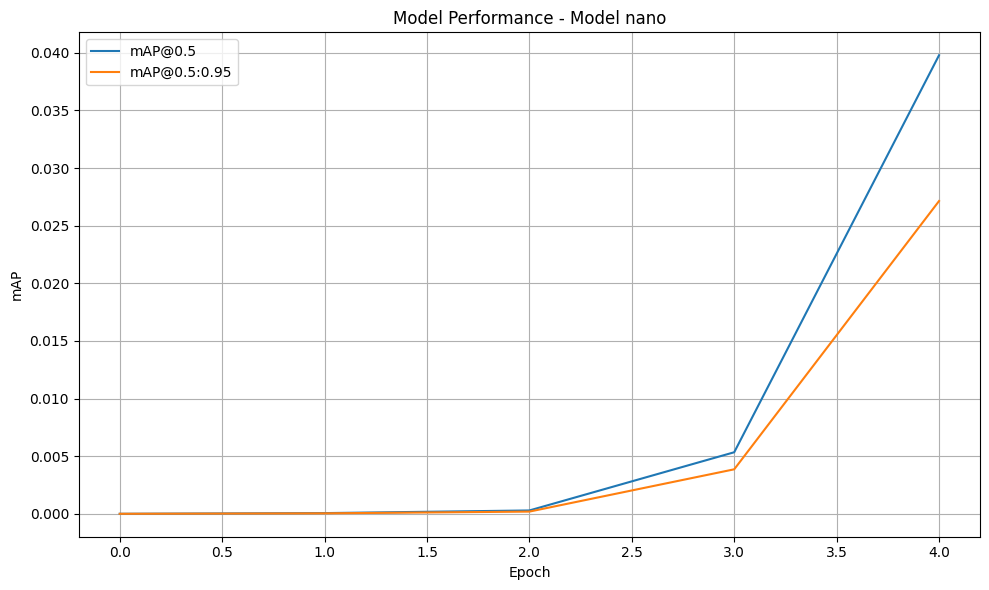

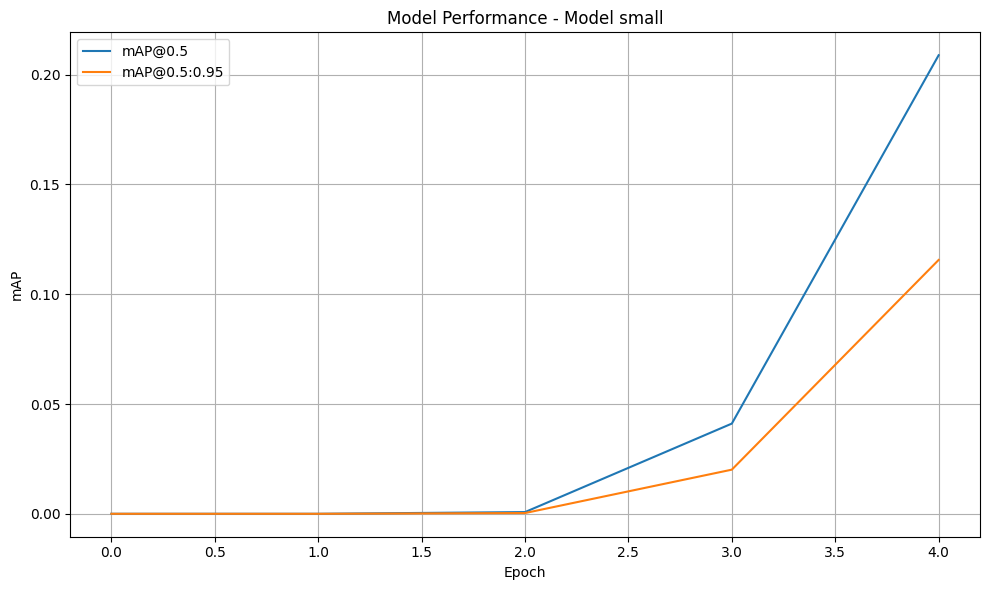

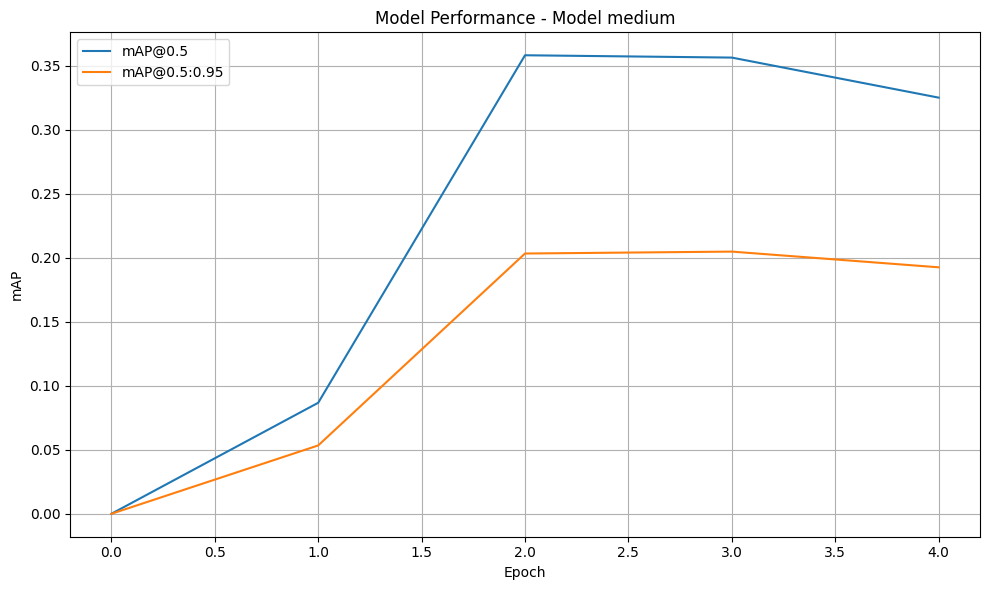

In [6]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_maskDaun_dan_maskLesi}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_maskDaun_dan_maskLesi}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

## Object Detection Class Leaf Only

In [12]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 150
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_objectDetection_leaf_class_only = "dataset/object_detection_leaf_class_only"
project_base_objectDetection_leaf_class_only = "results/object_detection_leaf_class_only"

In [13]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    training = model.train(
        data=f"{data_path_objectDetection_leaf_class_only}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_objectDetection_leaf_class_only}/training", 
        name=f"{size}",
        exist_ok=True
    )

    csv_filename = f"{project_base_objectDetection_leaf_class_only}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_objectDetection_leaf_class_only}/data.yaml", 
        imgsz=640,
        project=f"{project_base_objectDetection_leaf_class_only}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_objectDetection_leaf_class_only}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection_leaf_class_only/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patie

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.65G reserved, 0.08G allocated, 10.26G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590035       6.441         0.489         24.36         38.35        (1, 3, 640, 640)                    list
     2590035       12.88         0.638         37.26         28.39        (2, 3, 640, 640)                    list
     2590035       25.76         0.931         48.64         28.76        (4, 3, 640, 640)                    list
     2590035       51.52         1.567         55.07         45.55        (8, 3, 640, 640)                    list
     2590035         103         2.749         65.68         76.68       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 37 for CUDA:0 7.67G/12.00G (64%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2231

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1431.7±1209.2 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/object_detection_leaf_class_only/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000578125), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection_leaf_class_only/training/nano
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.88G     0.7461      1.806      1.229         17        640: 100%|██████████| 43/43 [00:11<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        173        314      0.771      0.665      0.734      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       4.9G     0.7728      1.066      1.204          8        640: 100%|██████████| 43/43 [00:14<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all        173        314      0.486      0.516      0.446      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.92G     0.7921      0.965      1.215          8        640: 100%|██████████| 43/43 [00:10<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all        173        314      0.266      0.455      0.247      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.93G     0.7697     0.8701      1.195          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        173        314      0.689      0.576      0.689       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.93G     0.7645     0.8341      1.195          5        640: 100%|██████████| 43/43 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        173        314      0.816       0.69      0.811      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.93G     0.7291     0.7939      1.169         17        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all        173        314      0.601      0.611      0.643      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.94G     0.6951     0.7476      1.148         10        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all        173        314      0.642      0.646      0.713      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.95G     0.6992     0.7196      1.147         18        640: 100%|██████████| 43/43 [00:09<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        173        314        0.8      0.736      0.855      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.97G     0.6684     0.6953      1.134         10        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        173        314      0.871      0.685      0.848      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.98G     0.6538     0.6755      1.121         18        640: 100%|██████████| 43/43 [00:10<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        173        314      0.836      0.696      0.863      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.98G     0.6549     0.6685      1.119         22        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        173        314      0.821      0.805      0.891      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.98G     0.6447     0.6632      1.123         14        640: 100%|██████████| 43/43 [00:10<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all        173        314      0.781      0.701      0.819      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.98G      0.639     0.6628      1.118         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        173        314      0.776      0.748      0.855      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.98G     0.6656     0.6509      1.131         12        640: 100%|██████████| 43/43 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:59<00:00, -1.56it/s]

                   all        173        314      0.752      0.669      0.805       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.98G     0.6191      0.621      1.107         10        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        173        314      0.744      0.761      0.855      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      4.98G     0.6215     0.6189      1.099         12        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        173        314      0.783      0.815      0.868       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.98G     0.6266     0.6253      1.108          9        640: 100%|██████████| 43/43 [00:10<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all        173        314      0.869      0.755      0.889      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.98G     0.6083     0.6099        1.1          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        173        314      0.883      0.718      0.879       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.98G     0.6122     0.6151      1.097         17        640: 100%|██████████| 43/43 [00:10<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        173        314      0.865      0.742      0.884       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.98G     0.6117     0.5978      1.093         23        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        173        314      0.729      0.771      0.844      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.98G      0.587     0.5843      1.083         10        640: 100%|██████████| 43/43 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        173        314      0.871      0.799      0.908       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.98G      0.598     0.5789      1.093         15        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        173        314      0.859       0.72      0.873      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.98G     0.5674      0.557      1.072         17        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        173        314      0.804      0.825      0.912      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.98G     0.5851     0.5718      1.078         24        640: 100%|██████████| 43/43 [00:10<00:00,  4.20it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all        173        314      0.787      0.866      0.917      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.98G     0.5691     0.5586      1.071         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        173        314      0.857      0.783      0.888      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.98G     0.5801     0.5739      1.074          9        640: 100%|██████████| 43/43 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        173        314      0.864      0.745      0.884      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.98G     0.5555     0.5764      1.069          5        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        173        314      0.849      0.793      0.905      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.98G     0.5675     0.5498      1.069         15        640: 100%|██████████| 43/43 [00:10<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        173        314      0.908      0.768      0.923      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.98G      0.551     0.5336      1.069          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all        173        314      0.865      0.828       0.92      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.98G     0.5638     0.5494      1.068         12        640: 100%|██████████| 43/43 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        173        314      0.882      0.825       0.93      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.98G     0.5332     0.5156      1.049         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        173        314      0.937      0.759      0.926      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.98G     0.5482     0.5407      1.058         23        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all        173        314      0.891      0.806      0.922      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.98G     0.5579     0.5449      1.062         12        640: 100%|██████████| 43/43 [00:10<00:00,  4.18it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        173        314      0.891      0.808       0.93       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.98G     0.5523     0.5406      1.061         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        173        314      0.851      0.876      0.931      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.98G     0.5322     0.5259      1.054         13        640: 100%|██████████| 43/43 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        173        314      0.871      0.795       0.92      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.98G     0.5398     0.5204      1.051         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        173        314      0.844      0.828      0.915      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.98G     0.5213     0.5111      1.045         11        640: 100%|██████████| 43/43 [00:09<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        173        314      0.833      0.829      0.908      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.98G     0.5152     0.5031      1.043         13        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        173        314      0.891      0.804      0.921      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.98G     0.5252     0.5034      1.046         10        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:58<00:00, -1.48it/s]

                   all        173        314      0.893      0.771      0.919      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.98G     0.5269     0.5256      1.048         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all        173        314      0.859      0.799      0.912      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.98G     0.5172      0.513      1.048         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        173        314      0.921       0.79      0.922      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.98G     0.5269     0.5046       1.04         17        640: 100%|██████████| 43/43 [00:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        173        314      0.886      0.841      0.941      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.98G     0.5292     0.5061       1.04         15        640: 100%|██████████| 43/43 [00:13<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all        173        314      0.888      0.818      0.933      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.98G     0.5263     0.4969      1.046         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        173        314      0.863      0.828      0.927      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.98G     0.5086      0.493      1.034         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        173        314      0.876      0.809      0.914      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.98G     0.5205     0.5088      1.044         13        640: 100%|██████████| 43/43 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        173        314      0.737      0.882      0.896      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.98G      0.523     0.5018      1.045          8        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        173        314      0.853      0.882      0.943      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.98G     0.5128     0.4867      1.037         15        640: 100%|██████████| 43/43 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        173        314      0.876      0.875      0.944      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.98G     0.5063     0.4758      1.032          8        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        173        314      0.866      0.844      0.933      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.98G     0.5103     0.4825      1.034         20        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        173        314       0.91      0.828      0.937      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.98G      0.513     0.4823      1.035          9        640: 100%|██████████| 43/43 [00:10<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        173        314      0.891      0.854      0.945      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.98G     0.4809      0.465       1.02         11        640: 100%|██████████| 43/43 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        173        314      0.883      0.815      0.933      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.98G     0.5007     0.4787      1.031          8        640: 100%|██████████| 43/43 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        173        314      0.895      0.799      0.919      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.98G     0.5011     0.4864      1.028         15        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        173        314      0.905      0.818      0.943      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.98G      0.498     0.4752      1.027         10        640: 100%|██████████| 43/43 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        173        314      0.876       0.86      0.942       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.98G     0.4928     0.4623      1.027         20        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        173        314      0.867      0.873      0.938      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.98G     0.4923     0.4722      1.026         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:59<00:00, -1.55it/s]

                   all        173        314      0.842      0.866      0.924      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.98G     0.5057     0.4736      1.038         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        173        314      0.749       0.86      0.883      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.98G      0.481     0.4648       1.02         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


                   all        173        314      0.882      0.844       0.93      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.98G     0.4892     0.4587      1.016          9        640: 100%|██████████| 43/43 [00:10<00:00,  4.17it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        173        314      0.835      0.889       0.94      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.98G     0.4762     0.4472      1.013          7        640: 100%|██████████| 43/43 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        173        314      0.924       0.81      0.937       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.98G     0.4798     0.4624      1.014         21        640: 100%|██████████| 43/43 [00:09<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        173        314       0.91      0.847      0.939      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.98G     0.4849     0.4622      1.032          6        640: 100%|██████████| 43/43 [00:12<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        173        314      0.834      0.895      0.939      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.98G     0.4818      0.454      1.018         12        640: 100%|██████████| 43/43 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        173        314      0.853      0.887      0.937      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.98G     0.4755     0.4506      1.016         16        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        173        314       0.92      0.799      0.935      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.98G     0.4871     0.4393      1.019         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:58<00:00, -1.47it/s]

                   all        173        314      0.918      0.823      0.931      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.98G     0.4679     0.4333      1.013         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all        173        314      0.901      0.815      0.936      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.98G     0.4637      0.438       1.01          6        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        173        314      0.871      0.882      0.939      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.98G     0.4725     0.4371      1.008         12        640: 100%|██████████| 43/43 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        173        314      0.865      0.876      0.943      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.98G     0.4706     0.4366       1.01         16        640: 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        173        314       0.83       0.85      0.921       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.98G     0.4641     0.4396       1.01         13        640: 100%|██████████| 43/43 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        173        314      0.868      0.856      0.921      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.98G      0.465     0.4391      1.013          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        173        314      0.881      0.825      0.923      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.98G     0.4688     0.4329      1.006         17        640: 100%|██████████| 43/43 [00:10<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        173        314      0.888      0.838      0.942      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.98G     0.4575     0.4216      1.006         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        173        314      0.892      0.866      0.945       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.98G     0.4579     0.4325      1.009          6        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:58<00:00, -1.49it/s]

                   all        173        314      0.895      0.839      0.945      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.98G     0.4569     0.4117      1.008         10        640: 100%|██████████| 43/43 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all        173        314      0.896      0.863      0.951      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.98G     0.4595     0.4207      1.014          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        173        314      0.897      0.844      0.945      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.98G     0.4589      0.427       1.01          8        640: 100%|██████████| 43/43 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        173        314      0.912      0.828      0.939       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.98G     0.4625     0.4423      1.011          8        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        173        314      0.899      0.831      0.939      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.98G     0.4555     0.4215      1.001         13        640: 100%|██████████| 43/43 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        173        314      0.882      0.854      0.942      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.98G     0.4478      0.406      1.001          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all        173        314      0.871      0.831      0.928       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.98G     0.4733     0.4192      1.024          7        640: 100%|██████████| 43/43 [00:10<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        173        314      0.897      0.859      0.939      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.98G      0.452     0.4093     0.9993         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all        173        314      0.848      0.866       0.93      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.98G       0.45     0.4134      1.001         13        640: 100%|██████████| 43/43 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:58<00:00, -1.49it/s]

                   all        173        314      0.881      0.825      0.933       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.98G     0.4398     0.4133     0.9957          7        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        173        314      0.873       0.85      0.932      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.98G     0.4541     0.4076      1.005         11        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all        173        314      0.924      0.777      0.935      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.98G     0.4538     0.4198      1.005         16        640: 100%|██████████| 43/43 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        173        314        0.9      0.833      0.939      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.98G     0.4416     0.4069      1.001          7        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        173        314      0.848      0.882      0.937      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.98G     0.4552     0.4048      1.005          8        640: 100%|██████████| 43/43 [00:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        173        314      0.893       0.88       0.94      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.98G     0.4416     0.4001     0.9958         15        640: 100%|██████████| 43/43 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        173        314      0.878      0.871      0.938      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.98G     0.4441     0.4046     0.9974         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        173        314      0.951      0.807      0.937      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.98G     0.4371      0.395     0.9983          8        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        173        314       0.85      0.863      0.935      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.98G     0.4492     0.4007     0.9978         25        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        173        314      0.904      0.812      0.932      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.98G     0.4249     0.3846     0.9954         20        640: 100%|██████████| 43/43 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        173        314      0.886      0.838      0.932      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.98G     0.4243     0.3826     0.9876         12        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        173        314      0.882      0.836      0.937      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.98G     0.4381       0.39      1.003          6        640: 100%|██████████| 43/43 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        173        314       0.92      0.831      0.942      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.98G     0.4241     0.3708     0.9867         15        640: 100%|██████████| 43/43 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all        173        314      0.874      0.863      0.933       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.98G     0.4255     0.3846     0.9912         14        640: 100%|██████████| 43/43 [00:10<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all        173        314      0.876      0.847      0.937      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.98G     0.4224     0.3741       0.99         10        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        173        314      0.882      0.832      0.922      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.98G     0.4219     0.3722       0.99         11        640: 100%|██████████| 43/43 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        173        314       0.96      0.787      0.938      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.98G     0.4196     0.3762     0.9805          9        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        173        314      0.882      0.835      0.933      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.98G     0.4147     0.3656     0.9798         13        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        173        314      0.856      0.873      0.931      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.98G      0.429     0.3728     0.9952          8        640: 100%|██████████| 43/43 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        173        314      0.909       0.85      0.948      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.98G     0.4186     0.3718     0.9924          7        640: 100%|██████████| 43/43 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all        173        314      0.847      0.882      0.933      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.98G     0.4205     0.3679     0.9855         10        640: 100%|██████████| 43/43 [00:10<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        173        314      0.818      0.859      0.921      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.98G     0.4235     0.3581     0.9907         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        173        314      0.859      0.854      0.928      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.98G     0.4132     0.3648     0.9852         12        640: 100%|██████████| 43/43 [00:10<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all        173        314      0.873      0.844      0.932      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.98G     0.4239     0.3741     0.9903         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all        173        314      0.857      0.857      0.933      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.98G     0.4142     0.3623     0.9809         15        640: 100%|██████████| 43/43 [00:10<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        173        314      0.868       0.84      0.925       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.98G     0.4072     0.3596     0.9767         12        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        173        314      0.885      0.844      0.934       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.98G     0.4066     0.3567     0.9783         13        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        173        314      0.858      0.882      0.931      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.98G     0.4067     0.3559     0.9829          9        640: 100%|██████████| 43/43 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        173        314      0.856      0.844      0.919      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.98G     0.4113     0.3466     0.9755         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        173        314      0.882      0.815      0.925      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.98G     0.4056     0.3467     0.9821         17        640: 100%|██████████| 43/43 [00:10<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        173        314      0.875      0.847      0.932      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.98G     0.4101     0.3569     0.9797          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        173        314      0.918      0.796      0.923      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.98G     0.4105     0.3544     0.9795         17        640: 100%|██████████| 43/43 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        173        314      0.856      0.869      0.936      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.98G     0.4049     0.3422     0.9753         16        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        173        314      0.862      0.838       0.93      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.98G     0.3985     0.3362     0.9698          9        640: 100%|██████████| 43/43 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:58<00:00, -1.46it/s]

                   all        173        314      0.929      0.789      0.927      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.98G     0.3916     0.3347     0.9657         17        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        173        314      0.887      0.825      0.922      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.98G     0.4001     0.3397     0.9733         18        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all        173        314      0.862      0.857      0.928      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.98G     0.4019     0.3381     0.9763         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        173        314      0.895      0.837      0.928      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.98G     0.3942     0.3378     0.9716         24        640: 100%|██████████| 43/43 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        173        314      0.873      0.851      0.917      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.98G     0.3959     0.3264     0.9697         15        640: 100%|██████████| 43/43 [00:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        173        314      0.888      0.809      0.921      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.98G     0.3928     0.3326     0.9736         17        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        173        314      0.873       0.86      0.932      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.98G     0.3829     0.3339     0.9672         22        640: 100%|██████████| 43/43 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        173        314      0.901      0.847      0.927      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.98G     0.4006     0.3356     0.9795         13        640: 100%|██████████| 43/43 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        173        314      0.891      0.841      0.924      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.98G     0.3944     0.3352     0.9715          9        640: 100%|██████████| 43/43 [00:12<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [-1:59:58<00:00, -1.47it/s]

                   all        173        314      0.896      0.827      0.927      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.98G     0.3872     0.3368     0.9758          6        640: 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all        173        314      0.905      0.793      0.917      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.98G       0.38     0.3148     0.9673         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        173        314      0.906      0.803      0.919      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.98G     0.3857     0.3154     0.9678         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        173        314       0.86      0.847      0.925      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.98G     0.3874      0.326     0.9699          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all        173        314      0.859      0.834      0.917      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.98G     0.3825      0.318     0.9587          6        640: 100%|██████████| 43/43 [00:10<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        173        314      0.886      0.838      0.916      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.98G     0.3851     0.3164     0.9652          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        173        314      0.889      0.806      0.911      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.98G     0.3887     0.3185      0.968         15        640: 100%|██████████| 43/43 [00:10<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        173        314      0.899      0.824      0.913      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.98G     0.3888     0.3252      0.969          6        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        173        314      0.849      0.863      0.917      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.98G     0.3873     0.3202     0.9658         12        640: 100%|██████████| 43/43 [00:10<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        173        314      0.886      0.828      0.915      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.98G     0.3733      0.312     0.9643          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        173        314      0.861      0.847      0.916      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.98G     0.3722     0.3051     0.9581         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        173        314      0.864      0.854      0.917       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.98G     0.3767     0.3056     0.9614         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.04it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        173        314      0.888      0.844       0.92      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      4.98G     0.3783     0.3117     0.9667         19        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all        173        314       0.89      0.828      0.922       0.86


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.98G     0.2679     0.2993     0.8734          3        640: 100%|██████████| 43/43 [00:11<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        173        314      0.873       0.85      0.914      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.98G     0.2514     0.2333     0.8661          3        640: 100%|██████████| 43/43 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        173        314      0.897      0.833      0.917      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.98G     0.2414     0.2213     0.8583          5        640: 100%|██████████| 43/43 [00:10<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        173        314      0.902      0.825       0.91      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.98G     0.2386     0.2092     0.8552          3        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        173        314      0.867      0.834      0.907      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      4.98G     0.2408     0.2072      0.855          3        640: 100%|██████████| 43/43 [00:10<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        173        314      0.911      0.799      0.902      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      4.98G     0.2435     0.2091     0.8513          3        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all        173        314      0.901      0.814      0.899       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.98G     0.2406     0.2254     0.8574         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        173        314      0.903      0.818      0.909       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.98G     0.2374     0.2044     0.8553          4        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        173        314      0.891      0.834      0.908      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.98G     0.2353     0.2003     0.8578          3        640: 100%|██████████| 43/43 [00:10<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all        173        314      0.909      0.818      0.907      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.98G     0.2335     0.1943     0.8516          3        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        173        314      0.919      0.818      0.907      0.849



150 epochs completed in 0.547 hours.
Optimizer stripped from results/object_detection_leaf_class_only/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/object_detection_leaf_class_only/training/nano/weights/best.pt, 5.5MB

Validating results/object_detection_leaf_class_only/training/nano/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


                   all        173        314      0.892      0.863      0.951      0.874
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to results/object_detection_leaf_class_only/training/nano
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 717.2±1127.0 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/labels.cache... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.18it/s]


                   all       1739       3399      0.839      0.827      0.908      0.821
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/object_detection_leaf_class_only/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection_leaf_class_only/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.79G reserved, 0.21G allocated, 10.00G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     9428179       21.55         0.841         37.66         25.35        (1, 3, 640, 640)                    list
     9428179        43.1         1.168         42.14          28.8        (2, 3, 640, 640)                    list
     9428179       86.19         1.743         73.26         39.23        (4, 3, 640, 640)                    list
     9428179       172.4         2.875         93.45         66.97        (8, 3, 640, 640)                    list
     9428179       344.8         4.945         107.8         118.1       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 19 for CUDA:0 7.80G/12.00G (65%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2364.4±504.0 MB/s, size: 204.6 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 645.3±355.4 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/object_detection_leaf_class_only/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00044531249999999996), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection_leaf_class_only/training/small
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.73G     0.7498      1.534      1.229         79        640: 100%|██████████| 82/82 [00:21<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


                   all        173        314      0.478      0.497      0.398      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.99G     0.8599     0.9118      1.262         97        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        173        314      0.571      0.661      0.642      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.03G     0.8561     0.8792      1.263         74        640: 100%|██████████| 82/82 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]

                   all        173        314      0.299      0.414      0.309      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.07G     0.8809     0.8759      1.282         72        640: 100%|██████████| 82/82 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        173        314      0.413      0.532      0.444       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.09G     0.8264     0.8404       1.24         63        640: 100%|██████████| 82/82 [00:20<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        173        314       0.72      0.688      0.806      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.09G     0.8042     0.8039      1.227         87        640: 100%|██████████| 82/82 [00:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        173        314      0.777       0.65      0.793      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.09G     0.7319     0.7588       1.18         67        640: 100%|██████████| 82/82 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]

                   all        173        314      0.877      0.618      0.818      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.11G     0.7388     0.7525      1.176         88        640: 100%|██████████| 82/82 [00:20<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        173        314      0.808      0.742      0.863      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.15G      0.698     0.7097      1.154         73        640: 100%|██████████| 82/82 [00:20<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

                   all        173        314      0.817      0.717      0.836      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.19G     0.6934     0.6908      1.157         93        640: 100%|██████████| 82/82 [00:19<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

                   all        173        314       0.84      0.737      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       5.2G     0.6892     0.6873      1.155         73        640: 100%|██████████| 82/82 [00:23<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        173        314      0.814      0.755      0.856      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       5.2G     0.6651     0.6836      1.139         97        640: 100%|██████████| 82/82 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]

                   all        173        314      0.854      0.687       0.82      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       5.2G     0.6661     0.6912      1.152         58        640: 100%|██████████| 82/82 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        173        314      0.821      0.758      0.877      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       5.2G     0.6588     0.6632       1.13         73        640: 100%|██████████| 82/82 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]

                   all        173        314      0.839      0.745      0.873      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       5.2G     0.6473     0.6505      1.125         74        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        173        314      0.854      0.752      0.895      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       5.2G     0.6225     0.6314      1.108         65        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        173        314      0.872      0.717       0.86      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       5.2G     0.6296     0.6351      1.117         62        640: 100%|██████████| 82/82 [00:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all        173        314      0.848      0.739      0.876      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       5.2G      0.641     0.6344      1.128         79        640: 100%|██████████| 82/82 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]

                   all        173        314      0.906      0.704      0.889      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150       5.2G     0.6174     0.6328      1.107         70        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [-1:59:59<00:00, -3.35it/s]

                   all        173        314      0.852      0.768      0.897      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150       5.2G     0.6087     0.6071      1.103         85        640: 100%|██████████| 82/82 [00:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all        173        314      0.907      0.736      0.902      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       5.2G     0.6005     0.6114      1.092         75        640: 100%|██████████| 82/82 [00:20<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        173        314      0.822      0.825      0.913      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       5.2G     0.5961     0.6034        1.1         69        640: 100%|██████████| 82/82 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        173        314      0.843      0.758      0.899      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       5.2G     0.5743     0.5861       1.08         51        640: 100%|██████████| 82/82 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        173        314      0.866      0.799      0.919       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       5.2G     0.5723     0.5641      1.078         77        640: 100%|██████████| 82/82 [00:23<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        173        314      0.808      0.812      0.904      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150       5.2G     0.5762     0.5774      1.077         70        640: 100%|██████████| 82/82 [00:20<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        173        314      0.815      0.847      0.914      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       5.2G     0.5836     0.5838      1.085         92        640: 100%|██████████| 82/82 [00:20<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

                   all        173        314      0.889      0.745      0.903      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       5.2G     0.5658     0.5609      1.072         70        640: 100%|██████████| 82/82 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        173        314      0.863      0.787      0.905      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       5.2G      0.577     0.5639      1.076         94        640: 100%|██████████| 82/82 [00:23<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        173        314      0.863      0.799      0.916       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       5.2G     0.5532     0.5399      1.061         75        640: 100%|██████████| 82/82 [00:21<00:00,  3.89it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        173        314      0.878      0.824      0.925      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150       5.2G     0.5517     0.5518      1.069         77        640: 100%|██████████| 82/82 [00:20<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all        173        314      0.858      0.841      0.932      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150       5.2G     0.5513     0.5457      1.064         70        640: 100%|██████████| 82/82 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        173        314      0.892      0.764      0.905      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150       5.2G     0.5529     0.5446      1.064         90        640: 100%|██████████| 82/82 [00:20<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]

                   all        173        314      0.872      0.805      0.919       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150       5.2G     0.5434     0.5512      1.055         76        640: 100%|██████████| 82/82 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]

                   all        173        314       0.83      0.841       0.92      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       5.2G     0.5539     0.5344       1.07         74        640: 100%|██████████| 82/82 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        173        314       0.88      0.794      0.924      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150       5.2G      0.545     0.5353      1.064         76        640: 100%|██████████| 82/82 [00:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all        173        314       0.84      0.828      0.923      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150       5.2G     0.5488     0.5445      1.061         60        640: 100%|██████████| 82/82 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        173        314      0.898      0.812      0.924       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150       5.2G     0.5321     0.5176      1.054         57        640: 100%|██████████| 82/82 [00:22<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all        173        314      0.861      0.799       0.92      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150       5.2G      0.528     0.5287      1.051         68        640: 100%|██████████| 82/82 [00:20<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all        173        314      0.917      0.805      0.938      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       5.2G     0.5258     0.5123      1.053         60        640: 100%|██████████| 82/82 [00:20<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        173        314      0.892       0.79      0.914      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150       5.2G     0.5284     0.5278      1.048         75        640: 100%|██████████| 82/82 [00:19<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

                   all        173        314      0.916      0.793       0.93       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150       5.2G     0.5152     0.5111       1.05         77        640: 100%|██████████| 82/82 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

                   all        173        314      0.839       0.86      0.921      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       5.2G     0.5183     0.5064      1.044         72        640: 100%|██████████| 82/82 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        173        314      0.858      0.825      0.924      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       5.2G     0.5192     0.5121      1.046         75        640: 100%|██████████| 82/82 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        173        314      0.892      0.838      0.938      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       5.2G     0.5124     0.5069      1.044         64        640: 100%|██████████| 82/82 [00:19<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

                   all        173        314      0.873      0.811      0.916      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       5.2G     0.5144     0.5023      1.038         65        640: 100%|██████████| 82/82 [00:19<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        173        314      0.874      0.859       0.94      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150       5.2G     0.5063     0.5038      1.037         69        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        173        314      0.877      0.825      0.935      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150       5.2G     0.5051     0.4975       1.04         68        640: 100%|██████████| 82/82 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        173        314      0.877       0.82      0.933      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       5.2G     0.5069     0.5003       1.04         80        640: 100%|██████████| 82/82 [00:19<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

                   all        173        314      0.903        0.8      0.929      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       5.2G     0.5027     0.4962      1.039         80        640: 100%|██████████| 82/82 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        173        314      0.831      0.875      0.929      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       5.2G     0.4978     0.4962      1.033         79        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]

                   all        173        314      0.901       0.81      0.939      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       5.2G      0.497     0.4891      1.036         74        640: 100%|██████████| 82/82 [00:20<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        173        314      0.866      0.854      0.935      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       5.2G     0.5082     0.4725      1.037         67        640: 100%|██████████| 82/82 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all        173        314      0.882      0.825      0.936      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       5.2G     0.4919     0.4787       1.03         79        640: 100%|██████████| 82/82 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]

                   all        173        314      0.878      0.834      0.936      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       5.2G     0.4907     0.4798       1.03        105        640: 100%|██████████| 82/82 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all        173        314       0.87      0.854      0.943      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150       5.2G     0.4848      0.477      1.021         70        640: 100%|██████████| 82/82 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]

                   all        173        314      0.895      0.838      0.936      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       5.2G      0.475     0.4607       1.02         71        640: 100%|██████████| 82/82 [00:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        173        314       0.89      0.803       0.93      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       5.2G     0.4847     0.4691      1.024         70        640: 100%|██████████| 82/82 [00:20<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]

                   all        173        314      0.933      0.787      0.926      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       5.2G     0.4823     0.4664      1.022         99        640: 100%|██████████| 82/82 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        173        314       0.88      0.847      0.938      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150       5.2G     0.4829     0.4655      1.022         84        640: 100%|██████████| 82/82 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

                   all        173        314      0.928      0.838      0.943      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       5.2G     0.4711     0.4558      1.013         74        640: 100%|██████████| 82/82 [00:19<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all        173        314      0.899      0.831      0.937      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       5.2G     0.4721     0.4537      1.016         52        640: 100%|██████████| 82/82 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        173        314      0.851      0.888       0.94      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       5.2G     0.4714     0.4616      1.023         53        640: 100%|██████████| 82/82 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [-1:59:59<00:00, -2.71it/s]

                   all        173        314      0.873      0.873      0.942      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150       5.2G      0.467     0.4448      1.022         56        640: 100%|██████████| 82/82 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        173        314      0.875      0.849      0.939      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       5.2G     0.4657     0.4423       1.01         86        640: 100%|██████████| 82/82 [00:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        173        314      0.873      0.829      0.928       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       5.2G     0.4641     0.4382      1.016         94        640: 100%|██████████| 82/82 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        173        314      0.877      0.837      0.931       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       5.2G     0.4642      0.449       1.01         78        640: 100%|██████████| 82/82 [00:20<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all        173        314      0.887      0.863      0.948      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       5.2G     0.4619     0.4365      1.016         87        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        173        314      0.873      0.873      0.947      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       5.2G     0.4601     0.4441      1.006         68        640: 100%|██████████| 82/82 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        173        314       0.91      0.854      0.939      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150       5.2G     0.4659     0.4425      1.016         86        640: 100%|██████████| 82/82 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all        173        314      0.894       0.86      0.951      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       5.2G     0.4622     0.4437      1.009         82        640: 100%|██████████| 82/82 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        173        314      0.896      0.834      0.941      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150       5.2G     0.4544     0.4365      1.015         85        640: 100%|██████████| 82/82 [00:18<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.76it/s]

                   all        173        314      0.916      0.831      0.941      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150       5.2G     0.4665     0.4365      1.013         92        640: 100%|██████████| 82/82 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]

                   all        173        314      0.858      0.825      0.932      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150       5.2G     0.4607     0.4299       1.01         86        640: 100%|██████████| 82/82 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        173        314      0.863      0.866       0.94      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.21G     0.4486     0.4241      1.001         62        640: 100%|██████████| 82/82 [00:19<00:00,  4.15it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        173        314       0.92      0.818      0.944      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.21G     0.4482     0.4165      1.004         73        640: 100%|██████████| 82/82 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all        173        314      0.845       0.87      0.938       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.21G     0.4451     0.4215      1.002         63        640: 100%|██████████| 82/82 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        173        314      0.903      0.803      0.935      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.21G     0.4564     0.4351      1.013         65        640: 100%|██████████| 82/82 [00:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        173        314      0.907      0.834      0.947      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.21G     0.4392      0.416      1.004         56        640: 100%|██████████| 82/82 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

                   all        173        314      0.908      0.847       0.94      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.21G     0.4328     0.4068     0.9952         72        640: 100%|██████████| 82/82 [00:19<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        173        314      0.857      0.876      0.938      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.21G     0.4407     0.4074      1.001         93        640: 100%|██████████| 82/82 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

                   all        173        314      0.914      0.822      0.938      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.21G     0.4465     0.4056      1.002         74        640: 100%|██████████| 82/82 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        173        314      0.913      0.833      0.947      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.21G     0.4468     0.4129      0.999         74        640: 100%|██████████| 82/82 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        173        314      0.913       0.84      0.942      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.21G     0.4275     0.3999     0.9954         83        640: 100%|██████████| 82/82 [00:19<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        173        314      0.866      0.892      0.941      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.21G     0.4407     0.4089      1.003         58        640: 100%|██████████| 82/82 [00:19<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        173        314      0.876       0.85      0.935      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.21G     0.4333     0.3877          1         74        640: 100%|██████████| 82/82 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]

                   all        173        314      0.901      0.854      0.942      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.21G     0.4342     0.4044     0.9989         82        640: 100%|██████████| 82/82 [00:23<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        173        314      0.863      0.864      0.944      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.21G     0.4346     0.3931     0.9979        103        640: 100%|██████████| 82/82 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        173        314      0.868       0.86      0.939      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.21G     0.4328     0.3932      0.995         75        640: 100%|██████████| 82/82 [00:19<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        173        314      0.915       0.86      0.945      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.21G      0.425     0.3894     0.9873         63        640: 100%|██████████| 82/82 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

                   all        173        314      0.891      0.881      0.948      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.21G     0.4307     0.3904     0.9946         88        640: 100%|██████████| 82/82 [00:23<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        173        314      0.917      0.849      0.946      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.21G     0.4294     0.3892      0.991         82        640: 100%|██████████| 82/82 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        173        314      0.915      0.838      0.948      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.21G     0.4172     0.3793     0.9895         68        640: 100%|██████████| 82/82 [00:19<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]

                   all        173        314      0.927      0.806      0.939      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.21G     0.4285     0.3832     0.9962         74        640: 100%|██████████| 82/82 [00:20<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

                   all        173        314      0.883      0.844      0.935      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.21G     0.4211     0.3867     0.9932         59        640: 100%|██████████| 82/82 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]

                   all        173        314      0.903      0.863       0.94      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.21G     0.4166     0.3803     0.9838         63        640: 100%|██████████| 82/82 [00:20<00:00,  3.98it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        173        314      0.897      0.861      0.941      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.21G     0.4187       0.37     0.9886         81        640: 100%|██████████| 82/82 [00:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        173        314      0.905      0.834      0.937      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.21G     0.4197       0.38     0.9911         82        640: 100%|██████████| 82/82 [00:20<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        173        314      0.907      0.834      0.939      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.21G       0.42     0.3761     0.9916         75        640: 100%|██████████| 82/82 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        173        314      0.899      0.852       0.94      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.21G     0.4172     0.3695      0.988         80        640: 100%|██████████| 82/82 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        173        314      0.915      0.818      0.932      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.21G     0.4094     0.3775     0.9829         64        640: 100%|██████████| 82/82 [00:20<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        173        314      0.878      0.871      0.943      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.21G     0.4214     0.3677     0.9884         65        640: 100%|██████████| 82/82 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        173        314      0.885      0.863      0.948      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.21G     0.4034     0.3598     0.9824         92        640: 100%|██████████| 82/82 [00:20<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

                   all        173        314      0.904      0.844      0.946      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.21G     0.4104     0.3545     0.9829         55        640: 100%|██████████| 82/82 [00:23<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        173        314      0.931      0.815       0.94      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.21G     0.4096     0.3599     0.9878         63        640: 100%|██████████| 82/82 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]

                   all        173        314      0.914      0.857      0.941      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.21G      0.407     0.3556     0.9806         68        640: 100%|██████████| 82/82 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        173        314      0.914       0.86      0.937      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.21G      0.399     0.3507     0.9785         78        640: 100%|██████████| 82/82 [00:20<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

                   all        173        314      0.899      0.844       0.94      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.21G     0.4149     0.3631     0.9903         79        640: 100%|██████████| 82/82 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        173        314      0.867       0.87      0.934      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.21G     0.4042     0.3549     0.9866         66        640: 100%|██████████| 82/82 [00:20<00:00,  4.08it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        173        314      0.892      0.847      0.933      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.21G     0.3942     0.3421     0.9732         87        640: 100%|██████████| 82/82 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        173        314      0.931      0.814      0.941      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.21G     0.3919     0.3372     0.9726         59        640: 100%|██████████| 82/82 [00:19<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

                   all        173        314      0.892      0.817      0.935      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.21G     0.4004      0.336     0.9793         66        640: 100%|██████████| 82/82 [00:20<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all        173        314      0.869      0.865      0.938       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.21G     0.3908     0.3431     0.9725         70        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        173        314       0.88      0.864      0.935       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.21G     0.3973     0.3462     0.9803         74        640: 100%|██████████| 82/82 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        173        314      0.903      0.797      0.924      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.21G     0.3886     0.3293     0.9761         85        640: 100%|██████████| 82/82 [00:19<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.68it/s]

                   all        173        314      0.892      0.834      0.925      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.21G     0.3863     0.3373     0.9686         89        640: 100%|██████████| 82/82 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]

                   all        173        314      0.886      0.847      0.936       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.21G     0.3862     0.3251     0.9719         74        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        173        314      0.898      0.828      0.929      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.21G     0.3973     0.3365     0.9711         78        640: 100%|██████████| 82/82 [00:20<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        173        314      0.852      0.854      0.926      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.21G     0.3906     0.3317     0.9719         63        640: 100%|██████████| 82/82 [00:20<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all        173        314      0.868      0.856      0.928      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.21G     0.3794     0.3258     0.9699         51        640: 100%|██████████| 82/82 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        173        314      0.894      0.822      0.922      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.21G     0.3847     0.3183     0.9683         73        640: 100%|██████████| 82/82 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

                   all        173        314       0.88      0.845      0.929      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.21G     0.3889     0.3268     0.9762         73        640: 100%|██████████| 82/82 [00:19<00:00,  4.14it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]

                   all        173        314      0.882      0.882      0.939      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.21G     0.3844     0.3213     0.9749         66        640: 100%|██████████| 82/82 [00:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        173        314       0.89      0.854      0.932      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.21G     0.3779     0.3161     0.9602         83        640: 100%|██████████| 82/82 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        173        314      0.885      0.854      0.934      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.21G     0.3739     0.3136     0.9676         52        640: 100%|██████████| 82/82 [00:23<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.68it/s]

                   all        173        314      0.893      0.828      0.925      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.21G     0.3665     0.3064     0.9592         68        640: 100%|██████████| 82/82 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        173        314      0.845      0.869      0.935      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.21G     0.3795     0.3132      0.972         56        640: 100%|██████████| 82/82 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

                   all        173        314      0.917      0.818      0.935      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.21G     0.3733     0.3087     0.9625         61        640: 100%|██████████| 82/82 [00:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

                   all        173        314      0.857      0.857      0.934      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.21G     0.3679     0.3037     0.9629         65        640: 100%|██████████| 82/82 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

                   all        173        314      0.888      0.834      0.932      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.21G     0.3793      0.313     0.9695         68        640: 100%|██████████| 82/82 [00:22<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        173        314      0.912      0.797      0.925      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.21G     0.3697     0.3031     0.9663         64        640: 100%|██████████| 82/82 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        173        314      0.872      0.843      0.927      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.21G     0.3756     0.3101     0.9644         70        640: 100%|██████████| 82/82 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all        173        314      0.907      0.834      0.921      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.21G     0.3701     0.3094     0.9595         80        640: 100%|██████████| 82/82 [00:20<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        173        314      0.902      0.823      0.921      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.21G     0.3643     0.2977     0.9598         69        640: 100%|██████████| 82/82 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        173        314      0.884      0.831      0.922      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.21G     0.3686      0.302     0.9595         70        640: 100%|██████████| 82/82 [00:19<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]

                   all        173        314      0.911       0.81      0.917      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.21G     0.3637      0.292     0.9612         77        640: 100%|██████████| 82/82 [00:20<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        173        314      0.889       0.84      0.919       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.21G     0.3609     0.2889     0.9578         93        640: 100%|██████████| 82/82 [00:20<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all        173        314      0.871      0.831       0.92      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.21G     0.3617     0.2914     0.9628         54        640: 100%|██████████| 82/82 [00:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [-1:59:59<00:00, -2.85it/s]

                   all        173        314      0.908      0.814      0.923      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.21G     0.3547     0.2847     0.9549         53        640: 100%|██████████| 82/82 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all        173        314      0.933      0.777      0.925      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.21G     0.3652     0.2921     0.9643         58        640: 100%|██████████| 82/82 [00:19<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all        173        314      0.904      0.812      0.921       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.21G     0.3617     0.2929     0.9569         70        640: 100%|██████████| 82/82 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]

                   all        173        314       0.92      0.805      0.917      0.867


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.21G     0.2511      0.262     0.8704         19        640: 100%|██████████| 82/82 [00:20<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all        173        314      0.886      0.806      0.921      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.21G     0.2354     0.2144     0.8533         27        640: 100%|██████████| 82/82 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

                   all        173        314      0.876      0.834      0.924       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.21G     0.2286     0.2085     0.8546         36        640: 100%|██████████| 82/82 [00:20<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]

                   all        173        314      0.867      0.841      0.914      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.21G     0.2229      0.197     0.8482         32        640: 100%|██████████| 82/82 [00:20<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        173        314      0.924       0.79      0.914      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.21G     0.2221      0.193     0.8457         31        640: 100%|██████████| 82/82 [00:19<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        173        314      0.896      0.828      0.917      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.21G     0.2274     0.1989     0.8552         34        640: 100%|██████████| 82/82 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        173        314      0.857      0.844      0.922      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.21G     0.2143     0.1859     0.8483         29        640: 100%|██████████| 82/82 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]

                   all        173        314      0.877       0.84      0.921      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.21G     0.2233     0.1948     0.8523         33        640: 100%|██████████| 82/82 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]

                   all        173        314      0.883      0.847      0.925      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.21G      0.221     0.1868      0.851         25        640: 100%|██████████| 82/82 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        173        314       0.88      0.841      0.928      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.21G     0.2148     0.1832     0.8453         24        640: 100%|██████████| 82/82 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all        173        314      0.899      0.826      0.927      0.881



150 epochs completed in 0.941 hours.
Optimizer stripped from results/object_detection_leaf_class_only/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/object_detection_leaf_class_only/training/small/weights/best.pt, 19.2MB

Validating results/object_detection_leaf_class_only/training/small/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [-1:59:59<00:00, -4.16it/s]


                   all        173        314      0.886      0.863      0.948      0.885
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/object_detection_leaf_class_only/training/small
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1499.2±1037.6 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/labels.cache... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.96it/s]


                   all       1739       3399      0.858      0.816      0.911      0.838
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/object_detection_leaf_class_only/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection_leaf_class_only/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, 

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.92G reserved, 0.44G allocated, 9.64G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    20053779       68.19         1.661         54.49         72.84        (1, 3, 640, 640)                    list
    20053779       136.4         2.298         82.24         111.1        (2, 3, 640, 640)                    list
    20053779       272.8         3.391         76.87         80.02        (4, 3, 640, 640)                    list
    20053779       545.5         5.520         107.9         143.9        (8, 3, 640, 640)                    list
    20053779        1091         9.689         209.4         262.3       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 8 for CUDA:0 7.83G/12.00G (65%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3459.2±1261.2 MB/s, size: 204.6 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/train/labels.cache... 1557 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1557/1557 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1705.6±1655.6 MB/s, size: 216.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/object_detection_leaf_class_only/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection_leaf_class_only/training/medium
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.22G     0.8811      1.073      1.322         24        640: 100%|██████████| 195/195 [00:49<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.15it/s]

                   all        173        314      0.538      0.627      0.565      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.47G      1.025       1.05      1.387         23        640: 100%|██████████| 195/195 [00:46<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.86it/s]

                   all        173        314      0.419      0.685      0.493      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.47G      1.007      1.025      1.378         27        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [-1:59:59<00:00, -10.73it/s]

                   all        173        314      0.829       0.58      0.716       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.54G     0.9428     0.9626      1.342         23        640: 100%|██████████| 195/195 [00:48<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.53it/s]

                   all        173        314      0.828      0.656      0.787      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.61G     0.8829     0.9116        1.3         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.71it/s]

                   all        173        314      0.792      0.742      0.843      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.68G     0.8809     0.8803      1.283         23        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [-1:59:59<00:00, -10.73it/s]

                   all        173        314      0.737      0.787      0.844      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.72G     0.8086     0.8229      1.244         14        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.25it/s]

                   all        173        314      0.738      0.707      0.821      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.72G     0.8024     0.8086      1.249         27        640: 100%|██████████| 195/195 [00:46<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.38it/s]

                   all        173        314      0.822      0.704      0.849      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.72G     0.7585     0.7828      1.209         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.76it/s]

                   all        173        314      0.743      0.764      0.863      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.72G     0.7608     0.7778      1.216         21        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.40it/s]

                   all        173        314      0.792       0.69      0.826      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.72G     0.7382     0.7619        1.2         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.53it/s]

                   all        173        314       0.83      0.697       0.85      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.72G     0.7166     0.7549      1.179         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.34it/s]

                   all        173        314      0.763       0.76      0.858      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.72G     0.7114     0.7351      1.191         26        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.35it/s]

                   all        173        314      0.803      0.712      0.841      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.72G     0.6987     0.7361      1.173         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.95it/s]

                   all        173        314      0.753      0.758      0.851      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.72G     0.7111     0.7408      1.182         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]

                   all        173        314      0.766      0.741      0.852      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      4.72G     0.6656     0.6924      1.151         14        640: 100%|██████████| 195/195 [00:49<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.69it/s]

                   all        173        314      0.739       0.78      0.878      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.72G     0.6562     0.6837      1.148         22        640: 100%|██████████| 195/195 [00:47<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.63it/s]

                   all        173        314       0.79       0.73      0.861      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.72G     0.6684     0.6947      1.162         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.36it/s]

                   all        173        314      0.773      0.749      0.864      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.72G     0.6454     0.6814      1.143         20        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.42it/s]

                   all        173        314      0.816      0.752      0.876      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.72G     0.6214     0.6576      1.128         36        640: 100%|██████████| 195/195 [00:46<00:00,  4.19it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.33it/s]

                   all        173        314      0.804      0.746      0.867      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.72G     0.6259     0.6574      1.123         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.12it/s]

                   all        173        314      0.836      0.716      0.873      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.72G     0.6231     0.6579      1.132         13        640: 100%|██████████| 195/195 [00:49<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.02it/s]

                   all        173        314      0.817      0.742      0.868      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.72G     0.6111     0.6622      1.116         15        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.74it/s]

                   all        173        314      0.864      0.691      0.874      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.72G     0.6041     0.6614      1.114         17        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.15it/s]

                   all        173        314      0.804      0.742      0.877      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.72G     0.6118     0.6559      1.111         14        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -15.73it/s]

                   all        173        314      0.823      0.712      0.866      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.72G     0.6091     0.6413      1.118         18        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.68it/s]

                   all        173        314      0.804      0.731      0.861      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.72G     0.5893     0.6361      1.104         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.12it/s]

                   all        173        314      0.776      0.755      0.853      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.72G     0.5925     0.6312      1.109         24        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -12.61it/s]

                   all        173        314      0.831       0.72      0.872      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.72G     0.5716     0.6123      1.095         14        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.03it/s]

                   all        173        314      0.822      0.722      0.876      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.72G     0.5811     0.6358        1.1         22        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.03it/s]

                   all        173        314        0.8       0.75      0.871      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.72G     0.5732     0.6155      1.096         26        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -12.88it/s]

                   all        173        314      0.815      0.769      0.886      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.72G     0.5709     0.6135      1.087         26        640: 100%|██████████| 195/195 [00:49<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.01it/s]

                   all        173        314      0.777      0.797      0.892      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.72G     0.5679     0.6135      1.085         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.45it/s]

                   all        173        314        0.8      0.774      0.884      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.72G     0.5761     0.6217      1.105         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.34it/s]

                   all        173        314      0.768       0.79      0.882      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.72G     0.5607     0.5964      1.091         20        640: 100%|██████████| 195/195 [00:47<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.66it/s]

                   all        173        314      0.804      0.774       0.88      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.72G     0.5601     0.6073      1.082         21        640: 100%|██████████| 195/195 [00:44<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.70it/s]

                   all        173        314      0.841      0.732      0.885      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.72G     0.5527     0.5948       1.08         15        640: 100%|██████████| 195/195 [00:47<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -11.58it/s]

                   all        173        314      0.758      0.828      0.894      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.72G     0.5448     0.5863      1.078         22        640: 100%|██████████| 195/195 [00:47<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.69it/s]

                   all        173        314      0.795      0.803      0.894      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.72G     0.5418     0.5707       1.07         21        640: 100%|██████████| 195/195 [00:44<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.45it/s]

                   all        173        314      0.819      0.777      0.888      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.72G     0.5364      0.583      1.068         20        640: 100%|██████████| 195/195 [00:47<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.68it/s]

                   all        173        314      0.781      0.803      0.897      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.72G     0.5476     0.5831      1.079         22        640: 100%|██████████| 195/195 [00:45<00:00,  4.33it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.14it/s]

                   all        173        314      0.884      0.755      0.903       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.72G     0.5444     0.5695      1.077         18        640: 100%|██████████| 195/195 [00:44<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.01it/s]

                   all        173        314      0.823      0.825      0.915      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.72G     0.5301     0.5638      1.065         23        640: 100%|██████████| 195/195 [00:47<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.93it/s]

                   all        173        314      0.864      0.769      0.913      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.72G     0.5382     0.5641      1.074         17        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.44it/s]

                   all        173        314      0.891       0.79      0.924      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.72G     0.5319     0.5591      1.072         21        640: 100%|██████████| 195/195 [00:46<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]

                   all        173        314      0.834      0.798      0.913      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.72G      0.523     0.5531      1.058         11        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.02it/s]

                   all        173        314      0.828      0.811      0.915      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.72G     0.5381     0.5531      1.079         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.66it/s]

                   all        173        314      0.853      0.838      0.917       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.72G     0.5189     0.5499      1.064         27        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.13it/s]

                   all        173        314      0.893      0.783      0.927      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.72G     0.5179     0.5374      1.059         20        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.30it/s]

                   all        173        314      0.847      0.813      0.919       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.72G     0.5159     0.5367      1.057         33        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.49it/s]

                   all        173        314      0.915      0.793      0.931      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.72G     0.5149     0.5372      1.059         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.78it/s]

                   all        173        314      0.891      0.796      0.924      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.72G     0.5135       0.53      1.052         22        640: 100%|██████████| 195/195 [00:49<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]

                   all        173        314      0.868       0.86      0.938      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.72G     0.4975     0.5179      1.042         25        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.82it/s]

                   all        173        314      0.824      0.822      0.916      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.72G     0.5171     0.5306      1.058         15        640: 100%|██████████| 195/195 [00:46<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.33it/s]

                   all        173        314      0.861      0.854      0.934      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.72G     0.4888     0.5082      1.038         16        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -13.25it/s]

                   all        173        314      0.904      0.815      0.941      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.72G     0.4953     0.5105       1.05         24        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.75it/s]

                   all        173        314      0.872      0.806      0.927       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.72G     0.5112     0.5187      1.056         13        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.79it/s]

                   all        173        314      0.895      0.815      0.934      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.72G     0.4909     0.5101      1.046         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.34it/s]

                   all        173        314      0.848      0.868      0.936      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.72G     0.5185     0.5239      1.058         26        640: 100%|██████████| 195/195 [00:49<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.98it/s]

                   all        173        314       0.85      0.869      0.938      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.72G     0.5037      0.525      1.051         20        640: 100%|██████████| 195/195 [00:46<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.63it/s]

                   all        173        314      0.874      0.841      0.935       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.72G     0.4912     0.4872       1.04         23        640: 100%|██████████| 195/195 [00:46<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.15it/s]

                   all        173        314      0.874      0.838      0.942      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.72G       0.49     0.4962      1.041         28        640: 100%|██████████| 195/195 [00:49<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.75it/s]

                   all        173        314      0.906      0.793      0.936      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.72G     0.4824     0.4901      1.035         11        640: 100%|██████████| 195/195 [00:46<00:00,  4.20it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.74it/s]

                   all        173        314      0.874      0.858       0.94      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.72G     0.4823      0.481      1.036         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.65it/s]

                   all        173        314      0.847      0.864      0.944      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.72G     0.4752      0.481      1.028         23        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.65it/s]

                   all        173        314      0.882      0.833      0.939      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.72G     0.4873     0.4926      1.038         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.77it/s]

                   all        173        314      0.858      0.868      0.944      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.72G      0.477     0.4738      1.038         14        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.47it/s]

                   all        173        314      0.862      0.869      0.951      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.72G     0.4804     0.4832      1.031         19        640: 100%|██████████| 195/195 [00:49<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [-1:59:59<00:00, -9.77it/s]

                   all        173        314      0.908      0.825      0.936       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.72G     0.4724     0.4785      1.034         15        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.53it/s]

                   all        173        314      0.834      0.895      0.946      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.72G     0.4718     0.4756      1.027         28        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.08it/s]

                   all        173        314      0.833      0.877      0.943      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.72G     0.4577     0.4626      1.026         20        640: 100%|██████████| 195/195 [00:48<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.70it/s]

                   all        173        314       0.84      0.879      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.72G     0.4679     0.4682      1.026         18        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]

                   all        173        314      0.921      0.813      0.944      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.72G     0.4611     0.4732      1.021         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.90it/s]

                   all        173        314      0.875       0.89      0.947      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.72G      0.467     0.4738      1.027         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.92it/s]

                   all        173        314      0.929      0.799      0.944      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.72G     0.4513     0.4573      1.022         11        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.49it/s]

                   all        173        314      0.883      0.888      0.952      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.72G     0.4735     0.4633      1.032         13        640: 100%|██████████| 195/195 [00:45<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.50it/s]

                   all        173        314      0.907      0.841      0.951      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.72G     0.4581     0.4561      1.027         13        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.04it/s]

                   all        173        314      0.842      0.873      0.944      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.72G     0.4439     0.4469      1.018         15        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.35it/s]

                   all        173        314      0.887      0.857       0.95      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.72G     0.4644     0.4674      1.024         23        640: 100%|██████████| 195/195 [00:46<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.41it/s]

                   all        173        314      0.907       0.84      0.944      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.72G     0.4573     0.4482      1.022         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.44it/s]

                   all        173        314      0.924      0.834      0.951      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.72G     0.4552     0.4526      1.018         13        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]

                   all        173        314      0.894      0.841      0.947      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.72G     0.4551     0.4566      1.019         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.14it/s]

                   all        173        314      0.858      0.846      0.939      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.72G     0.4451     0.4418      1.014         15        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]

                   all        173        314      0.879      0.889      0.948      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.72G     0.4465     0.4442      1.015         17        640: 100%|██████████| 195/195 [00:49<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.40it/s]

                   all        173        314      0.888      0.863      0.948      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.72G     0.4518     0.4385      1.027         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.92it/s]

                   all        173        314      0.848      0.885      0.945       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.72G     0.4491      0.438      1.016         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.29it/s]

                   all        173        314      0.894      0.859      0.948       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.72G     0.4444     0.4306      1.017         26        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.47it/s]

                   all        173        314      0.884      0.871      0.948      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.72G     0.4468     0.4361      1.015         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.37it/s]

                   all        173        314      0.825      0.856      0.926      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.72G     0.4467      0.432      1.017         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]

                   all        173        314      0.865      0.879      0.947      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.72G      0.437     0.4196      1.009         17        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.40it/s]

                   all        173        314      0.882      0.869      0.949      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.72G     0.4385     0.4213      1.008         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.85it/s]

                   all        173        314      0.882      0.879      0.951      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.72G     0.4361     0.4215      1.016         18        640: 100%|██████████| 195/195 [00:47<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]

                   all        173        314      0.846      0.906      0.946      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.72G     0.4489     0.4306      1.017         16        640: 100%|██████████| 195/195 [00:51<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -11.96it/s]

                   all        173        314      0.886      0.866      0.944      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.72G     0.4263     0.4121      1.009         15        640: 100%|██████████| 195/195 [00:51<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.59it/s]

                   all        173        314      0.885      0.869      0.947      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.72G     0.4214     0.4117     0.9997         17        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]

                   all        173        314      0.921       0.86      0.951      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.72G     0.4252     0.4075      1.005         19        640: 100%|██████████| 195/195 [00:48<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.69it/s]

                   all        173        314      0.864      0.889      0.949       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.72G      0.433     0.4094      1.005         17        640: 100%|██████████| 195/195 [00:49<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -13.07it/s]

                   all        173        314      0.885      0.859      0.946      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.72G     0.4316     0.4089      1.007         12        640: 100%|██████████| 195/195 [00:48<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]

                   all        173        314      0.881      0.876      0.946      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.72G     0.4287     0.4078      1.008          8        640: 100%|██████████| 195/195 [00:45<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.88it/s]

                   all        173        314      0.903      0.834      0.947      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.72G     0.4233     0.4011      1.005         26        640: 100%|██████████| 195/195 [00:49<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.37it/s]

                   all        173        314      0.925      0.827      0.949       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.72G     0.4203     0.3973     0.9957         26        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.51it/s]

                   all        173        314      0.861      0.895      0.952       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.72G      0.412     0.3865     0.9976         19        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.07it/s]

                   all        173        314      0.909      0.856      0.952      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.72G     0.4158     0.3982      1.002         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.05it/s]

                   all        173        314      0.847      0.867      0.945      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.72G     0.4221     0.3954      1.009         16        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.88it/s]

                   all        173        314      0.844      0.896      0.949      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.72G     0.4135     0.3871      0.997         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]

                   all        173        314      0.827      0.895       0.94      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.72G     0.4135     0.3912     0.9978         19        640: 100%|██████████| 195/195 [00:46<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.95it/s]

                   all        173        314      0.882      0.861      0.946      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.72G     0.4161     0.3967      1.004         18        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.14it/s]

                   all        173        314      0.885      0.886      0.949      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.72G     0.4033     0.3799      0.993         22        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.15it/s]

                   all        173        314      0.827      0.897      0.946      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.72G     0.4017     0.3769     0.9958         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.91it/s]

                   all        173        314       0.91      0.857      0.948      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.72G     0.4024     0.3718     0.9945         19        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.02it/s]

                   all        173        314      0.915      0.838      0.945      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.72G     0.4072     0.3775     0.9987         15        640: 100%|██████████| 195/195 [00:45<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.56it/s]

                   all        173        314      0.894      0.834      0.946      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.72G     0.4011     0.3762     0.9949         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.65it/s]

                   all        173        314      0.912      0.828      0.945      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.72G     0.4049      0.375     0.9917         17        640: 100%|██████████| 195/195 [00:49<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]

                   all        173        314       0.86      0.892      0.952      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.72G     0.4059     0.3682     0.9991         17        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.94it/s]

                   all        173        314      0.921      0.854      0.953      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.72G     0.4085     0.3803     0.9916         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.77it/s]

                   all        173        314      0.934      0.838      0.954      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.72G     0.3939     0.3685     0.9914         27        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.59it/s]

                   all        173        314      0.917       0.85      0.953      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.72G     0.3999     0.3705     0.9859         20        640: 100%|██████████| 195/195 [00:48<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [-1:59:58<00:00, -4.65it/s]

                   all        173        314      0.862      0.898      0.952      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.72G     0.3958     0.3574     0.9853         31        640: 100%|██████████| 195/195 [00:49<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.58it/s]

                   all        173        314      0.885      0.866      0.948      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.72G      0.383     0.3493     0.9837         15        640: 100%|██████████| 195/195 [00:44<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.33it/s]

                   all        173        314       0.88      0.876      0.951      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.72G     0.3928     0.3583     0.9901         19        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -14.52it/s]

                   all        173        314      0.904      0.868      0.948      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.72G     0.4057     0.3673     0.9942         21        640: 100%|██████████| 195/195 [00:49<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.09it/s]

                   all        173        314      0.913      0.833      0.944      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.72G     0.3951     0.3513     0.9899         17        640: 100%|██████████| 195/195 [00:45<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.07it/s]

                   all        173        314      0.857      0.901      0.953      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.72G     0.3797     0.3467     0.9754         18        640: 100%|██████████| 195/195 [00:45<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.69it/s]

                   all        173        314      0.864       0.89      0.951      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.72G     0.3831     0.3373     0.9781         28        640: 100%|██████████| 195/195 [00:47<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.18it/s]

                   all        173        314        0.9      0.858      0.957      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.72G     0.3794     0.3424     0.9791         30        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.90it/s]

                   all        173        314      0.874      0.887      0.951      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.72G     0.3837     0.3439     0.9891         20        640: 100%|██████████| 195/195 [00:45<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.38it/s]

                   all        173        314      0.899      0.869      0.953      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.72G     0.3816     0.3444      0.979         16        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.61it/s]

                   all        173        314        0.9       0.85      0.954      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.72G     0.3712     0.3365     0.9736         14        640: 100%|██████████| 195/195 [00:46<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.67it/s]

                   all        173        314      0.928      0.838       0.95      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.72G     0.3804     0.3383     0.9792         23        640: 100%|██████████| 195/195 [00:45<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.53it/s]

                   all        173        314      0.863      0.869      0.947      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.72G     0.3783      0.333     0.9813         34        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.25it/s]

                   all        173        314      0.856      0.886       0.95      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.72G     0.3788     0.3294     0.9768         25        640: 100%|██████████| 195/195 [00:45<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.63it/s]

                   all        173        314      0.904       0.85      0.947      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.72G     0.3785      0.327     0.9761         30        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]

                   all        173        314       0.88      0.863       0.95      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.72G     0.3711     0.3227      0.968         13        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.98it/s]

                   all        173        314      0.872      0.869      0.949      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.72G     0.3775     0.3274     0.9792         21        640: 100%|██████████| 195/195 [00:46<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.67it/s]

                   all        173        314      0.851      0.907      0.951      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.72G     0.3794     0.3206     0.9805         24        640: 100%|██████████| 195/195 [00:46<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.03it/s]

                   all        173        314       0.86        0.9      0.948      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.72G     0.3676     0.3111     0.9687         38        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]

                   all        173        314      0.878      0.874      0.945      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.72G     0.3687     0.3211     0.9727         24        640: 100%|██████████| 195/195 [00:46<00:00,  4.22it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.28it/s]

                   all        173        314      0.858      0.886      0.944      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.72G     0.3596      0.307     0.9651         26        640: 100%|██████████| 195/195 [00:45<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]

                   all        173        314      0.881      0.847      0.946      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.72G     0.3783     0.3207     0.9796         21        640: 100%|██████████| 195/195 [00:48<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -12.86it/s]

                   all        173        314      0.862      0.863      0.945      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      4.72G     0.3688     0.3119     0.9753         26        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.58it/s]

                   all        173        314      0.866      0.867      0.945      0.889


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.72G     0.2434     0.2632     0.8694          5        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.58it/s]


                   all        173        314      0.887      0.872      0.945      0.886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.72G     0.2253     0.2186     0.8641          5        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, -12.87it/s]

                   all        173        314      0.868       0.88      0.944      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.72G     0.2224     0.2201     0.8604          7        640: 100%|██████████| 195/195 [00:48<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.04it/s]

                   all        173        314      0.877      0.864      0.939      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.72G     0.2233     0.2196     0.8631          5        640: 100%|██████████| 195/195 [00:45<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.12it/s]

                   all        173        314      0.892      0.842      0.942       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      4.72G     0.2189     0.2117     0.8516          7        640: 100%|██████████| 195/195 [00:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [-1:59:59<00:00, -10.41it/s]

                   all        173        314      0.856      0.876      0.944      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      4.72G     0.2082     0.1997     0.8495          6        640: 100%|██████████| 195/195 [00:48<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.85it/s]

                   all        173        314      0.859      0.879      0.943      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.72G     0.2119     0.2079     0.8612         13        640: 100%|██████████| 195/195 [00:45<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.13it/s]

                   all        173        314      0.858      0.863       0.94      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.72G     0.2144     0.2039     0.8627          7        640: 100%|██████████| 195/195 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.65it/s]

                   all        173        314      0.856      0.882       0.94      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.72G     0.2158     0.2046     0.8571          9        640: 100%|██████████| 195/195 [00:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.82it/s]

                   all        173        314      0.879       0.85      0.939      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.72G     0.2084     0.1903      0.851          5        640: 100%|██████████| 195/195 [00:44<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.66it/s]

                   all        173        314      0.882      0.844      0.937      0.887



150 epochs completed in 2.061 hours.
Optimizer stripped from results/object_detection_leaf_class_only/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/object_detection_leaf_class_only/training/medium/weights/best.pt, 40.5MB

Validating results/object_detection_leaf_class_only/training/medium/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.15it/s]


                   all        173        314        0.9      0.856      0.957      0.902
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to results/object_detection_leaf_class_only/training/medium
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1833.7±1513.8 MB/s, size: 230.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/labels.cache... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 218/218 [00:25<00:00,  8.54it/s]


                   all       1739       3399      0.882       0.79      0.911      0.849
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/object_detection_leaf_class_only/validation/medium
Finished training and validating medium model.


In [14]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/object_detection_leaf_class_only/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/object_detection_leaf_class_only/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_objectDetection_leaf_class_only}/test/images", 
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/images/healthy_test_100_jpg.rf.1be8c950af1cb3e8a4aa1dbb54370193.jpg: 448x640 5 leafs, 12.2ms
image 2/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/images/healthy_test_101_jpg.rf.808eeda1c098723b5481707a335b8a5e.jpg: 448x640 3 leafs, 7.1ms
image 3/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/images/healthy_test_102_jpg.rf.4c7e332eaf7bcee587f00cf4d8ea329b.jpg: 448x640 2 leafs, 7.2ms
image 4/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/images/healthy_test_103_jpg.rf.9b3f8ac4267b7c220cca84dfb8d9a7aa.jpg: 448x640 2 leafs, 7.2ms
image 5/1739 /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/object_detection_leaf_class_only/test/images/health

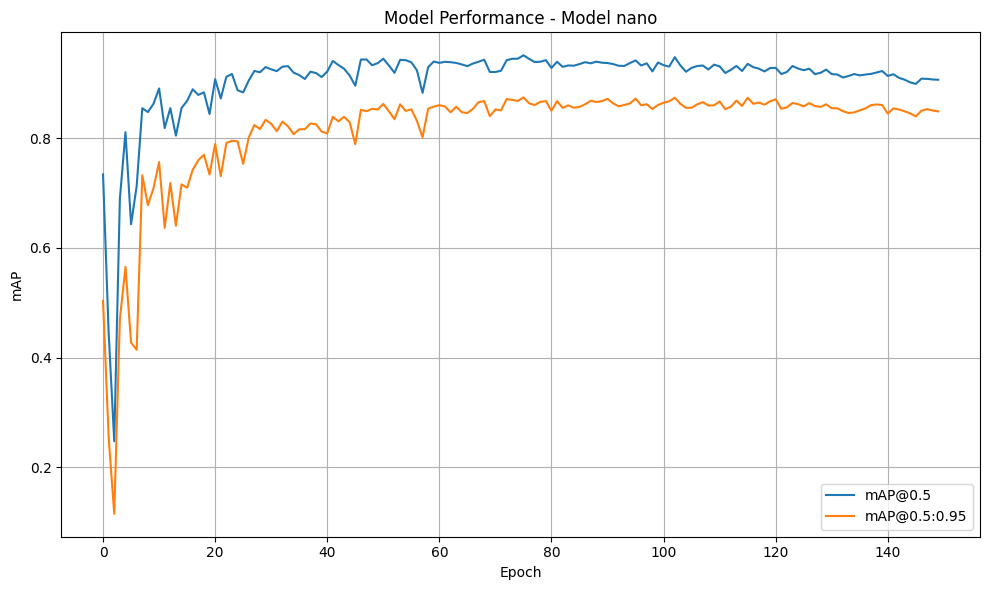

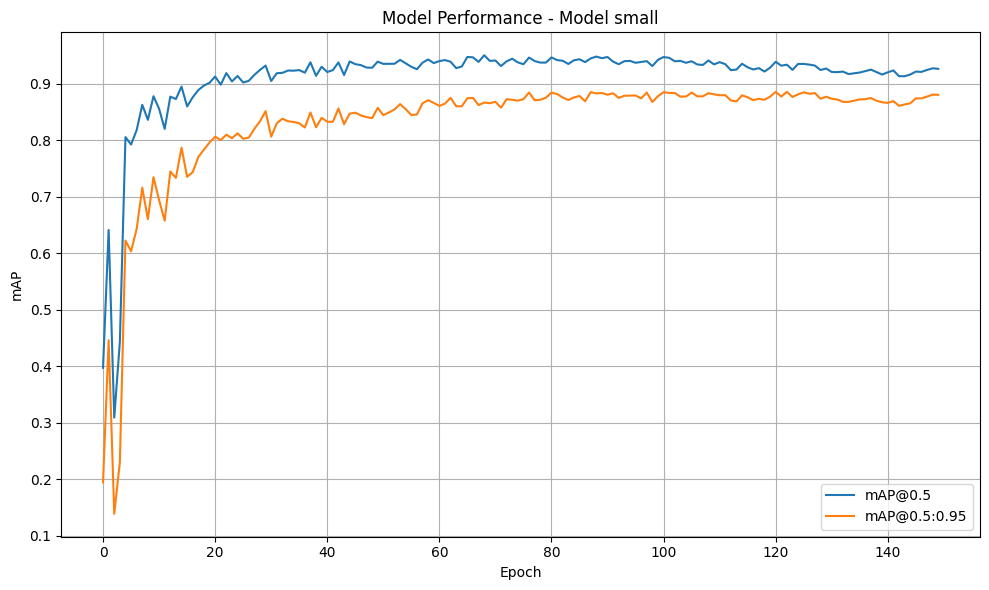

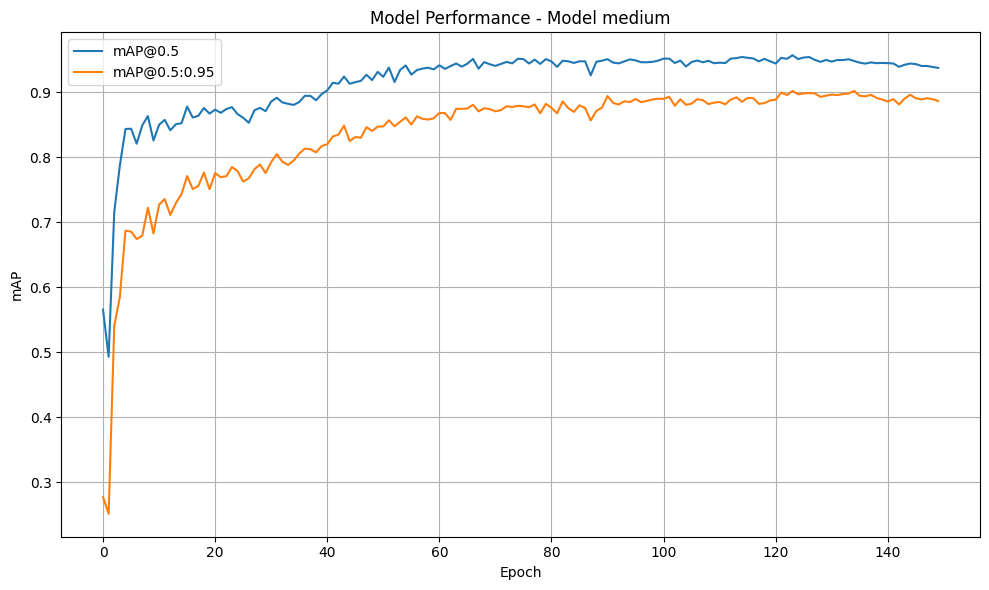

In [15]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_objectDetection_leaf_class_only}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_objectDetection_leaf_class_only}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

## Fine Tune For Detect Healthy, Rust, and Scab

In [20]:
# Path sumber dataset YOLO
image_dir = Path("dataset/object_detection/train/images")
label_dir = Path("dataset/object_detection/train/labels")

# Path target few-shot
few_shot_base = Path("dataset/few_shot")

# Mapping class ID ke nama
class_map = {0: "healthy", 1: "scab", 2: "rust"}

# Buat index gambar per class berdasarkan nama file
class_to_files = defaultdict(list)
for img_file in sorted(image_dir.glob("*.jpg")):
    filename_lower = img_file.name.lower()
    if "healthy" in filename_lower:
        cls = 0
    elif "scab" in filename_lower:
        cls = 1
    elif "rust" in filename_lower:
        cls = 2
    else:
        continue  # Skip jika tidak dikenali

    label_file = label_dir / (img_file.stem + ".txt")
    if label_file.exists():
        class_to_files[cls].append((img_file, label_file))

# Generate few-shot data
for n in [5] + list(range(10, 46, 5)):
    target_image_dir = few_shot_base / f"{n}-shot" / "images"
    target_label_dir = few_shot_base / f"{n}-shot" / "labels"
    target_image_dir.mkdir(parents=True, exist_ok=True)
    target_label_dir.mkdir(parents=True, exist_ok=True)

    for cls in class_map:
        files = class_to_files[cls][:n]  # ambil berurutan
        for img_path, label_path in files:
            shutil.copy(img_path, target_image_dir / img_path.name)
            shutil.copy(label_path, target_label_dir / label_path.name)

In [ ]:
# Variabel Global
models = ["results/object_detection_leaf_class_only/training/small/weights/best.pt"]
shots = [5] + list(range(10, 51, 5))
epochs = 50
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_few_shot = "dataset/few_shot"
project_base_few_shot = "results/few_shot"

In [5]:
for shot in shots:
    # 1. Load original YAML
    data_yaml_path = f"{data_path_few_shot}/data.yaml"
    with open(data_yaml_path, 'r') as f:
        data_yaml = yaml.safe_load(f)

    # 2. Ubah path train sesuai shot
    data_yaml['train'] = f"../{shot}-shot/images"

    # 3. Simpan YAML baru ke file sementara
    temp_yaml_path = f"{data_path_few_shot}/data-shot.yaml"
    with open(temp_yaml_path, 'w') as f:
        yaml.dump(data_yaml, f, sort_keys=False, default_flow_style=True)

    model = YOLO("results/object_detection_leaf_class_only/training/small/weights/best.pt")
    training = model.train(
        data = temp_yaml_path,
        epochs = epochs,
        imgsz=640,
        batch=batch,
        project=f"{project_base_few_shot}/training",
        name=f"{shot}-shot",
        exist_ok=True,
        # patience=25,
        # freeze=8
    )

    csv_filename = f"{project_base_few_shot}/training/summary/{shot}-shot-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data = temp_yaml_path,
        imgsz=640,
        project=f"{project_base_few_shot}/validation",
        name=f"{shot}-shot",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_few_shot}/validation/summary/{shot}-shot-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

New https://pypi.org/project/ultralytics/8.3.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=results/object_detection_leaf_class_only/training/small/weights/best.pt, momentum=0.937, mosaic=1.

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/40-shot/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<00:00, 1051.64it/s]

train: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/40-shot/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.14G reserved, 0.11G allocated, 11.75G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.837         64.26           422        (1, 3, 640, 640)                    list
     9428953       43.11         1.158         49.69         99.27        (2, 3, 640, 640)                    list
     9428953       86.21         1.747         48.99         102.2        (4, 3, 640, 640)                    list
     9428953       172.4         2.842         57.83         104.4        (8, 3, 640, 640)                    list
     9428953       344.8         4.888         94.08         147.1       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 23 for CUDA:0 7.05G/12.00G (59%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 433.0±135.0 MB/s, size: 233.7 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/40-shot/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 381.6±97.0 MB/s, size: 183.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/40-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005390625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/40-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.56G     0.4417       4.12      1.026         30        640: 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        173        314      0.125      0.206       0.14      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.92G      0.443       3.96       1.04         23        640: 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        173        314      0.136      0.251      0.143      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.96G     0.4484      2.989      1.023         26        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        173        314      0.546      0.337      0.201      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         6G     0.4771      2.507      1.045         22        640: 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]


                   all        173        314      0.549      0.477      0.263      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.04G     0.4388      2.102      1.045         17        640: 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        173        314       0.57      0.473      0.319      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.68G     0.4491      1.816      1.074         16        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]


                   all        173        314      0.603      0.473      0.364      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.71G     0.4775      1.556      1.039         28        640: 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        173        314      0.294      0.619      0.383      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.76G     0.4444      1.455      1.018         16        640: 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        173        314       0.36      0.734      0.428      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.79G     0.4753      1.363      1.047         26        640: 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]

                   all        173        314      0.407      0.743      0.458      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.83G     0.4589      1.273      1.021         24        640: 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        173        314      0.413      0.758      0.463      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.88G     0.4538      1.283      1.033         16        640: 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        173        314      0.382      0.805      0.543      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.92G     0.4019      1.092     0.9879         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        173        314      0.401      0.822      0.619      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.92G     0.4186     0.9877     0.9811         30        640: 100%|██████████| 6/6 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        173        314       0.53      0.763      0.686      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.92G     0.4081     0.9986     0.9939         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        173        314       0.65      0.754      0.688      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.92G     0.4533     0.8855      1.003         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        173        314      0.685       0.73      0.678      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.92G     0.4533     0.9067      1.023         19        640: 100%|██████████| 6/6 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        173        314      0.717      0.764      0.742      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.92G     0.4521      0.906     0.9963         21        640: 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]


                   all        173        314      0.756      0.729      0.785      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.92G     0.4149     0.8205     0.9629         20        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]

                   all        173        314      0.657      0.801      0.782      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.93G     0.4649     0.8162      1.028         14        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        173        314      0.666      0.777      0.821       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.97G     0.4102     0.7736     0.9779         21        640: 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        173        314      0.766      0.759       0.84      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.97G     0.4295     0.7011     0.9814         21        640: 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        173        314      0.811      0.744      0.848      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.97G     0.4132     0.7613      1.008         20        640: 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        173        314      0.806      0.764      0.844      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.97G     0.3953     0.6792     0.9806         15        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]


                   all        173        314      0.849      0.775      0.846      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.97G     0.4128     0.7159     0.9639         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        173        314      0.886      0.758      0.848      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.97G     0.4082     0.6392      0.975         19        640: 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        173        314       0.88      0.773      0.856      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.97G     0.3996     0.6397     0.9816         19        640: 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        173        314      0.866      0.763      0.859      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.97G     0.3781     0.6698      1.014          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        173        314      0.883      0.747      0.864      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.97G     0.3975     0.6134     0.9679         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        173        314      0.826      0.769      0.864      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.97G     0.4294      0.596     0.9765         29        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        173        314      0.862       0.75      0.859      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.97G     0.4081      0.608     0.9819         21        640: 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        173        314      0.814      0.788      0.855       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.97G     0.3945     0.5258     0.9621         23        640: 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        173        314      0.841      0.768      0.855      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.97G     0.3771     0.6087          1         14        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        173        314      0.839      0.757      0.854      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.97G     0.4221     0.5949     0.9869         16        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        173        314      0.838      0.759      0.857      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.97G     0.3902     0.5675     0.9825         26        640: 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        173        314       0.86       0.75      0.862      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.97G     0.3769     0.5748     0.9737         13        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]

                   all        173        314      0.864      0.757      0.866      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.97G      0.372     0.5723     0.9493         19        640: 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        173        314      0.885      0.751      0.869      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.97G     0.3652     0.5277      0.967         16        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        173        314       0.86      0.769      0.872      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.97G     0.3906      0.546      1.016         15        640: 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        173        314      0.881      0.755      0.872      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.97G     0.4086     0.5179     0.9966         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        173        314      0.829      0.801      0.873      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.97G     0.4096     0.6061      0.997         13        640: 100%|██████████| 6/6 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        173        314      0.904      0.737      0.873      0.816


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.97G     0.2658     0.5616     0.8901          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        173        314      0.908       0.74      0.874      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.97G     0.2952     0.5166     0.8965         14        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        173        314      0.888       0.75       0.87      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.97G     0.2399     0.4361     0.8996          6        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        173        314      0.884      0.751      0.869      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.97G     0.2699     0.4744     0.8725         15        640: 100%|██████████| 6/6 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        173        314      0.851      0.776      0.868       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.97G     0.2786     0.4593     0.8969         17        640: 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        173        314       0.86      0.769      0.867      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.97G     0.2722     0.4311     0.9298          5        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        173        314      0.896      0.758      0.867       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.97G     0.2707       0.43     0.9233          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        173        314       0.87      0.776      0.869      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.97G     0.2335     0.3517     0.8733          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        173        314       0.89      0.764       0.87      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.97G     0.2603     0.4814     0.8924          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        173        314       0.89      0.768       0.87      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.97G     0.2348     0.3404     0.8736          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        173        314      0.885      0.777      0.872      0.818



50 epochs completed in 0.043 hours.
Optimizer stripped from results/few_shot/training/40-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/40-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/40-shot/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


                   all        173        314      0.887      0.777      0.872      0.818
          leaf_healthy         52        166      0.819      0.653      0.782      0.684
             leaf_rust         62         82      0.956      0.829      0.916      0.887
             leaf_scab         59         66      0.886      0.848      0.917      0.882
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/few_shot/training/40-shot
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 404.6±97.8 MB/s, size: 238.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/test/labels.cache... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:16<00:00,  4.69it/s]


                   all       1739       3399      0.821      0.688      0.795       0.72
          leaf_healthy        426       1434      0.775      0.614      0.731      0.643
             leaf_rust        730       1202       0.81      0.752      0.832       0.74
             leaf_scab        583        763      0.878      0.698      0.821      0.778
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot/validation/40-shot
New https://pypi.org/project/ultralytics/8.3.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deter

train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/45-shot/labels... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<00:00, 1138.29it/s]

train: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/45-shot/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 2.15G reserved, 0.40G allocated, 9.46G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.847         25.61         17.29        (1, 3, 640, 640)                    list
     9428953       43.11         1.179         37.33         22.98        (2, 3, 640, 640)                    list
     9428953       86.21         1.732         41.27         35.42        (4, 3, 640, 640)                    list
     9428953       172.4         2.785          59.1         59.61        (8, 3, 640, 640)                    list
     9428953       344.8         4.817         89.33         105.2       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 20 for CUDA:0 8.44G/12.00G (70%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 386.9±92.7 MB/s, size: 186.3 KB)


train: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/45-shot/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1154.8±42.7 MB/s, size: 228.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/45-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/45-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.96G     0.4393      4.379      1.024         50        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        173        314      0.118      0.193      0.139      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.23G     0.4433      3.641      1.012         70        640: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        173        314      0.499      0.324      0.163      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.24G     0.4658      2.776       1.06         64        640: 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]

                   all        173        314      0.555      0.437      0.239      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.29G     0.4219      2.265      1.014         62        640: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]

                   all        173        314      0.572      0.416      0.282      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.33G     0.4347      1.976      1.016         72        640: 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.623      0.429      0.355      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.37G     0.4312       1.69      1.027         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        173        314      0.273      0.545      0.366       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.41G     0.4309      1.454      1.011         42        640: 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        173        314      0.362      0.753      0.405      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.41G     0.4412      1.398      1.027         52        640: 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        173        314      0.385      0.687      0.425      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.41G      0.445      1.305      1.021         53        640: 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        173        314      0.395      0.724      0.471       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.41G     0.4334      1.175     0.9884         66        640: 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.392      0.776      0.571      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.41G     0.4403      1.118      1.018         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        173        314      0.483      0.787      0.663      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.41G     0.4395      1.052      1.003         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

                   all        173        314      0.712      0.708      0.728      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.44G     0.4278      0.962     0.9993         55        640: 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.706      0.691      0.748      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.48G     0.4467     0.9149      1.006         68        640: 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        173        314      0.716      0.675      0.749      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.5G     0.4009     0.8067     0.9697         63        640: 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        173        314      0.747      0.739      0.778      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.5G     0.4267     0.7831     0.9973         54        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]

                   all        173        314      0.728       0.72      0.795       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.5G     0.4628     0.8099      1.032         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        173        314      0.716      0.743      0.816      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.5G     0.3948     0.6959      0.962         70        640: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        173        314      0.856      0.769      0.854       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.5G      0.428     0.6569     0.9819         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        173        314      0.878       0.77      0.865      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       5.5G     0.4166      0.703     0.9983         52        640: 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        173        314      0.835      0.762      0.866      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       5.5G     0.4067      0.686     0.9701         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        173        314      0.856      0.757      0.867      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.51G     0.4123     0.6835     0.9906         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        173        314      0.862      0.755      0.872      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.55G     0.4088     0.5925     0.9652         59        640: 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]

                   all        173        314       0.87      0.754      0.873      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.55G     0.4112     0.6489     0.9745         44        640: 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        173        314      0.873      0.766      0.871      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.55G     0.3952      0.567     0.9878         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        173        314      0.872      0.762       0.87       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.55G      0.396     0.5956     0.9842         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all        173        314      0.861      0.751      0.867      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.55G     0.3886     0.5769     0.9806         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.908      0.733      0.872      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.55G     0.3831     0.5851     0.9859         61        640: 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        173        314      0.915      0.746      0.874      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.55G     0.4004     0.5397     0.9743         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        173        314       0.92      0.745      0.872      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.55G     0.4011     0.5508     0.9855         73        640: 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        173        314      0.906      0.752      0.865      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.55G     0.3597     0.5589      0.951         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        173        314      0.924      0.758      0.868      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.55G     0.4094     0.5617      0.981         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        173        314      0.901      0.771      0.868      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.55G     0.3721     0.5108     0.9589         63        640: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        173        314      0.876       0.77      0.868      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.55G     0.3608     0.4759     0.9592         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        173        314      0.868      0.759      0.867       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.55G     0.3658     0.4994     0.9556         68        640: 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.882      0.772      0.873      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.55G     0.3647     0.4835     0.9436         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.35it/s]

                   all        173        314      0.881      0.787      0.885      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.55G     0.3549     0.4709     0.9547         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all        173        314      0.886      0.795       0.89       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.55G      0.355     0.5175     0.9614         46        640: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        173        314      0.898      0.794      0.895      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.55G     0.3747     0.5167     0.9877         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        173        314      0.891      0.789      0.898      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.55G     0.3591     0.4602     0.9527         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]

                   all        173        314      0.901      0.794      0.899      0.849


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.55G     0.2411     0.4543     0.8386         38        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]

                   all        173        314      0.877      0.797      0.901      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.55G     0.2474     0.4109      0.868         23        640: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all        173        314        0.9      0.781      0.898      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.55G     0.2279     0.3793     0.8387         25        640: 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

                   all        173        314      0.904      0.779      0.896      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.55G     0.2505     0.3987     0.8674         31        640: 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        173        314      0.906      0.773      0.895      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.55G     0.2267     0.3854      0.848         20        640: 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        173        314      0.895      0.782      0.893      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.55G     0.2123     0.3304     0.8442         25        640: 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]

                   all        173        314      0.897      0.781      0.892      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.55G      0.237     0.3648     0.8517         25        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        173        314      0.901      0.785      0.893      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.55G     0.2219     0.3823     0.8553         25        640: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        173        314      0.867       0.81      0.893      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.55G     0.2113     0.3159     0.8467         23        640: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]

                   all        173        314      0.882      0.805      0.893      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.55G      0.216      0.299     0.8341         29        640: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        173        314      0.886      0.797      0.893      0.833



50 epochs completed in 0.046 hours.
Optimizer stripped from results/few_shot/training/45-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/45-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/45-shot/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


                   all        173        314       0.88      0.797      0.901      0.849
          leaf_healthy         52        166       0.81      0.663      0.827      0.738
             leaf_rust         62         82      0.909      0.866      0.936       0.91
             leaf_scab         59         66       0.92      0.864       0.94        0.9
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/training/45-shot
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3733.2±1745.2 MB/s, size: 260.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/few_shot/test/labels.cache... 1739 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1739/1739 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [00:15<00:00,  5.62it/s]


                   all       1739       3399      0.799      0.701      0.805      0.737
          leaf_healthy        426       1434      0.802      0.607      0.754      0.672
             leaf_rust        730       1202       0.79      0.786      0.849      0.761
             leaf_scab        583        763      0.805      0.711      0.813      0.777
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/few_shot/validation/45-shot


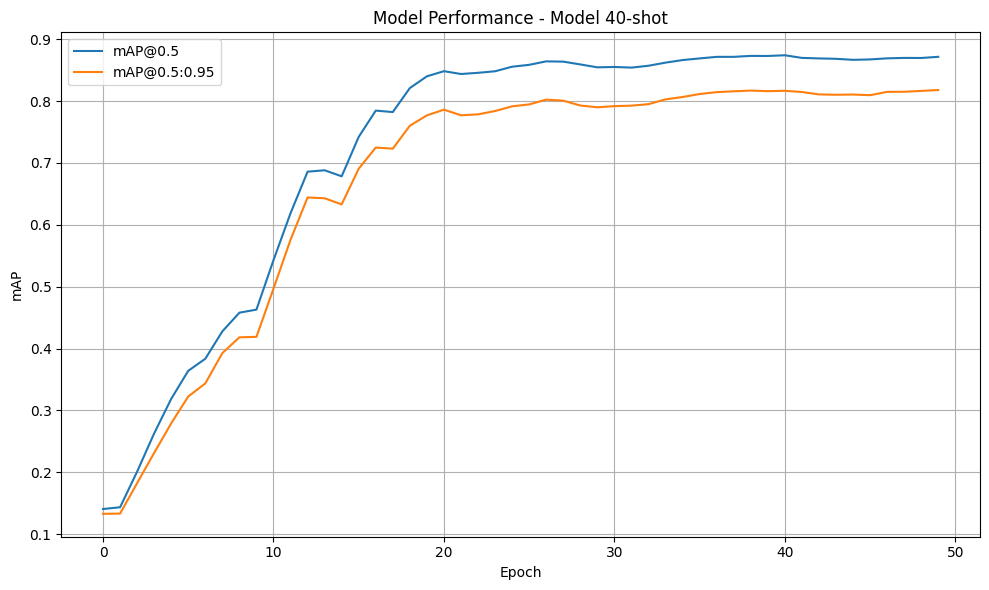

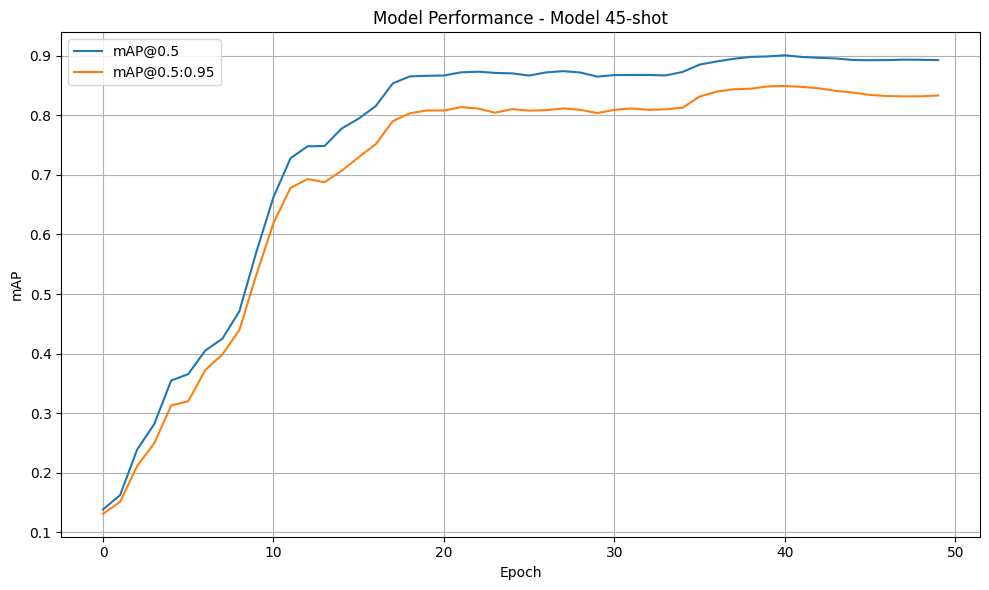

In [6]:
%matplotlib inline
for shot in shots:
    df = pd.read_csv(f"{project_base_few_shot}/training/{shot}-shot/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {shot}-shot")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_few_shot}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{shot}-shot.png"))
    plt.show()

## Perbandingan Beberapa k-query Set vs n-shot

In [ ]:
# Buat codingan untuk memisahkan query set dari 5,10,15,...,50
# Test model 5-shot ke semua query set dan bikin graphic nya, test model 10-shot, dan seterusnya.

In [10]:
# Path sumber dataset YOLO
image_dir = Path("dataset/object_detection/train/images")
label_dir = Path("dataset/object_detection/train/labels")

# Path target support-set
support_set_base = Path("dataset/support_set")

# Mapping class ID ke nama
class_map = {0: "healthy", 1: "scab", 2: "rust"}

# Buat index gambar per class berdasarkan nama file
class_to_files = defaultdict(list)
for img_file in sorted(image_dir.glob("*.jpg")):
    filename_lower = img_file.name.lower()
    if "healthy" in filename_lower:
        cls = 0
    elif "scab" in filename_lower:
        cls = 1
    elif "rust" in filename_lower:
        cls = 2
    else:
        continue  # Skip jika tidak dikenali

    label_file = label_dir / (img_file.stem + ".txt")
    if label_file.exists():
        class_to_files[cls].append((img_file, label_file))

# Generate support-set data
for n in [5] + list(range(10, 51, 5)):
    target_image_dir = support_set_base / f"{n}-images" / "images"
    target_label_dir = support_set_base / f"{n}-images" / "labels"
    target_image_dir.mkdir(parents=True, exist_ok=True)
    target_label_dir.mkdir(parents=True, exist_ok=True)

    for cls in class_map:
        files = class_to_files[cls][-n:]  # ambil n gambar terakhir
        for img_path, label_path in files:
            shutil.copy(img_path, target_image_dir / img_path.name)
            shutil.copy(label_path, target_label_dir / label_path.name)

In [ ]:
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
import shutil # Import shutil untuk operasi penghapusan folder

# Define the models to be evaluated and the test datasets
# Models trained with these 'shot' counts
lists_model_shots = [5] + list(range(10, 51, 5))
# Test datasets with these 'image' counts per class
lists_test_dataset_images = [5] + list(range(10, 51, 5))

# Dictionary to store mAP@0.5 scores for each model-test_dataset combination
# Format: {model_shot_count: {test_dataset_image_count: mAP50_score}}
all_map50_scores = {}

# Path to your original data.yaml file
data_yaml_original_path = "dataset/support_set/data.yaml"
# **MODIFIKASI DI SINI:** Temporary directory to save modified data.yaml files
# Sekarang akan disimpan di direktori yang sama dengan data_yaml_original_path
temp_data_yaml_dir = os.path.dirname(data_yaml_original_path)
# Default base directory for Ultralytics YOLO runs
yolo_runs_dir = "runs" # This is the default folder where YOLO saves validation results

# Ensure the temporary directory for YAMLs exists (though it should for support_set)
os.makedirs(temp_data_yaml_dir, exist_ok=True)

# Function to clear the runs/detect folder
def clear_yolo_runs_directory(base_dir="."):
    """
    Menghapus folder 'runs/detect' dari direktori dasar yang diberikan.
    """
    detect_run_path = os.path.join(base_dir, yolo_runs_dir, 'detect')
    if os.path.exists(detect_run_path):
        print(f"Menghapus direktori: {detect_run_path}")
        try:
            shutil.rmtree(detect_run_path)
            print(f"Direktori {detect_run_path} berhasil dihapus.")
        except OSError as e:
            print(f"Error: Gagal menghapus direktori {detect_run_path}. {e}")
    else:
        print(f"Direktori {detect_run_path} tidak ditemukan, tidak perlu dihapus.")

# --- Start of Evaluation Loop ---
# Loop through each trained model
for model_shot_count in lists_model_shots:
    print(f"\n--- Testing Model: {model_shot_count}-shot ---")

    # Clear YOLO runs directory before validating each model
    # This ensures a clean slate for each model's validation across test sets
    clear_yolo_runs_directory()

    # Initialize a dictionary to store scores for the current model
    all_map50_scores[model_shot_count] = {}

    # # Load the trained model
    model_path = f"results/few_shot/training/{model_shot_count}-shot/weights/best.pt"
    # try:
    #     model = YOLO(model_path)
    # except Exception as e:
    #     print(f"Error loading model {model_path}: {e}. Skipping this model.")
    #     continue # Skip to the next model if loading fails

    # Loop through each test dataset
    for test_image_count in lists_test_dataset_images:
        model = YOLO(model_path)
        # 1. Load the original data.yaml
        with open(data_yaml_original_path, 'r') as f:
            data_yaml = yaml.safe_load(f)

        # 2. Update the 'test' path to the current test dataset
        # This path is relative to the data.yaml itself.
        # Ensure that 'dataset/support_set' is the base for 'X-images'
        # For example, if data.yaml is in 'dataset/support_set/',
        # and images are in 'dataset/support_set/5-images/',
        # then the relative path from data.yaml to 5-images is '../5-images/images'
        # This relative path needs to be correct based on your actual file structure.
        data_yaml['test'] = f"../{test_image_count}-images/images"
        data_yaml['train'] = f"../{test_image_count}-images/images"
        data_yaml['val'] = f"../{test_image_count}-images/images"


        # 3. Save the modified YAML to a temporary file in the specified directory
        # **MODIFIKASI DI SINI:** temp_yaml_path sekarang menunjuk ke data_yaml_original_path's directory
        temp_yaml_filename = f"data_support_test_{model_shot_count}model_{test_image_count}.yaml"
        temp_yaml_path = os.path.join(temp_data_yaml_dir, temp_yaml_filename)
        with open(temp_yaml_path, 'w') as f:
            yaml.dump(data_yaml, f, sort_keys=False, default_flow_style=False)

        # 4. Perform model validation
        print(f"  Validating {model_shot_count}-shot model on {test_image_count}-images dataset...")
        try:
            # Pass the path to the newly created temporary YAML file
            print("temp_yaml_path",temp_yaml_path)
            results = model.val(data=temp_yaml_path)
            # Get mAP@0.5 score
            map50 = results.results_dict.get("metrics/mAP50(B)", 0.0)
            all_map50_scores[model_shot_count][test_image_count] = map50
            print(f"    mAP@0.5: {map50:.4f}")
        except Exception as e:
            print(f"Error validating {model_shot_count}-shot model on {test_image_count}-images: {e}")
            all_map50_scores[model_shot_count][test_image_count] = 0.0 # Set to 0 if an error occurs

        # Optional: Remove the temporary YAML file after use
        # os.rmdir("runs/")
        shutil.rmtree("runs/")


--- Testing Model: 5-shot ---
Menghapus direktori: ./runs/detect
Direktori ./runs/detect berhasil dihapus.
  Validating 5-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6860.1±1172.9 MB/s, size: 176.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


                   all         15         31      0.592      0.616      0.384      0.358
          leaf_healthy          5         20      0.531      0.848      0.749      0.694
             leaf_rust          5          6          1          0      0.156       0.13
             leaf_scab          5          5      0.246          1      0.249      0.249
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3845
  Validating 5-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 256.0±46.2 MB/s, size: 211.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 1044.03it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


                   all         30         54      0.578      0.567      0.386      0.356
          leaf_healthy         10         30      0.488        0.8      0.677      0.622
             leaf_rust         10         14          1          0      0.136      0.113
             leaf_scab         10         10      0.244        0.9      0.345      0.332
Speed: 1.3ms preprocess, 8.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3861
  Validating 5-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 351.9±52.5 MB/s, size: 178.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 1119.31it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]


                   all         45         80      0.563      0.559      0.327      0.301
          leaf_healthy         15         46      0.442      0.739      0.564      0.515
             leaf_rust         15         19          1          0      0.134      0.109
             leaf_scab         15         15      0.247      0.939      0.283      0.278
Speed: 2.1ms preprocess, 7.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3271
  Validating 5-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 358.6±52.7 MB/s, size: 183.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1106.30it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]


                   all         60        107      0.572      0.573      0.328      0.302
          leaf_healthy         20         61      0.462       0.77       0.58      0.524
             leaf_rust         20         26          1          0      0.121      0.101
             leaf_scab         20         20      0.253       0.95      0.283      0.279
Speed: 1.3ms preprocess, 6.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3280
  Validating 5-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 341.1±51.7 MB/s, size: 179.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1112.77it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]


                   all         75        132       0.57      0.575      0.324      0.296
          leaf_healthy         25         75      0.451      0.766      0.526      0.472
             leaf_rust         25         32          1          0      0.119     0.0938
             leaf_scab         25         25       0.26       0.96      0.326      0.323
Speed: 1.8ms preprocess, 5.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3237
  Validating 5-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 403.9±58.0 MB/s, size: 227.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1058.81it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]


                   all         90        156       0.57      0.571      0.322      0.292
          leaf_healthy         30         89      0.448      0.747      0.513      0.454
             leaf_rust         30         37          1          0      0.118     0.0919
             leaf_scab         30         30      0.263      0.965      0.334      0.331
Speed: 1.4ms preprocess, 6.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3217
  Validating 5-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 404.4±129.5 MB/s, size: 227.4 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<00:00, 1026.03it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]


                   all        105        182       0.56      0.557      0.318       0.29
          leaf_healthy         35        104      0.433      0.721      0.484      0.427
             leaf_rust         35         43          1          0      0.115     0.0889
             leaf_scab         35         35      0.248       0.95      0.355      0.353
Speed: 1.2ms preprocess, 5.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3183
  Validating 5-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 338.1±45.0 MB/s, size: 219.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<00:00, 1050.83it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]


                   all        120        213      0.588      0.422      0.317      0.287
          leaf_healthy         40        124      0.476      0.565      0.511      0.443
             leaf_rust         40         49          1          0      0.105     0.0835
             leaf_scab         40         40      0.287        0.7      0.336      0.334
Speed: 1.1ms preprocess, 5.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3172
  Validating 5-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 357.1±31.8 MB/s, size: 208.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<00:00, 1078.96it/s]

val: New cache created: /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.36it/s]


                   all        135        236      0.597      0.393      0.303      0.276
          leaf_healthy         45        136      0.506      0.558      0.478      0.419
             leaf_rust         45         55          1          0     0.0999     0.0819
             leaf_scab         45         45      0.286      0.622      0.331      0.327
Speed: 1.0ms preprocess, 5.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3031
  Validating 5-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_5model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5738.4±1259.1 MB/s, size: 195.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]


                   all        150        269      0.593      0.399      0.302      0.272
          leaf_healthy         50        156      0.505      0.577       0.49      0.424
             leaf_rust         50         63          1          0      0.103     0.0834
             leaf_scab         50         50      0.274       0.62      0.313       0.31
Speed: 0.8ms preprocess, 5.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.3019

--- Testing Model: 10-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 10-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3251.6±908.4 MB/s, size: 241.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


                   all         15         31      0.451      0.928      0.663      0.637
          leaf_healthy          5         20      0.756       0.95      0.892      0.812
             leaf_rust          5          6      0.308      0.833       0.47       0.47
             leaf_scab          5          5      0.288          1      0.628      0.628
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6635
  Validating 10-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3289.8±1376.9 MB/s, size: 190.4 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


                   all         30         54      0.429      0.891      0.669       0.63
          leaf_healthy         10         30      0.615      0.959      0.824      0.745
             leaf_rust         10         14      0.373      0.714      0.536      0.514
             leaf_scab         10         10        0.3          1      0.648       0.63
Speed: 1.3ms preprocess, 7.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6691
  Validating 10-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2877.8±578.1 MB/s, size: 194.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]


                   all         45         80       0.42      0.913      0.652      0.617
          leaf_healthy         15         46      0.627      0.949      0.843      0.764
             leaf_rust         15         19      0.337      0.789      0.465      0.451
             leaf_scab         15         15      0.298          1      0.649      0.636
Speed: 1.7ms preprocess, 6.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6522
  Validating 10-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2730.2±388.0 MB/s, size: 214.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]


                   all         60        107      0.401      0.894      0.647      0.614
          leaf_healthy         20         61      0.627      0.951      0.869      0.794
             leaf_rust         20         26      0.293      0.731       0.47      0.457
             leaf_scab         20         20      0.282          1      0.601      0.592
Speed: 1.9ms preprocess, 4.8ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6468
  Validating 10-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4647.5±1558.6 MB/s, size: 228.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]


                   all         75        132      0.408      0.905      0.673      0.639
          leaf_healthy         25         75      0.636      0.933      0.869      0.792
             leaf_rust         25         32        0.3      0.781       0.52      0.506
             leaf_scab         25         25      0.288          1      0.629       0.62
Speed: 1.4ms preprocess, 5.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6727
  Validating 10-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4310.8±1590.6 MB/s, size: 263.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.58it/s]


                   all         90        156      0.402      0.905       0.67      0.635
          leaf_healthy         30         89      0.627      0.933      0.871      0.794
             leaf_rust         30         37      0.286      0.784      0.529      0.512
             leaf_scab         30         30      0.294          1       0.61      0.599
Speed: 1.3ms preprocess, 5.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6700
  Validating 10-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5294.5±1371.0 MB/s, size: 171.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]


                   all        105        182      0.406      0.889      0.667      0.635
          leaf_healthy         35        104      0.621      0.923      0.863      0.791
             leaf_rust         35         43      0.301      0.744      0.545      0.531
             leaf_scab         35         35      0.297          1      0.594      0.584
Speed: 1.2ms preprocess, 5.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6673
  Validating 10-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3366.4±1593.2 MB/s, size: 181.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.00it/s]


                   all        120        213      0.406      0.891      0.646      0.615
          leaf_healthy         40        124      0.611      0.919      0.853       0.78
             leaf_rust         40         49       0.31      0.755       0.49      0.479
             leaf_scab         40         40      0.296          1      0.595      0.586
Speed: 1.1ms preprocess, 6.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6459
  Validating 10-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4485.8±1771.3 MB/s, size: 189.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.31it/s]


                   all        135        236      0.395      0.895       0.63        0.6
          leaf_healthy         45        136      0.594      0.925      0.849      0.778
             leaf_rust         45         55      0.296      0.782      0.488      0.477
             leaf_scab         45         45      0.294      0.978      0.554      0.545
Speed: 1.3ms preprocess, 6.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6300
  Validating 10-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_10model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4466.3±1760.3 MB/s, size: 218.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.36it/s]


                   all        150        269      0.396      0.891      0.623      0.593
          leaf_healthy         50        156      0.603      0.916      0.855      0.783
             leaf_rust         50         63      0.297      0.778      0.476      0.465
             leaf_scab         50         50      0.289       0.98      0.538       0.53
Speed: 0.8ms preprocess, 6.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.6226

--- Testing Model: 15-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 15-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2893.0±231.4 MB/s, size: 227.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


                   all         15         31      0.889      0.906      0.944      0.916
          leaf_healthy          5         20      0.885       0.85      0.891      0.804
             leaf_rust          5          6      0.838      0.869      0.948      0.948
             leaf_scab          5          5      0.944          1      0.995      0.995
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9445
  Validating 15-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3673.0±1501.5 MB/s, size: 157.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


                   all         30         54      0.854      0.876      0.918      0.885
          leaf_healthy         10         30      0.789        0.9      0.857      0.782
             leaf_rust         10         14      0.911      0.729      0.919      0.896
             leaf_scab         10         10      0.861          1      0.977      0.977
Speed: 0.2ms preprocess, 8.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9176
  Validating 15-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5024.2±1591.9 MB/s, size: 214.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]


                   all         45         80      0.816      0.886      0.911      0.878
          leaf_healthy         15         46      0.801      0.874      0.866      0.783
             leaf_rust         15         19      0.881      0.783      0.917      0.899
             leaf_scab         15         15      0.765          1       0.95       0.95
Speed: 1.9ms preprocess, 6.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9111
  Validating 15-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3491.3±1291.7 MB/s, size: 204.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]


                   all         60        107      0.843       0.89      0.934        0.9
          leaf_healthy         20         61      0.822      0.909      0.894      0.814
             leaf_rust         20         26      0.908       0.76      0.939      0.919
             leaf_scab         20         20      0.798          1      0.968      0.968
Speed: 2.1ms preprocess, 5.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9337
  Validating 15-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3777.0±965.9 MB/s, size: 247.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


                   all         75        132      0.842       0.88      0.936      0.903
          leaf_healthy         25         75      0.835      0.853      0.887      0.809
             leaf_rust         25         32      0.926      0.787      0.946      0.926
             leaf_scab         25         25      0.765          1      0.974      0.974
Speed: 1.5ms preprocess, 4.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9356
  Validating 15-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4476.7±1312.8 MB/s, size: 202.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]


                   all         90        156      0.854      0.889      0.938      0.902
          leaf_healthy         30         89       0.84      0.854      0.881      0.799
             leaf_rust         30         37      0.938      0.814      0.952      0.926
             leaf_scab         30         30      0.784          1       0.98       0.98
Speed: 1.3ms preprocess, 4.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9379
  Validating 15-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4187.2±1661.7 MB/s, size: 217.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


                   all        105        182       0.85      0.888      0.928      0.893
          leaf_healthy         35        104      0.841      0.846      0.882      0.803
             leaf_rust         35         43      0.921      0.819      0.918      0.892
             leaf_scab         35         35      0.789          1      0.984      0.984
Speed: 1.1ms preprocess, 5.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9283
  Validating 15-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5204.3±2537.1 MB/s, size: 197.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]


                   all        120        213      0.828      0.866      0.901      0.868
          leaf_healthy         40        124      0.818      0.847      0.871      0.795
             leaf_rust         40         49      0.905      0.776      0.866      0.844
             leaf_scab         40         40      0.762      0.975      0.966      0.966
Speed: 1.0ms preprocess, 5.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9011
  Validating 15-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5380.9±1050.5 MB/s, size: 254.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]


                   all        135        236      0.827      0.854      0.898      0.865
          leaf_healthy         45        136      0.807      0.846      0.857      0.786
             leaf_rust         45         55      0.915      0.784       0.88      0.858
             leaf_scab         45         45       0.76      0.933      0.956      0.952
Speed: 1.0ms preprocess, 5.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.8976
  Validating 15-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_15model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4400.1±1474.0 MB/s, size: 212.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]


                   all        150        269      0.811      0.855      0.892      0.859
          leaf_healthy         50        156      0.811      0.855      0.864      0.791
             leaf_rust         50         63      0.892       0.79      0.872      0.849
             leaf_scab         50         50      0.729       0.92       0.94      0.936
Speed: 0.9ms preprocess, 5.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.8921

--- Testing Model: 20-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 20-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2378.8±443.3 MB/s, size: 256.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


                   all         15         31      0.918      0.961      0.974       0.95
          leaf_healthy          5         20      0.873        0.9      0.933      0.859
             leaf_rust          5          6          1      0.983      0.995      0.995
             leaf_scab          5          5      0.882          1      0.995      0.995
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9742
  Validating 20-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5982.6±1338.3 MB/s, size: 205.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


                   all         30         54      0.886      0.897       0.96      0.935
          leaf_healthy         10         30      0.798      0.923      0.927      0.867
             leaf_rust         10         14          1      0.768      0.958      0.942
             leaf_scab         10         10      0.858          1      0.995      0.995
Speed: 1.2ms preprocess, 3.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9599
  Validating 20-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3906.0±1893.8 MB/s, size: 182.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]


                   all         45         80      0.857      0.906      0.956      0.934
          leaf_healthy         15         46      0.792      0.935      0.915      0.859
             leaf_rust         15         19          1      0.783      0.975      0.963
             leaf_scab         15         15      0.778          1      0.979      0.979
Speed: 1.7ms preprocess, 4.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9562
  Validating 20-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3870.8±1124.7 MB/s, size: 200.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]


                   all         60        107      0.872      0.905      0.965      0.943
          leaf_healthy         20         61      0.825      0.951      0.935      0.882
             leaf_rust         20         26          1      0.764      0.979      0.967
             leaf_scab         20         20      0.791          1      0.981      0.981
Speed: 2.2ms preprocess, 6.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9652
  Validating 20-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3669.3±1102.7 MB/s, size: 234.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


                   all         75        132      0.885      0.891      0.964       0.94
          leaf_healthy         25         75      0.846      0.882      0.928      0.874
             leaf_rust         25         32          1      0.792      0.981      0.963
             leaf_scab         25         25       0.81          1      0.984      0.984
Speed: 1.6ms preprocess, 5.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9644
  Validating 20-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4598.3±1557.3 MB/s, size: 173.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]


                   all         90        156       0.89      0.899      0.965      0.939
          leaf_healthy         30         89      0.848      0.876      0.929      0.876
             leaf_rust         30         37          1      0.819      0.979      0.955
             leaf_scab         30         30      0.822          1      0.987      0.987
Speed: 1.3ms preprocess, 6.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9649
  Validating 20-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5014.9±1446.0 MB/s, size: 164.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]


                   all        105        182      0.899      0.887      0.956       0.93
          leaf_healthy         35        104      0.842       0.87      0.927      0.877
             leaf_rust         35         43          1      0.819      0.958      0.933
             leaf_scab         35         35      0.855      0.971      0.982      0.982
Speed: 1.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9555
  Validating 20-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4843.9±1931.9 MB/s, size: 204.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]


                   all        120        213      0.893       0.87      0.945       0.92
          leaf_healthy         40        124      0.836      0.863      0.921      0.867
             leaf_rust         40         49      0.995      0.796      0.936      0.914
             leaf_scab         40         40       0.85       0.95      0.978      0.978
Speed: 1.0ms preprocess, 5.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9449
  Validating 20-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4709.4±1865.0 MB/s, size: 185.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]


                   all        135        236      0.883      0.871      0.939      0.915
          leaf_healthy         45        136      0.818      0.859      0.895      0.844
             leaf_rust         45         55      0.993        0.8      0.948      0.927
             leaf_scab         45         45      0.838      0.956      0.972      0.972
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9385
  Validating 20-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_20model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4507.1±2105.3 MB/s, size: 187.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.35it/s]


                   all        150        269       0.89      0.879      0.942      0.916
          leaf_healthy         50        156      0.829      0.868      0.901      0.844
             leaf_rust         50         63      0.993       0.81      0.952      0.929
             leaf_scab         50         50      0.848       0.96      0.973      0.973
Speed: 0.8ms preprocess, 5.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9420

--- Testing Model: 25-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 25-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3949.8±1212.8 MB/s, size: 238.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


                   all         15         31      0.801      0.957      0.976      0.951
          leaf_healthy          5         20      0.899       0.89      0.962      0.887
             leaf_rust          5          6      0.854       0.98      0.972      0.972
             leaf_scab          5          5      0.651          1      0.995      0.995
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9764
  Validating 25-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4170.8±1212.9 MB/s, size: 185.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         30         54       0.92      0.845      0.951      0.927
          leaf_healthy         10         30      0.919      0.758      0.928      0.859
             leaf_rust         10         14          1      0.776      0.931      0.927
             leaf_scab         10         10       0.84          1      0.995      0.995
Speed: 1.3ms preprocess, 6.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9512
  Validating 25-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3819.4±1191.2 MB/s, size: 232.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all         45         80      0.882      0.846      0.937      0.912
          leaf_healthy         15         46      0.921      0.757      0.904      0.831
             leaf_rust         15         19          1       0.78       0.95      0.948
             leaf_scab         15         15      0.725          1      0.958      0.957
Speed: 0.9ms preprocess, 6.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9372
  Validating 25-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3224.5±1243.2 MB/s, size: 212.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]


                   all         60        107      0.864      0.874      0.954      0.928
          leaf_healthy         20         61      0.867      0.803      0.926      0.856
             leaf_rust         20         26          1      0.819      0.966      0.957
             leaf_scab         20         20      0.725          1      0.971      0.971
Speed: 2.0ms preprocess, 7.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9542
  Validating 25-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4706.2±1979.8 MB/s, size: 208.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]


                   all         75        132      0.895      0.856      0.952      0.927
          leaf_healthy         25         75      0.935      0.768      0.919      0.853
             leaf_rust         25         32          1      0.801       0.96       0.95
             leaf_scab         25         25       0.75          1      0.978      0.978
Speed: 1.8ms preprocess, 6.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9525
  Validating 25-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4862.1±1303.9 MB/s, size: 181.4 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]


                   all         90        156      0.901      0.866      0.957      0.931
          leaf_healthy         30         89       0.92      0.771      0.921      0.858
             leaf_rust         30         37          1      0.828      0.969      0.955
             leaf_scab         30         30      0.783          1      0.981      0.981
Speed: 1.4ms preprocess, 6.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9570
  Validating 25-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3065.5±667.1 MB/s, size: 225.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]


                   all        105        182      0.903      0.867      0.951      0.925
          leaf_healthy         35        104       0.92      0.773      0.919      0.856
             leaf_rust         35         43          1      0.829      0.949      0.935
             leaf_scab         35         35      0.789          1      0.984      0.984
Speed: 1.3ms preprocess, 5.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9505
  Validating 25-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3544.2±1753.3 MB/s, size: 278.4 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


                   all        120        213      0.903       0.86      0.943      0.916
          leaf_healthy         40        124      0.914       0.77      0.916       0.85
             leaf_rust         40         49          1      0.809      0.929      0.916
             leaf_scab         40         40      0.795          1      0.983      0.983
Speed: 1.0ms preprocess, 5.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9426
  Validating 25-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5739.7±1897.3 MB/s, size: 188.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.62it/s]


                   all        135        236      0.906      0.864      0.944      0.918
          leaf_healthy         45        136      0.906      0.777      0.908      0.847
             leaf_rust         45         55          1      0.815      0.941      0.925
             leaf_scab         45         45      0.812          1      0.982      0.982
Speed: 0.9ms preprocess, 5.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9437
  Validating 25-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_25model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3104.3±657.0 MB/s, size: 225.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]


                   all        150        269      0.913      0.868      0.947       0.92
          leaf_healthy         50        156       0.91       0.78      0.911      0.848
             leaf_rust         50         63          1      0.823      0.948      0.928
             leaf_scab         50         50      0.828          1      0.983      0.983
Speed: 0.9ms preprocess, 5.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9475

--- Testing Model: 30-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 30-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5037.7±2683.4 MB/s, size: 186.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


                   all         15         31      0.948      0.941      0.975      0.953
          leaf_healthy          5         20          1      0.824      0.936      0.868
             leaf_rust          5          6       0.95          1      0.995      0.995
             leaf_scab          5          5      0.893          1      0.995      0.995
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9754
  Validating 30-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3228.9±1541.9 MB/s, size: 209.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


                   all         30         54      0.932      0.916      0.957       0.93
          leaf_healthy         10         30      0.862      0.833      0.885      0.835
             leaf_rust         10         14          1      0.917       0.99      0.975
             leaf_scab         10         10      0.933          1      0.995      0.982
Speed: 1.2ms preprocess, 6.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9568
  Validating 30-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4838.4±1860.0 MB/s, size: 204.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]


                   all         45         80      0.904      0.918      0.963      0.935
          leaf_healthy         15         46      0.828      0.826        0.9      0.836
             leaf_rust         15         19          1      0.929      0.993      0.981
             leaf_scab         15         15      0.882          1      0.995      0.987
Speed: 1.8ms preprocess, 4.7ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9626
  Validating 30-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3855.3±1091.3 MB/s, size: 181.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]


                   all         60        107      0.942      0.905      0.968      0.942
          leaf_healthy         20         61      0.907      0.836       0.92      0.857
             leaf_rust         20         26          1       0.88      0.989      0.982
             leaf_scab         20         20       0.92          1      0.995      0.988
Speed: 2.0ms preprocess, 5.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9683
  Validating 30-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5498.5±2373.3 MB/s, size: 275.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]


                   all         75        132      0.938      0.909       0.97      0.944
          leaf_healthy         25         75      0.923      0.827      0.927      0.865
             leaf_rust         25         32          1      0.901      0.987      0.976
             leaf_scab         25         25      0.891          1      0.995      0.989
Speed: 1.7ms preprocess, 4.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9696
  Validating 30-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3779.2±1357.1 MB/s, size: 168.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]


                   all         90        156      0.928      0.916      0.971      0.944
          leaf_healthy         30         89      0.908      0.831       0.93      0.868
             leaf_rust         30         37          1      0.916      0.989      0.973
             leaf_scab         30         30      0.878          1      0.995      0.991
Speed: 1.3ms preprocess, 4.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9712
  Validating 30-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4240.4±1345.1 MB/s, size: 178.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]


                   all        105        182      0.937      0.885      0.964      0.938
          leaf_healthy         35        104       0.92       0.77      0.932      0.872
             leaf_rust         35         43      0.982      0.884      0.965      0.951
             leaf_scab         35         35       0.91          1      0.995      0.992
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9641
  Validating 30-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4812.5±2884.6 MB/s, size: 264.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]


                   all        120        213      0.922      0.874       0.95      0.924
          leaf_healthy         40        124       0.88      0.768      0.915      0.854
             leaf_rust         40         49      0.983      0.878      0.947      0.935
             leaf_scab         40         40      0.904      0.975      0.988      0.985
Speed: 1.1ms preprocess, 4.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9500
  Validating 30-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3370.1±1553.6 MB/s, size: 202.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.25it/s]


                   all        135        236      0.924      0.885      0.948      0.922
          leaf_healthy         45        136      0.877      0.786      0.898      0.837
             leaf_rust         45         55      0.983      0.891      0.957      0.946
             leaf_scab         45         45      0.912      0.978      0.988      0.983
Speed: 0.9ms preprocess, 5.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9476
  Validating 30-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_30model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3569.7±1322.7 MB/s, size: 199.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


                   all        150        269      0.928      0.889      0.948      0.921
          leaf_healthy         50        156      0.878      0.781      0.897      0.837
             leaf_rust         50         63      0.986      0.905      0.959      0.943
             leaf_scab         50         50       0.92       0.98      0.987      0.982
Speed: 0.6ms preprocess, 5.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9476

--- Testing Model: 35-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 35-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3942.9±1258.0 MB/s, size: 233.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


                   all         15         31      0.847      0.927      0.958      0.933
          leaf_healthy          5         20      0.856      0.892      0.906      0.832
             leaf_rust          5          6      0.841      0.887      0.972      0.972
             leaf_scab          5          5      0.845          1      0.995      0.995
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9578
  Validating 35-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4966.2±1303.9 MB/s, size: 166.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         30         54      0.957      0.835      0.961      0.913
          leaf_healthy         10         30      0.936        0.7       0.91      0.843
             leaf_rust         10         14          1      0.806      0.978      0.915
             leaf_scab         10         10      0.935          1      0.995      0.982
Speed: 1.2ms preprocess, 6.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9608
  Validating 35-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4094.1±1598.7 MB/s, size: 168.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]


                   all         45         80      0.947      0.849      0.959      0.921
          leaf_healthy         15         46      0.914      0.693      0.904      0.844
             leaf_rust         15         19          1      0.856      0.977      0.933
             leaf_scab         15         15      0.928          1      0.995      0.987
Speed: 1.8ms preprocess, 4.7ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9589
  Validating 35-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5531.8±2031.9 MB/s, size: 190.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]


                   all         60        107      0.953      0.859      0.963       0.93
          leaf_healthy         20         61      0.917      0.721      0.925      0.866
             leaf_rust         20         26          1      0.857      0.968      0.936
             leaf_scab         20         20      0.943          1      0.995      0.989
Speed: 2.0ms preprocess, 6.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9629
  Validating 35-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4841.4±1421.3 MB/s, size: 155.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


                   all         75        132      0.961      0.863      0.963      0.931
          leaf_healthy         25         75       0.93      0.706      0.924      0.867
             leaf_rust         25         32          1      0.883      0.971      0.934
             leaf_scab         25         25      0.953          1      0.995       0.99
Speed: 1.5ms preprocess, 5.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9634
  Validating 35-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5172.4±2271.0 MB/s, size: 252.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]


                   all         90        156      0.907      0.925      0.966      0.933
          leaf_healthy         30         89      0.845      0.857      0.929      0.869
             leaf_rust         30         37      0.989      0.919      0.974      0.938
             leaf_scab         30         30      0.886          1      0.995      0.991
Speed: 1.4ms preprocess, 6.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9660
  Validating 35-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4086.5±1361.4 MB/s, size: 209.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]


                   all        105        182      0.951      0.883      0.958      0.922
          leaf_healthy         35        104      0.919       0.76      0.924      0.862
             leaf_rust         35         43      0.975      0.891      0.954      0.913
             leaf_scab         35         35      0.961          1      0.995      0.992
Speed: 1.2ms preprocess, 6.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9576
  Validating 35-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2956.6±1188.3 MB/s, size: 199.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]


                   all        120        213      0.941      0.867       0.94      0.901
          leaf_healthy         40        124      0.881      0.742      0.894      0.818
             leaf_rust         40         49      0.977      0.884      0.936      0.898
             leaf_scab         40         40      0.964      0.975       0.99      0.988
Speed: 1.1ms preprocess, 6.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9403
  Validating 35-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3775.6±1343.1 MB/s, size: 205.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]


                   all        135        236      0.936      0.869      0.938      0.899
          leaf_healthy         45        136      0.861       0.75      0.877      0.805
             leaf_rust         45         55       0.98      0.879      0.946       0.91
             leaf_scab         45         45      0.968      0.978      0.991      0.982
Speed: 0.9ms preprocess, 5.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9378
  Validating 35-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_35model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5235.2±2881.6 MB/s, size: 185.4 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]


                   all        150        269       0.94       0.86      0.939      0.902
          leaf_healthy         50        156      0.864       0.73      0.877      0.808
             leaf_rust         50         63      0.982      0.871       0.95      0.917
             leaf_scab         50         50      0.976       0.98      0.991      0.982
Speed: 0.8ms preprocess, 5.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9391

--- Testing Model: 40-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 40-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4102.7±1413.9 MB/s, size: 229.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


                   all         15         31      0.951      0.916      0.963      0.938
          leaf_healthy          5         20      0.937      0.749      0.898      0.823
             leaf_rust          5          6      0.994          1      0.995      0.995
             leaf_scab          5          5      0.923          1      0.995      0.995
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9625
  Validating 40-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4004.7±1572.8 MB/s, size: 202.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


                   all         30         54       0.97      0.875      0.955      0.926
          leaf_healthy         10         30      0.957      0.767      0.911      0.851
             leaf_rust         10         14      0.996      0.857      0.959      0.956
             leaf_scab         10         10      0.957          1      0.995      0.971
Speed: 1.3ms preprocess, 6.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9550
  Validating 40-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4368.0±1723.1 MB/s, size: 179.3 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


                   all         45         80      0.945      0.878      0.952      0.923
          leaf_healthy         15         46      0.918      0.739      0.894      0.837
             leaf_rust         15         19      0.997      0.895      0.966      0.964
             leaf_scab         15         15      0.919          1      0.995      0.968
Speed: 2.4ms preprocess, 5.2ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9517
  Validating 40-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3352.7±1270.5 MB/s, size: 200.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]


                   all         60        107      0.941      0.901      0.956      0.928
          leaf_healthy         20         61       0.91       0.82      0.924      0.866
             leaf_rust         20         26      0.984      0.885      0.949      0.942
             leaf_scab         20         20      0.929          1      0.995      0.975
Speed: 1.9ms preprocess, 6.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9559
  Validating 40-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4338.5±1767.8 MB/s, size: 207.4 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]


                   all         75        132       0.94      0.902      0.957       0.93
          leaf_healthy         25         75      0.924        0.8      0.924      0.867
             leaf_rust         25         32      0.987      0.906      0.952      0.944
             leaf_scab         25         25      0.908          1      0.995      0.979
Speed: 1.6ms preprocess, 4.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9571
  Validating 40-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4818.9±2148.9 MB/s, size: 186.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]


                   all         90        156      0.934      0.902      0.954      0.926
          leaf_healthy         30         89       0.91      0.787      0.911      0.854
             leaf_rust         30         37      0.988      0.919      0.956      0.942
             leaf_scab         30         30      0.905          1      0.995      0.982
Speed: 1.2ms preprocess, 5.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9541
  Validating 40-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3918.4±1441.7 MB/s, size: 194.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


                   all        105        182      0.952      0.902      0.953      0.925
          leaf_healthy         35        104      0.934      0.798      0.925      0.865
             leaf_rust         35         43      0.995      0.907       0.94      0.925
             leaf_scab         35         35      0.926          1      0.995      0.984
Speed: 1.1ms preprocess, 4.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9531
  Validating 40-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3916.0±1669.5 MB/s, size: 214.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]


                   all        120        213      0.943      0.893      0.936      0.906
          leaf_healthy         40        124      0.901      0.806      0.898      0.834
             leaf_rust         40         49      0.995      0.898      0.923      0.908
             leaf_scab         40         40      0.933      0.975      0.987      0.976
Speed: 1.0ms preprocess, 5.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9359
  Validating 40-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3140.9±1187.3 MB/s, size: 176.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.60it/s]


                   all        135        236      0.938      0.899      0.935      0.906
          leaf_healthy         45        136       0.88      0.809      0.885      0.825
             leaf_rust         45         55      0.995      0.909      0.933      0.919
             leaf_scab         45         45       0.94      0.978      0.987      0.974
Speed: 1.0ms preprocess, 5.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9348
  Validating 40-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_40model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4334.1±1808.3 MB/s, size: 170.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]


                   all        150        269      0.942      0.897      0.938      0.908
          leaf_healthy         50        156      0.882      0.808      0.889       0.83
             leaf_rust         50         63      0.997      0.905      0.939      0.922
             leaf_scab         50         50      0.946       0.98      0.986      0.972
Speed: 0.8ms preprocess, 4.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9381

--- Testing Model: 45-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 45-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3315.6±717.5 MB/s, size: 221.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


                   all         15         31      0.919      0.905      0.974      0.954
          leaf_healthy          5         20      0.935      0.715      0.932      0.873
             leaf_rust          5          6       0.89          1      0.995      0.995
             leaf_scab          5          5      0.934          1      0.995      0.995
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9740
  Validating 45-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3643.9±1514.6 MB/s, size: 221.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


                   all         30         54      0.942      0.878      0.956      0.929
          leaf_healthy         10         30      0.921      0.778       0.93      0.876
             leaf_rust         10         14      0.942      0.857      0.943      0.932
             leaf_scab         10         10      0.963          1      0.995       0.98
Speed: 1.2ms preprocess, 5.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9561
  Validating 45-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3487.3±1233.6 MB/s, size: 207.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]


                   all         45         80      0.942      0.878      0.958      0.933
          leaf_healthy         15         46      0.942      0.739      0.922      0.863
             leaf_rust         15         19      0.964      0.895      0.958       0.95
             leaf_scab         15         15       0.92          1      0.995      0.985
Speed: 1.8ms preprocess, 4.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9584
  Validating 45-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3544.6±1845.0 MB/s, size: 212.1 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]


                   all         60        107       0.95       0.88       0.96      0.935
          leaf_healthy         20         61      0.951      0.754      0.939      0.878
             leaf_rust         20         26      0.971      0.885      0.944      0.938
             leaf_scab         20         20      0.928          1      0.995      0.988
Speed: 2.0ms preprocess, 4.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9596
  Validating 45-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4332.0±1553.4 MB/s, size: 215.4 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


                   all         75        132      0.953      0.894      0.962      0.936
          leaf_healthy         25         75      0.951      0.775       0.94       0.88
             leaf_rust         25         32      0.971      0.906       0.95      0.939
             leaf_scab         25         25      0.937          1      0.995      0.989
Speed: 1.6ms preprocess, 5.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9615
  Validating 45-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4475.3±1511.2 MB/s, size: 207.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]


                   all         90        156      0.952      0.903      0.963      0.939
          leaf_healthy         30         89      0.934      0.791      0.938       0.88
             leaf_rust         30         37      0.975      0.919      0.958      0.948
             leaf_scab         30         30      0.946          1      0.995       0.99
Speed: 1.4ms preprocess, 5.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9634
  Validating 45-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5463.1±1623.9 MB/s, size: 192.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]


                   all        105        182      0.947      0.898      0.959      0.934
          leaf_healthy         35        104      0.932      0.787       0.94      0.881
             leaf_rust         35         43      0.954      0.907      0.942      0.929
             leaf_scab         35         35      0.954          1      0.994      0.991
Speed: 1.2ms preprocess, 5.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9589
  Validating 45-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4530.2±1637.9 MB/s, size: 234.8 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]


                   all        120        213      0.933      0.884      0.944      0.919
          leaf_healthy         40        124      0.882       0.78      0.918      0.858
             leaf_rust         40         49      0.959      0.898      0.924      0.913
             leaf_scab         40         40      0.959      0.975      0.991      0.987
Speed: 1.0ms preprocess, 5.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9445
  Validating 45-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4625.9±1896.4 MB/s, size: 168.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.92it/s]


                   all        135        236      0.929      0.893      0.944       0.92
          leaf_healthy         45        136      0.871      0.792      0.909      0.851
             leaf_rust         45         55      0.951      0.909      0.934      0.924
             leaf_scab         45         45      0.964      0.978       0.99      0.985
Speed: 0.9ms preprocess, 4.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9443
  Validating 45-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_45model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4419.3±1774.4 MB/s, size: 235.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]


                   all        150        269      0.937      0.892      0.945      0.919
          leaf_healthy         50        156      0.883      0.775      0.903      0.843
             leaf_rust         50         63      0.958      0.921      0.943       0.93
             leaf_scab         50         50      0.971       0.98       0.99      0.985
Speed: 0.8ms preprocess, 6.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9454

--- Testing Model: 50-shot ---
Direktori ./runs/detect tidak ditemukan, tidak perlu dihapus.
  Validating 50-shot model on 5-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_5.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3560.1±1297.5 MB/s, size: 211.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/5-images/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


                   all         15         31      0.912      0.932      0.969      0.951
          leaf_healthy          5         20       0.85        0.8      0.916      0.862
             leaf_rust          5          6          1      0.995      0.995      0.995
             leaf_scab          5          5      0.885          1      0.995      0.995
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9687
  Validating 50-shot model on 10-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_10.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3844.4±1264.9 MB/s, size: 173.0 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/10-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


                   all         30         54      0.922      0.929      0.951      0.922
          leaf_healthy         10         30      0.837      0.867      0.912      0.864
             leaf_rust         10         14          1       0.92      0.946       0.92
             leaf_scab         10         10      0.928          1      0.995      0.981
Speed: 1.3ms preprocess, 7.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9511
  Validating 50-shot model on 15-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_15.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3881.6±1223.6 MB/s, size: 180.6 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/15-images/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]


                   all         45         80      0.923      0.922       0.95      0.923
          leaf_healthy         15         46      0.825      0.826      0.897      0.843
             leaf_rust         15         19          1      0.941      0.959       0.94
             leaf_scab         15         15      0.943          1      0.995      0.986
Speed: 2.7ms preprocess, 5.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9502
  Validating 50-shot model on 20-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_20.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3329.7±952.7 MB/s, size: 258.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/20-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]


                   all         60        107      0.936      0.923      0.955      0.926
          leaf_healthy         20         61      0.852      0.852      0.926      0.869
             leaf_rust         20         26          1      0.918      0.943      0.922
             leaf_scab         20         20      0.956          1      0.995      0.988
Speed: 2.4ms preprocess, 4.9ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9545
  Validating 50-shot model on 25-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_25.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4943.0±1956.0 MB/s, size: 232.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/25-images/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]


                   all         75        132      0.943      0.929      0.958       0.93
          leaf_healthy         25         75      0.864      0.853       0.93      0.878
             leaf_rust         25         32          1      0.933       0.95      0.927
             leaf_scab         25         25      0.965          1      0.995      0.985
Speed: 1.6ms preprocess, 4.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9582
  Validating 50-shot model on 30-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_30.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3433.1±1270.2 MB/s, size: 239.7 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/30-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.41it/s]


                   all         90        156      0.942      0.936      0.957      0.928
          leaf_healthy         30         89      0.855      0.865      0.918       0.86
             leaf_rust         30         37          1      0.942      0.958      0.938
             leaf_scab         30         30      0.971          1      0.995      0.987
Speed: 1.3ms preprocess, 4.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9569
  Validating 50-shot model on 35-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_35.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4367.5±2197.8 MB/s, size: 220.5 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/35-images/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]


                   all        105        182      0.926      0.929      0.955      0.927
          leaf_healthy         35        104      0.849      0.865      0.925      0.868
             leaf_rust         35         43      0.975      0.921      0.945      0.926
             leaf_scab         35         35      0.955          1      0.994      0.988
Speed: 1.1ms preprocess, 4.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9547
  Validating 50-shot model on 40-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_40.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5055.1±2177.8 MB/s, size: 213.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/40-images/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]


                   all        120        213      0.904      0.909      0.927      0.897
          leaf_healthy         40        124      0.798      0.863      0.887       0.83
             leaf_rust         40         49      0.978       0.89      0.919      0.901
             leaf_scab         40         40      0.936      0.975      0.976      0.959
Speed: 0.8ms preprocess, 5.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9275
  Validating 50-shot model on 45-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_45.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3974.4±1597.1 MB/s, size: 190.9 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/45-images/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]


                   all        135        236      0.901      0.916      0.928      0.899
          leaf_healthy         45        136      0.781      0.868      0.878      0.823
             leaf_rust         45         55       0.98      0.903      0.929      0.912
             leaf_scab         45         45      0.943      0.978      0.976      0.961
Speed: 0.9ms preprocess, 5.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9277
  Validating 50-shot model on 50-images dataset...
temp_yaml_path dataset/support_set/data_support_test_50model_50.yaml
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5129.6±1847.4 MB/s, size: 204.2 KB)


val: Scanning /home/nugee/Abiya/TelU-Tubes-Thesis-PlantDiseaseSeverity/dataset/support_set/50-images/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]


                   all        150        269      0.904      0.916       0.93      0.897
          leaf_healthy         50        156      0.781      0.869      0.875      0.818
             leaf_rust         50         63      0.983      0.899       0.94      0.917
             leaf_scab         50         50      0.949       0.98      0.975      0.957
Speed: 0.9ms preprocess, 5.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
    mAP@0.5: 0.9301


<Figure size 1500x800 with 1 Axes>


--- Complete mAP@0.5 Results ---
Model 5-shot:
  - Tested on 5-images: 0.3845
  - Tested on 10-images: 0.3861
  - Tested on 15-images: 0.3271
  - Tested on 20-images: 0.3280
  - Tested on 25-images: 0.3237
  - Tested on 30-images: 0.3217
  - Tested on 35-images: 0.3183
  - Tested on 40-images: 0.3172
  - Tested on 45-images: 0.3031
  - Tested on 50-images: 0.3019
Model 10-shot:
  - Tested on 5-images: 0.6635
  - Tested on 10-images: 0.6691
  - Tested on 15-images: 0.6522
  - Tested on 20-images: 0.6468
  - Tested on 25-images: 0.6727
  - Tested on 30-images: 0.6700
  - Tested on 35-images: 0.6673
  - Tested on 40-images: 0.6459
  - Tested on 45-images: 0.6300
  - Tested on 50-images: 0.6226
Model 15-shot:
  - Tested on 5-images: 0.9445
  - Tested on 10-images: 0.9176
  - Tested on 15-images: 0.9111
  - Tested on 20-images: 0.9337
  - Tested on 25-images: 0.9356
  - Tested on 30-images: 0.9379
  - Tested on 35-images: 0.9283
  - Tested on 40-images: 0.9011
  - Tested on 45-images: 0.89

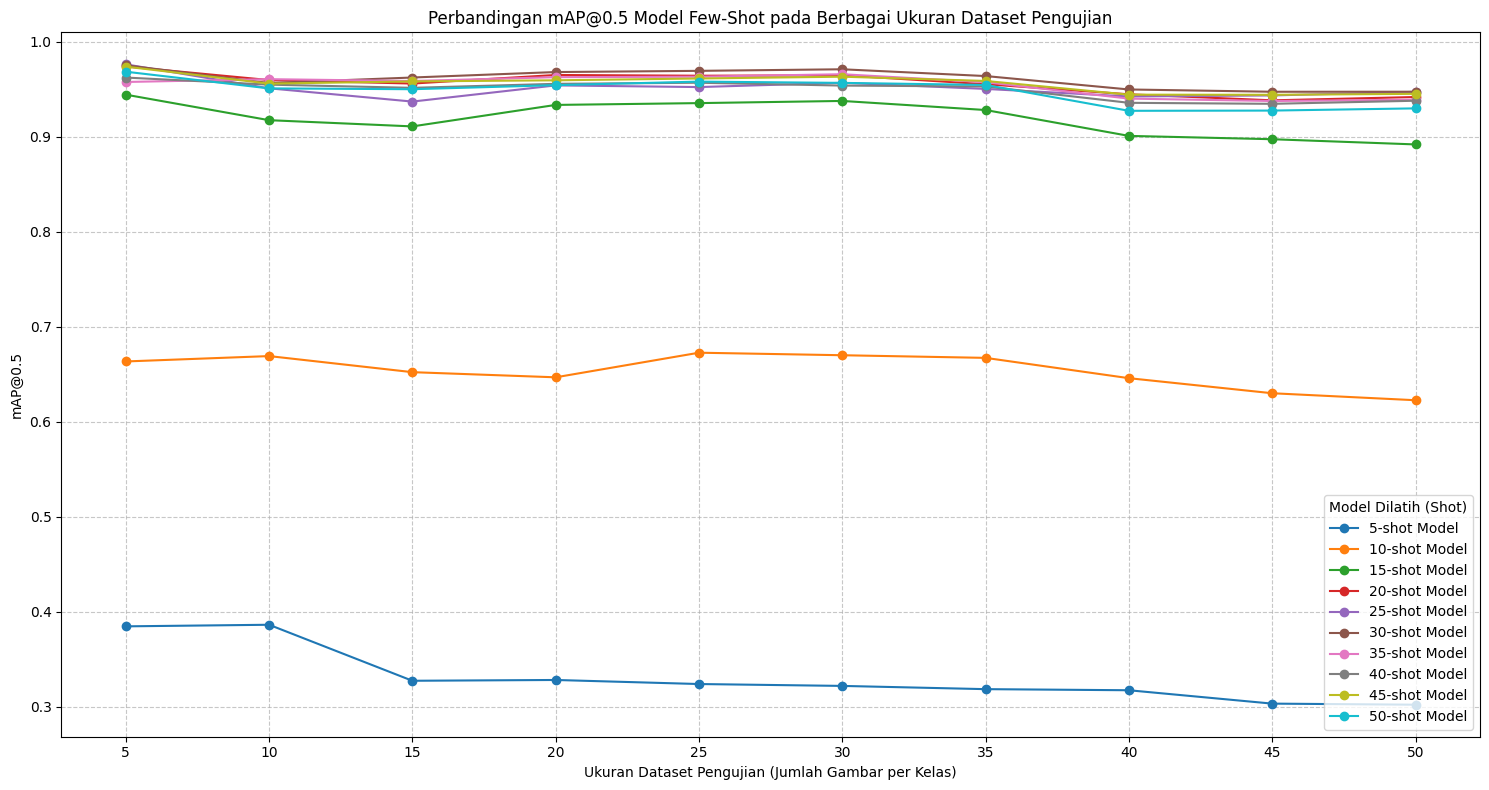


--- Complete mAP@0.5 Results ---
Model 5-shot:
  - Tested on 5-images: 0.3845
  - Tested on 10-images: 0.3861
  - Tested on 15-images: 0.3271
  - Tested on 20-images: 0.3280
  - Tested on 25-images: 0.3237
  - Tested on 30-images: 0.3217
  - Tested on 35-images: 0.3183
  - Tested on 40-images: 0.3172
  - Tested on 45-images: 0.3031
  - Tested on 50-images: 0.3019
Model 10-shot:
  - Tested on 5-images: 0.6635
  - Tested on 10-images: 0.6691
  - Tested on 15-images: 0.6522
  - Tested on 20-images: 0.6468
  - Tested on 25-images: 0.6727
  - Tested on 30-images: 0.6700
  - Tested on 35-images: 0.6673
  - Tested on 40-images: 0.6459
  - Tested on 45-images: 0.6300
  - Tested on 50-images: 0.6226
Model 15-shot:
  - Tested on 5-images: 0.9445
  - Tested on 10-images: 0.9176
  - Tested on 15-images: 0.9111
  - Tested on 20-images: 0.9337
  - Tested on 25-images: 0.9356
  - Tested on 30-images: 0.9379
  - Tested on 35-images: 0.9283
  - Tested on 40-images: 0.9011
  - Tested on 45-images: 0.89

In [6]:
%matplotlib inline
# --- Visualization of Results ---
plt.figure(figsize=(15, 8))
plt.title("Perbandingan mAP@0.5 Model Few-Shot pada Berbagai Ukuran Dataset Pengujian")
plt.xlabel("Ukuran Dataset Pengujian (Jumlah Gambar per Kelas)")
plt.ylabel("mAP@0.5")
plt.xticks(lists_test_dataset_images)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot a line for each trained model
for model_shot_count, test_scores_dict in all_map50_scores.items():
    # Sort the test scores by dataset size for proper plotting
    sorted_test_scores = sorted(test_scores_dict.items())

    # Extract test dataset image counts and corresponding mAP50 scores
    test_dataset_sizes = [item[0] for item in sorted_test_scores]
    map50_values = [item[1] for item in sorted_test_scores]

    plt.plot(test_dataset_sizes, map50_values, marker='o', linestyle='-',
             label=f"{model_shot_count}-shot Model")

plt.legend(title="Model Dilatih (Shot)", loc='lower right')
plt.tight_layout()
plt.show()

# Optional: Print the full results in a table-like format
print("\n--- Complete mAP@0.5 Results ---")
for model_shot_count, scores_by_dataset in all_map50_scores.items():
    print(f"Model {model_shot_count}-shot:")
    for test_img_count, score in scores_by_dataset.items():
        print(f"  - Tested on {test_img_count}-images: {score:.4f}")